# Setting

In [1]:
# Google Colab
# font - 한글
# 한글깨짐 방지 - 가장 먼저 실행 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (53.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

base_path = '/content/drive/MyDrive/retail/'
data_path = base_path + 'data/'
abcd_path = base_path + 'ABCD data/ABCD 마트별 data/'

plt.rcParams['figure.dpi'] = 200 # 해상도 설정
plt.rcParams['font.family'] = 'NanumSquare' # plt 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결

In [3]:
from matplotlib import font_manager as fm

font_list = fm.findSystemFonts(fontpaths='/usr/share/fonts/truetype/nanum/')

for font in font_list:
    print(f'Name: {fm.FontProperties(fname=font).get_name()} | Path: {font}')

Name: NanumSquareRound | Path: /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
Name: NanumSquare | Path: /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
Name: NanumMyeongjo | Path: /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
Name: NanumGothic | Path: /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
Name: NanumMyeongjo | Path: /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
Name: NanumGothic | Path: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
Name: NanumBarunGothic | Path: /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
Name: NanumSquare | Path: /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
Name: NanumBarunGothic | Path: /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
Name: NanumSquareRound | Path: /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf


# 시계열 매출 EDA

## 콩나물: 계절성 × + 주기적 소비

In [4]:
# Data Load
gds_a_prep = pd.read_csv(abcd_path + 'prep/gds_a_prep.csv', index_col=0)
gds_b_prep = pd.read_csv(abcd_path + 'prep/gds_b_prep.csv', index_col=0)
gds_c_prep = pd.read_csv(abcd_path + 'prep/gds_c_prep.csv', index_col=0)
gds_d_prep = pd.read_csv(abcd_path + 'prep/gds_d_prep.csv', index_col=0)

merge_a = pd.read_csv(abcd_path + 'merge/merge_a.csv', index_col=0)
merge_b = pd.read_csv(abcd_path + 'merge/merge_b.csv', index_col=0)
merge_c = pd.read_csv(abcd_path + 'merge/merge_c.csv', index_col=0)
merge_d = pd.read_csv(abcd_path + 'merge/merge_d.csv', index_col=0)

In [ ]:
# A마트
gds_a_prep[gds_a_prep.GDS_NM.str.contains('콩나물')]

In [5]:
# int to str
merge_a['REAL_SAL_DT'] = merge_a['REAL_SAL_DT'].astype(str)

# str to datetime
merge_a['REAL_SAL_DT'] = merge_a['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_a['DT_TTM'] = pd.to_datetime(merge_a['DT_TTM'])

# Extract
merge_a['DT_TTM_Year'] = merge_a['DT_TTM'].dt.year # Year
merge_a['DT_TTM_Month'] = merge_a['DT_TTM'].dt.month # Month
merge_a['DT_TTM_Day'] = merge_a['DT_TTM'].dt.day # Day
merge_a['DT_TTM_Hour'] = merge_a['DT_TTM'].dt.hour # Hour
merge_a['DT_TTM_Week'] = merge_a['DT_TTM'].dt.week # Week
merge_a['DT_TTM_Week_4'] = (merge_a['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_a['DT_TTM_Week_5'] = (merge_a['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_a['DT_TTM_Day_of_the_Week'] = merge_a['DT_TTM'].dt.day_name() # Day of the Week

# A마트의 저울식품인 콩나물 join
cnm_a = merge_a[(merge_a['PLU_CD'] == 201307) | (merge_a['PLU_CD'] == 201308)]

# Save
cnm_a.to_csv(abcd_path + '/analysis/cnm_a.csv')

# 일자별
a = cnm_a.groupby('REAL_SAL_DT').size()

In [ ]:
# C마트
gds_c_prep[gds_c_prep.GDS_NM.str.contains('콩나물')]

In [6]:
# int to str
merge_c['REAL_SAL_DT'] = merge_c['REAL_SAL_DT'].astype(str)

# str to datetime
merge_c['REAL_SAL_DT'] = merge_c['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_c['DT_TTM'] = pd.to_datetime(merge_c['DT_TTM'])

# Extract
merge_c['DT_TTM_Year'] = merge_c['DT_TTM'].dt.year # Year
merge_c['DT_TTM_Month'] = merge_c['DT_TTM'].dt.month # Month
merge_c['DT_TTM_Day'] = merge_c['DT_TTM'].dt.day # Day
merge_c['DT_TTM_Hour'] = merge_c['DT_TTM'].dt.hour # Hour
merge_c['DT_TTM_Week'] = merge_c['DT_TTM'].dt.week # Week
merge_c['DT_TTM_Week_4'] = (merge_c['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_c['DT_TTM_Week_5'] = (merge_c['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_c['DT_TTM_Day_of_the_Week'] = merge_c['DT_TTM'].dt.day_name() # Day of the Week

# C마트의 저울식품인 콩나물 select
cnm_c = merge_c[merge_c['PLU_CD'] == 205249]

# Save
cnm_c.to_csv(abcd_path + '/analysis/cnm_c.csv')

# 일자별
c = cnm_c.groupby('REAL_SAL_DT').size()

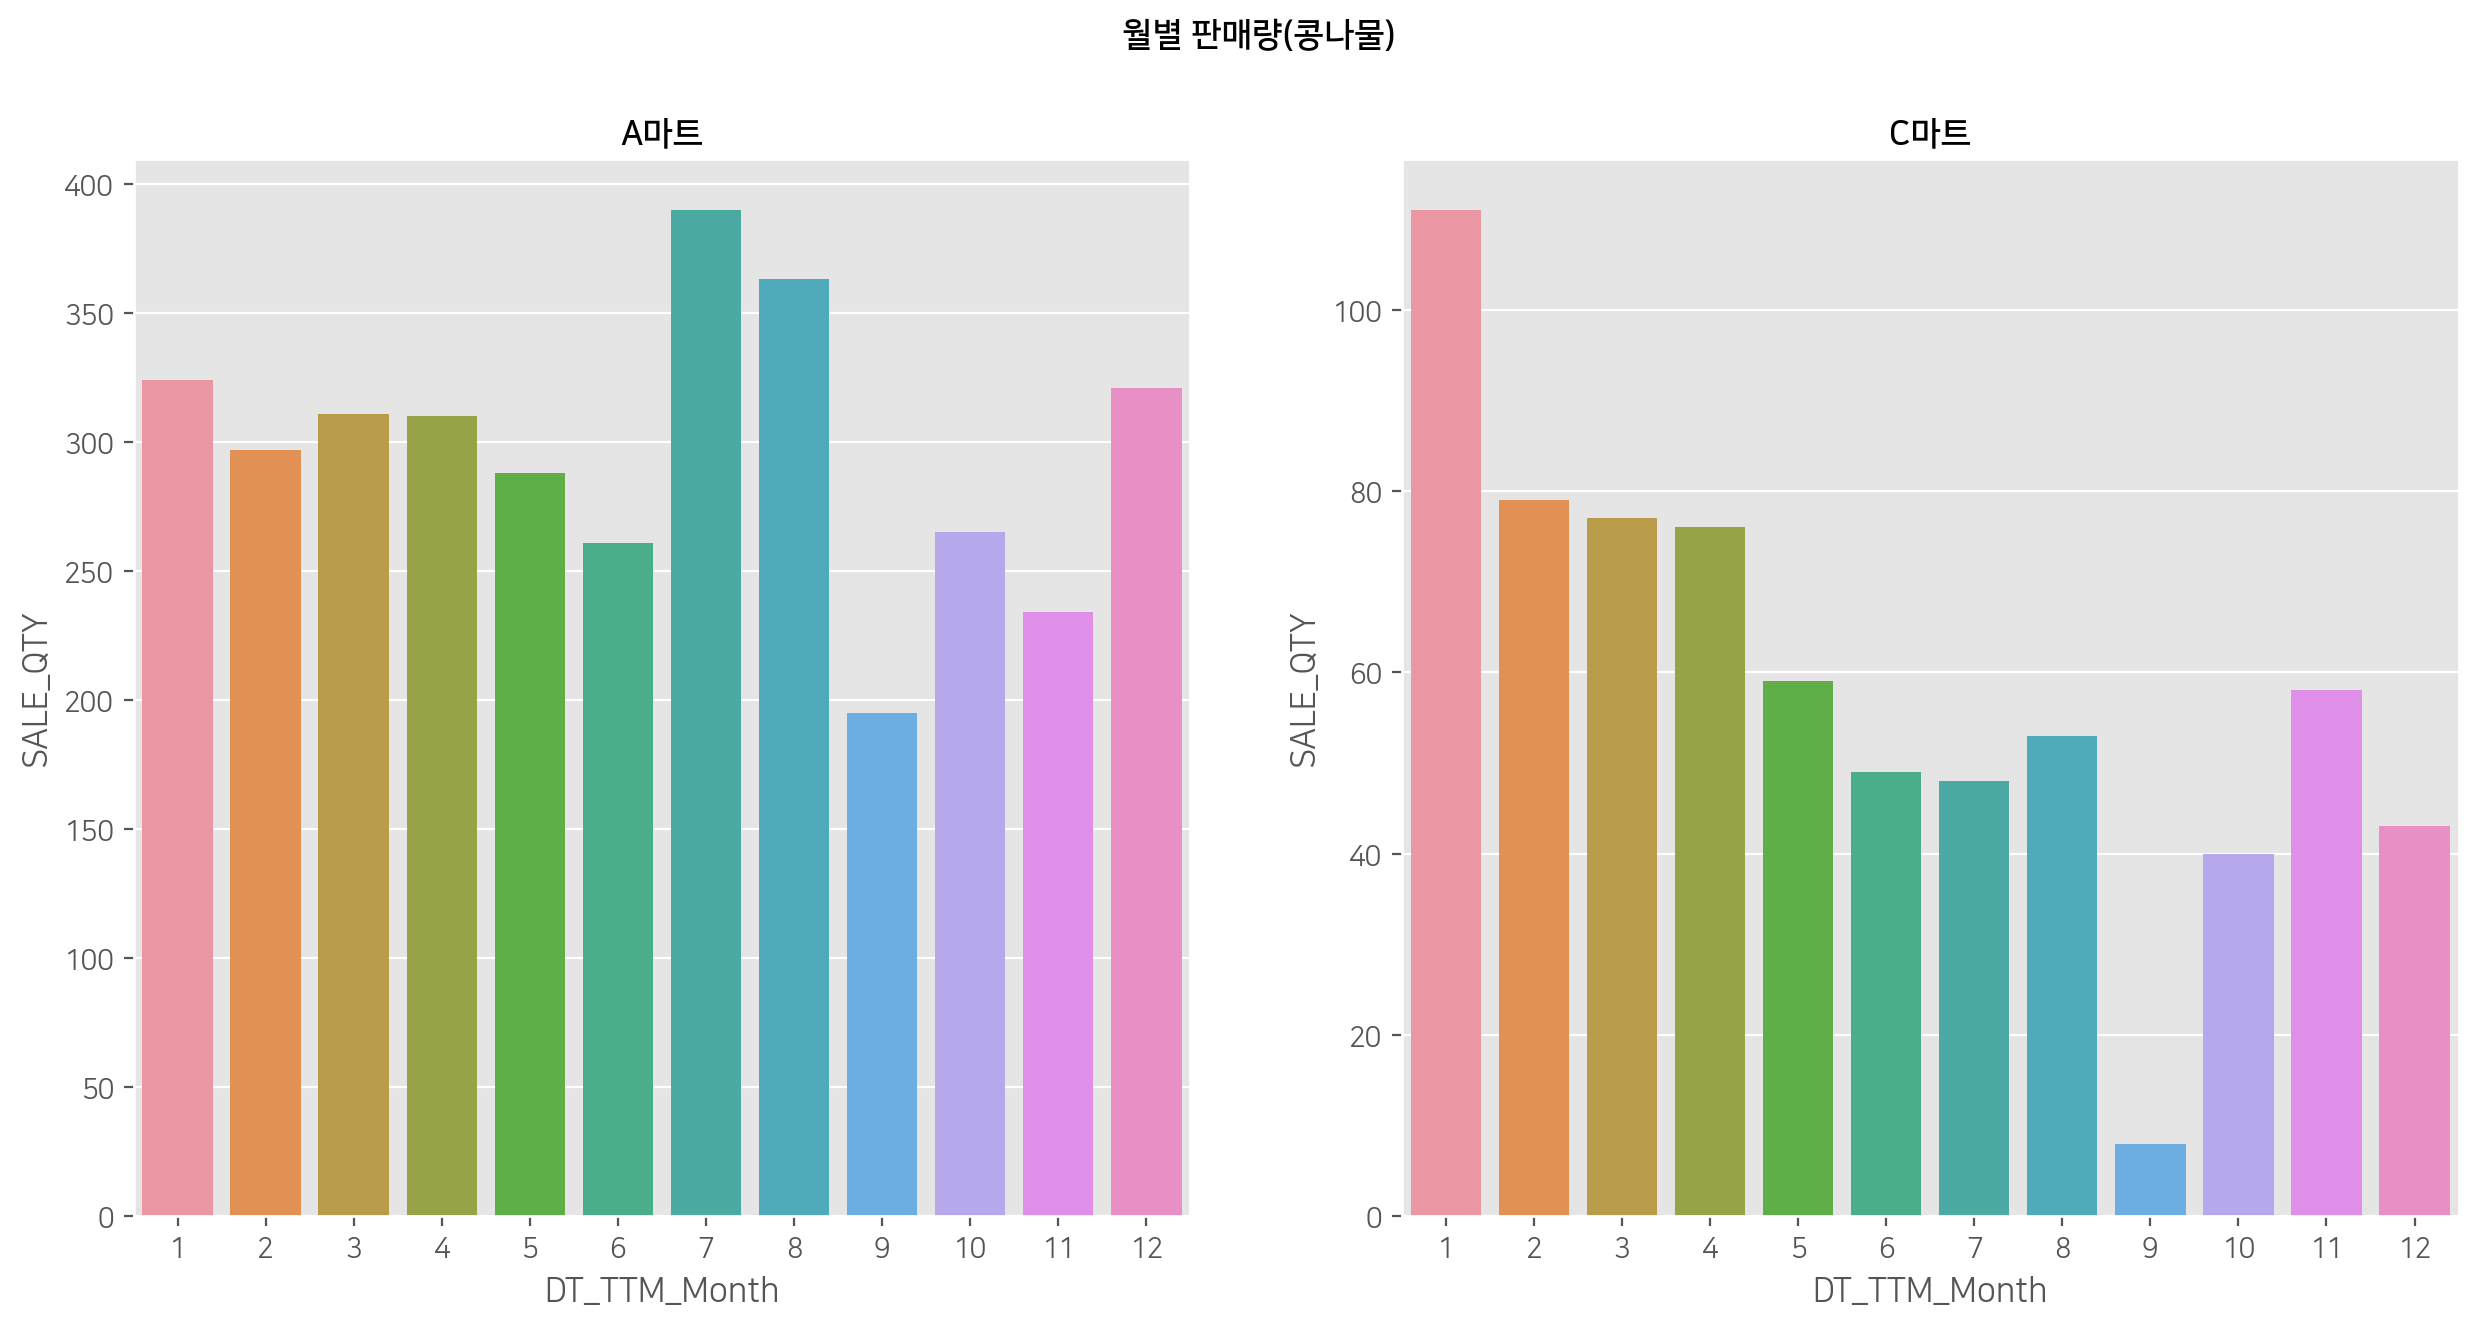

In [7]:
# Pivot Table
cnm_group_month_a = pd.pivot_table(data=cnm_a, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')
cnm_group_month_c = pd.pivot_table(data=cnm_c, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('월별 판매량(콩나물)', fontweight='bold', size = 12)

plt.subplot(121)
plt.title('A마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_month_a.index, y=cnm_group_month_a['SALE_QTY'])

plt.subplot(122)
plt.title('C마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_month_c.index, y=cnm_group_month_c['SALE_QTY'])

plt.show()

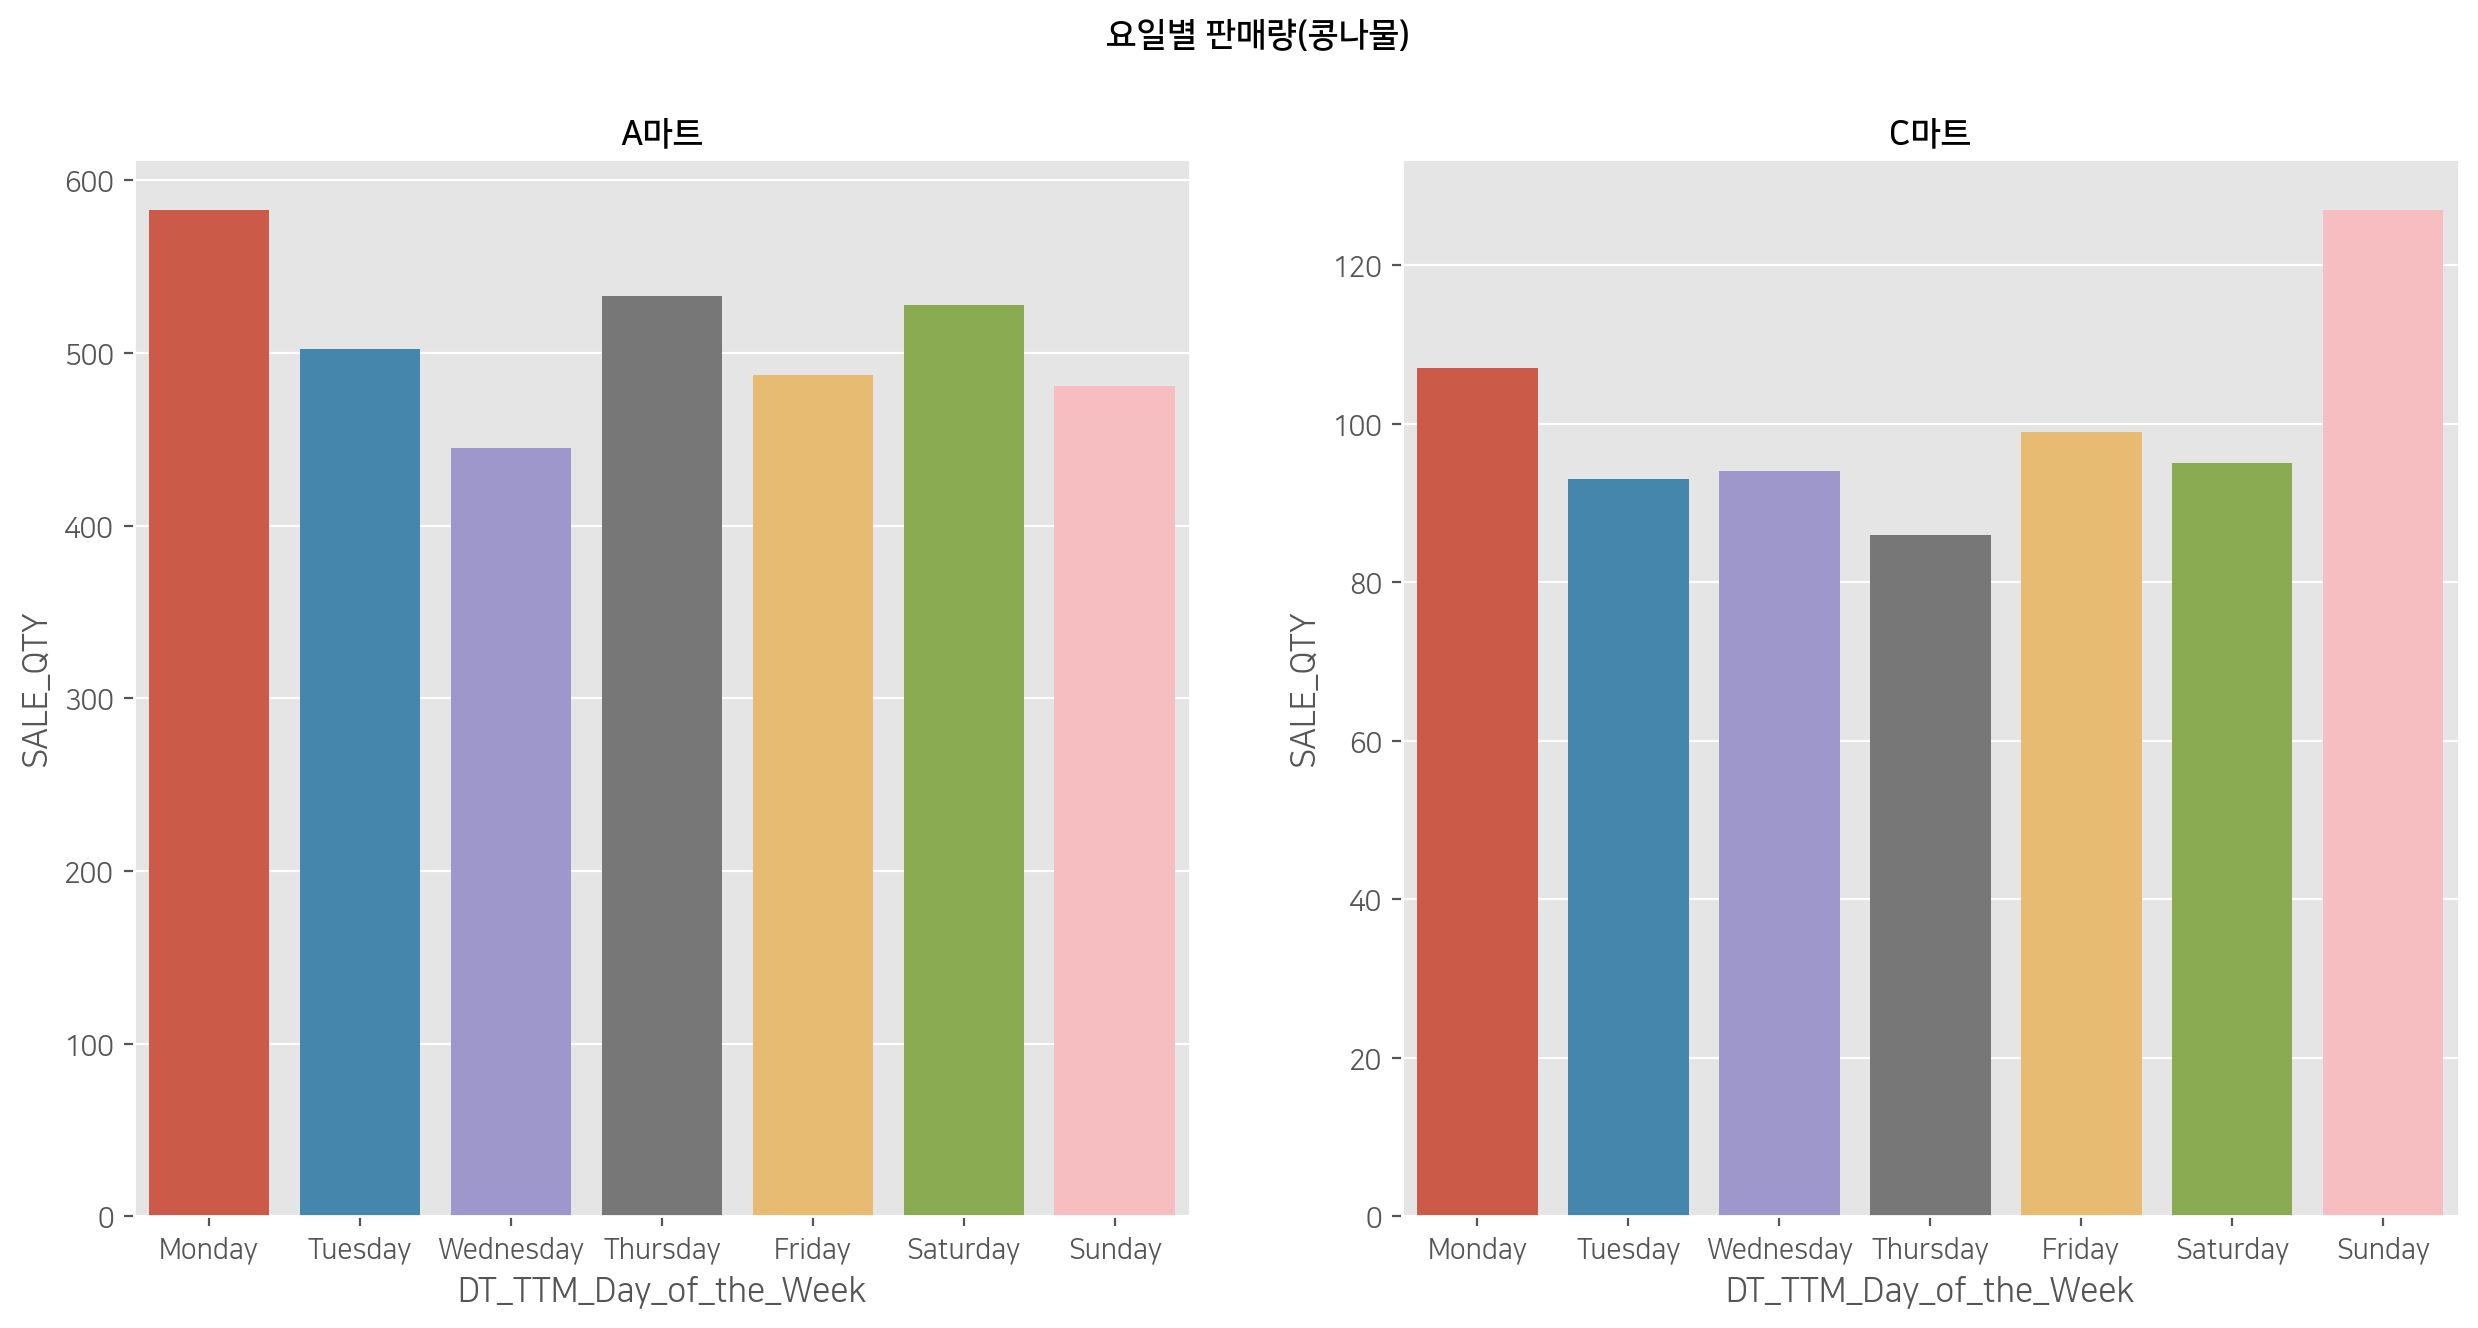

In [8]:
# Pivot Table
cnm_group_dw_a = pd.pivot_table(data=cnm_a, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')
cnm_group_dw_c = pd.pivot_table(data=cnm_c, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('요일별 판매량(콩나물)', fontweight='bold', size = 12)

plt.subplot(121)
plt.title('A마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_dw_a.index, y=cnm_group_dw_a['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.subplot(122)
plt.title('C마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_dw_c.index, y=cnm_group_dw_c['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.show()

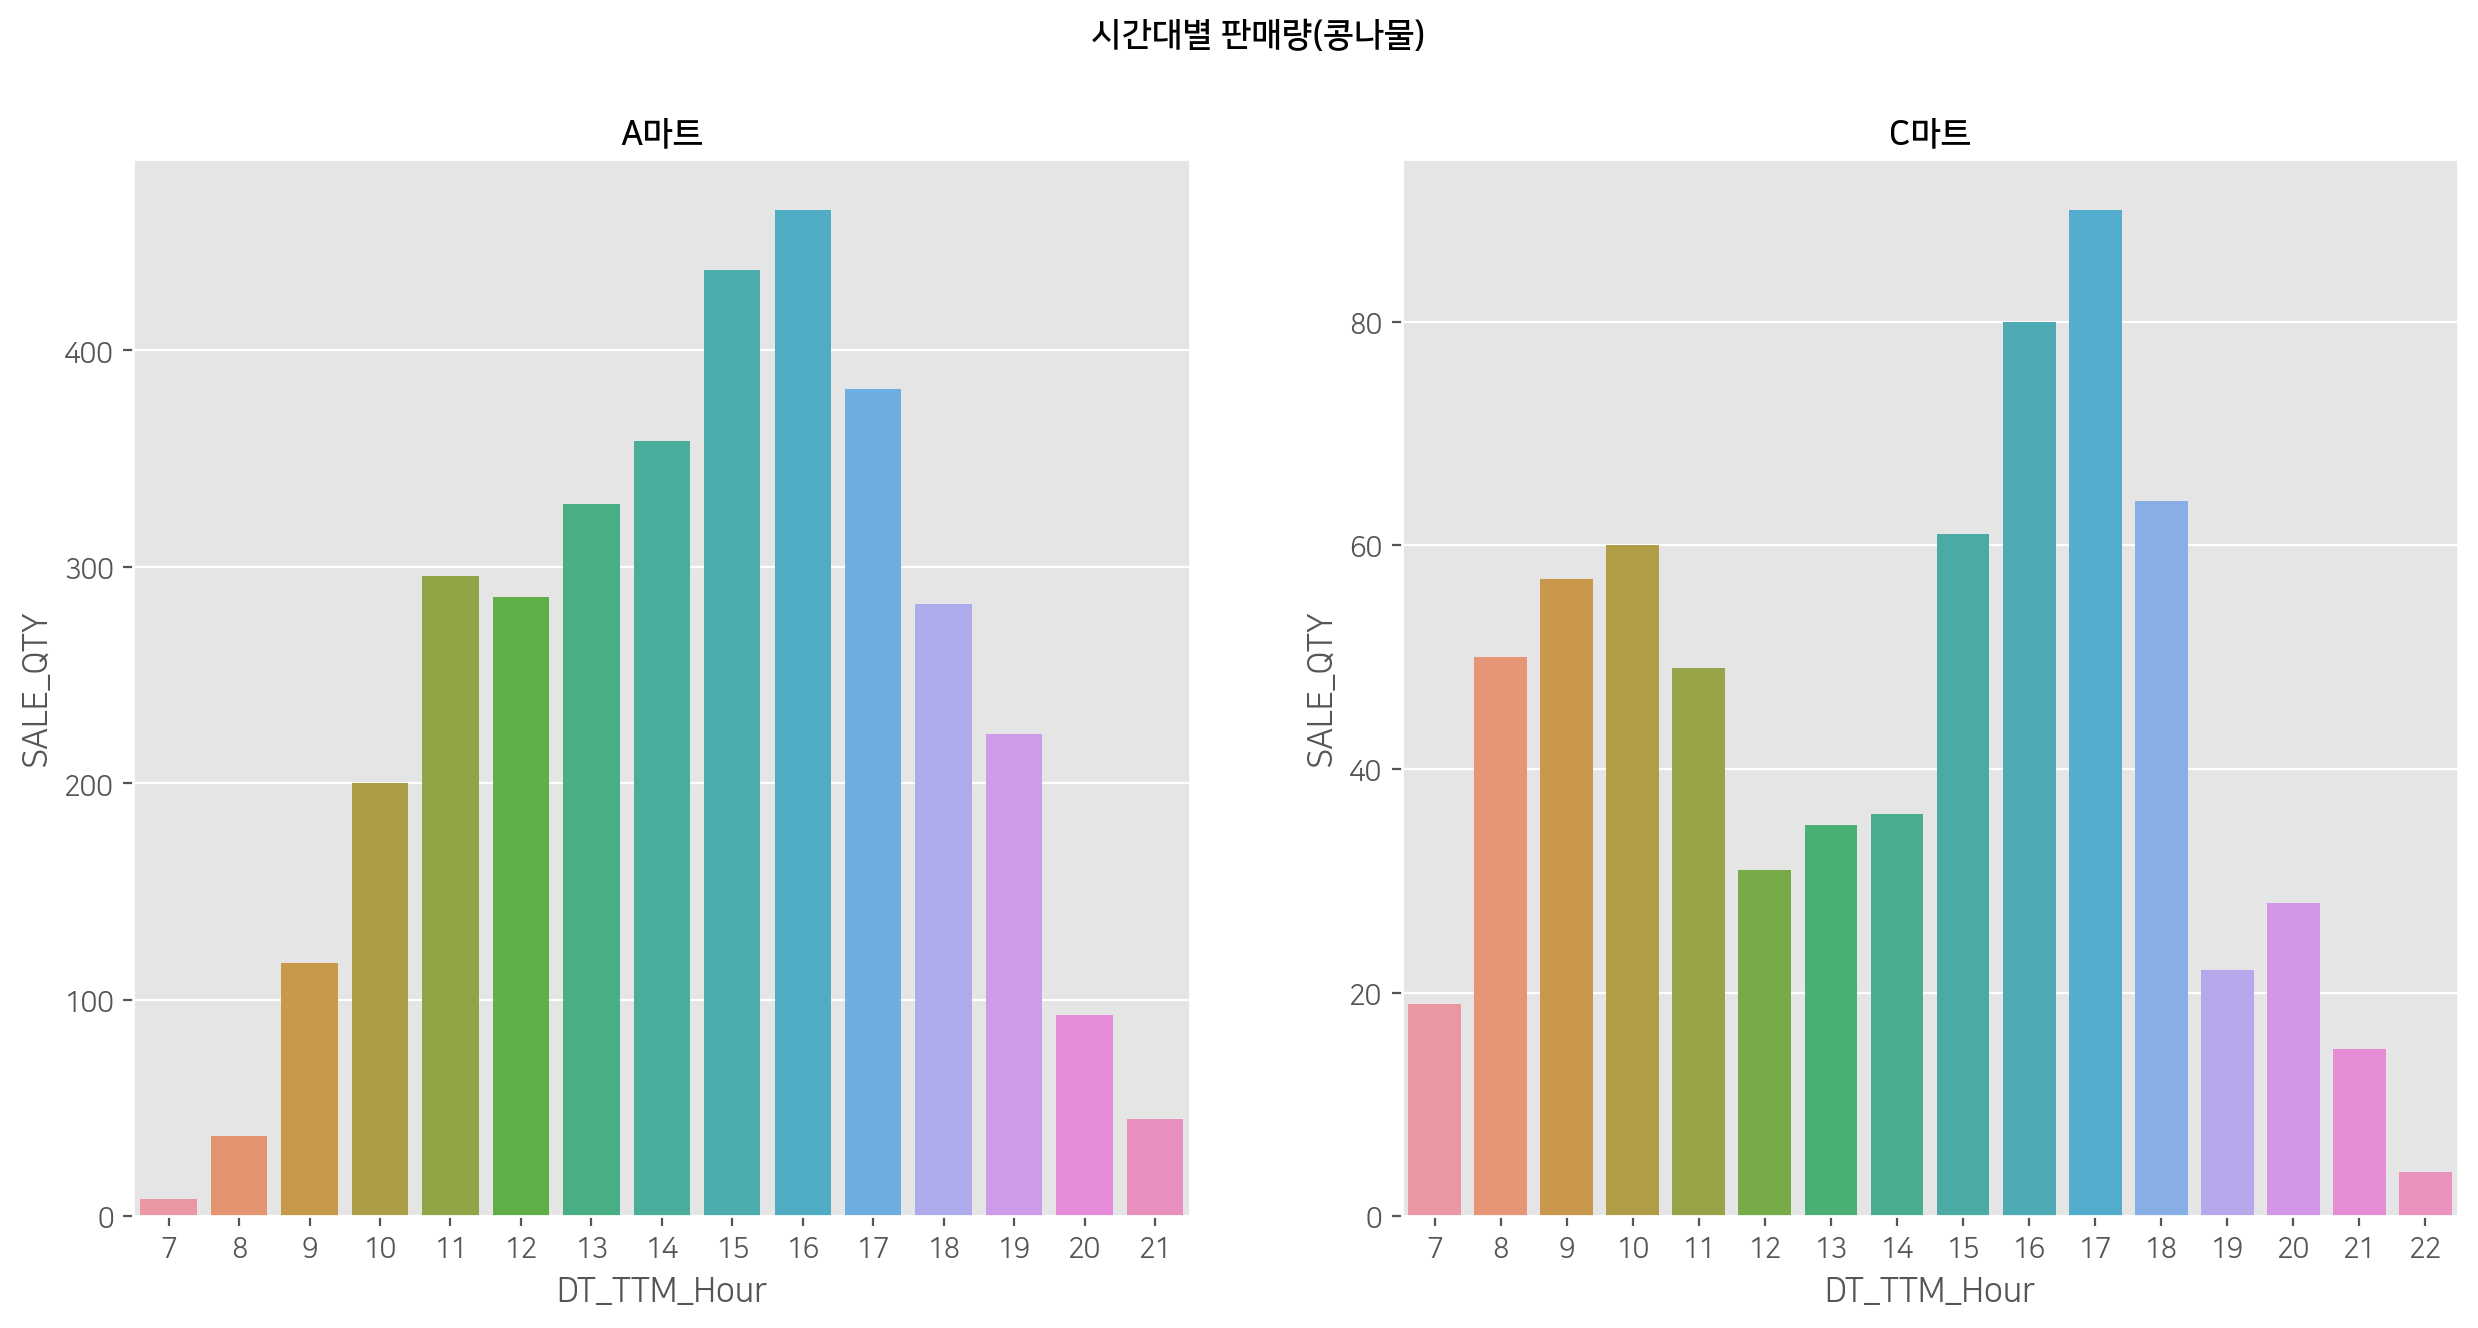

In [9]:
# Pivot Table
cnm_group_hour_a = pd.pivot_table(data=cnm_a, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')
cnm_group_hour_c = pd.pivot_table(data=cnm_c, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('시간대별 판매량(콩나물)', fontweight='bold', size = 12)

plt.subplot(121)
plt.title('A마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_hour_a.index, y=cnm_group_hour_a['SALE_QTY'])

plt.subplot(122)
plt.title('C마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_hour_c.index, y=cnm_group_hour_c['SALE_QTY'])

plt.show()

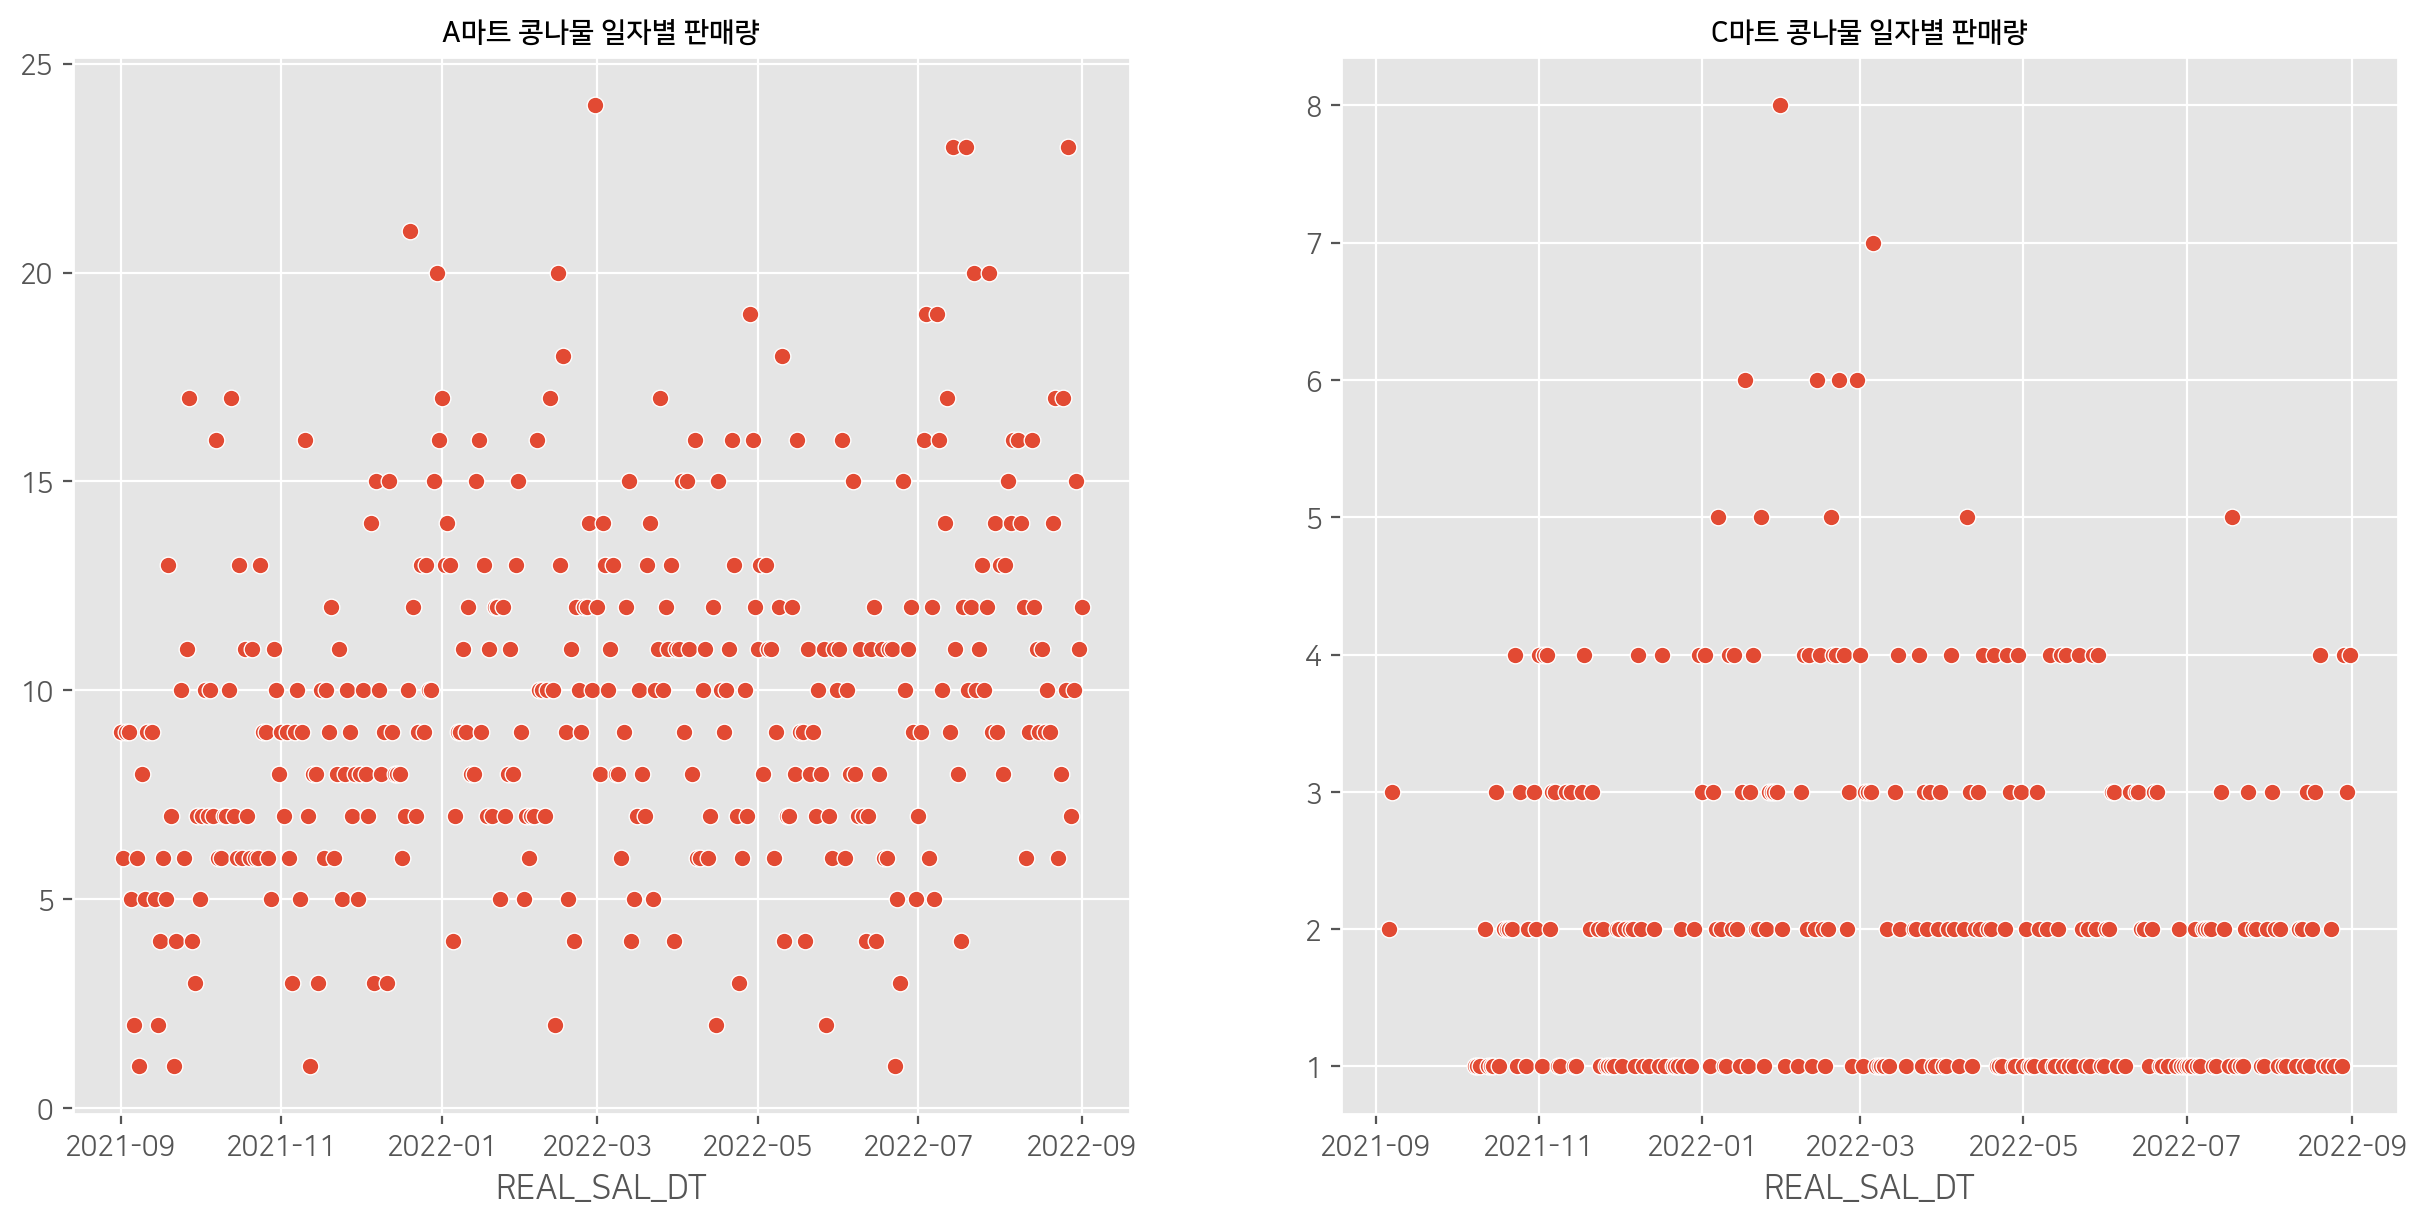

In [10]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

plt.subplot(121)
plt.title('A마트 콩나물 일자별 판매량', fontweight='bold', size = 10)
sns.scatterplot(x=a.index, y=a.values)

plt.subplot(122)
plt.title('C마트 콩나물 일자별 판매량', fontweight='bold', size = 10)
sns.scatterplot(x=c.index, y=c.values)

plt.show()

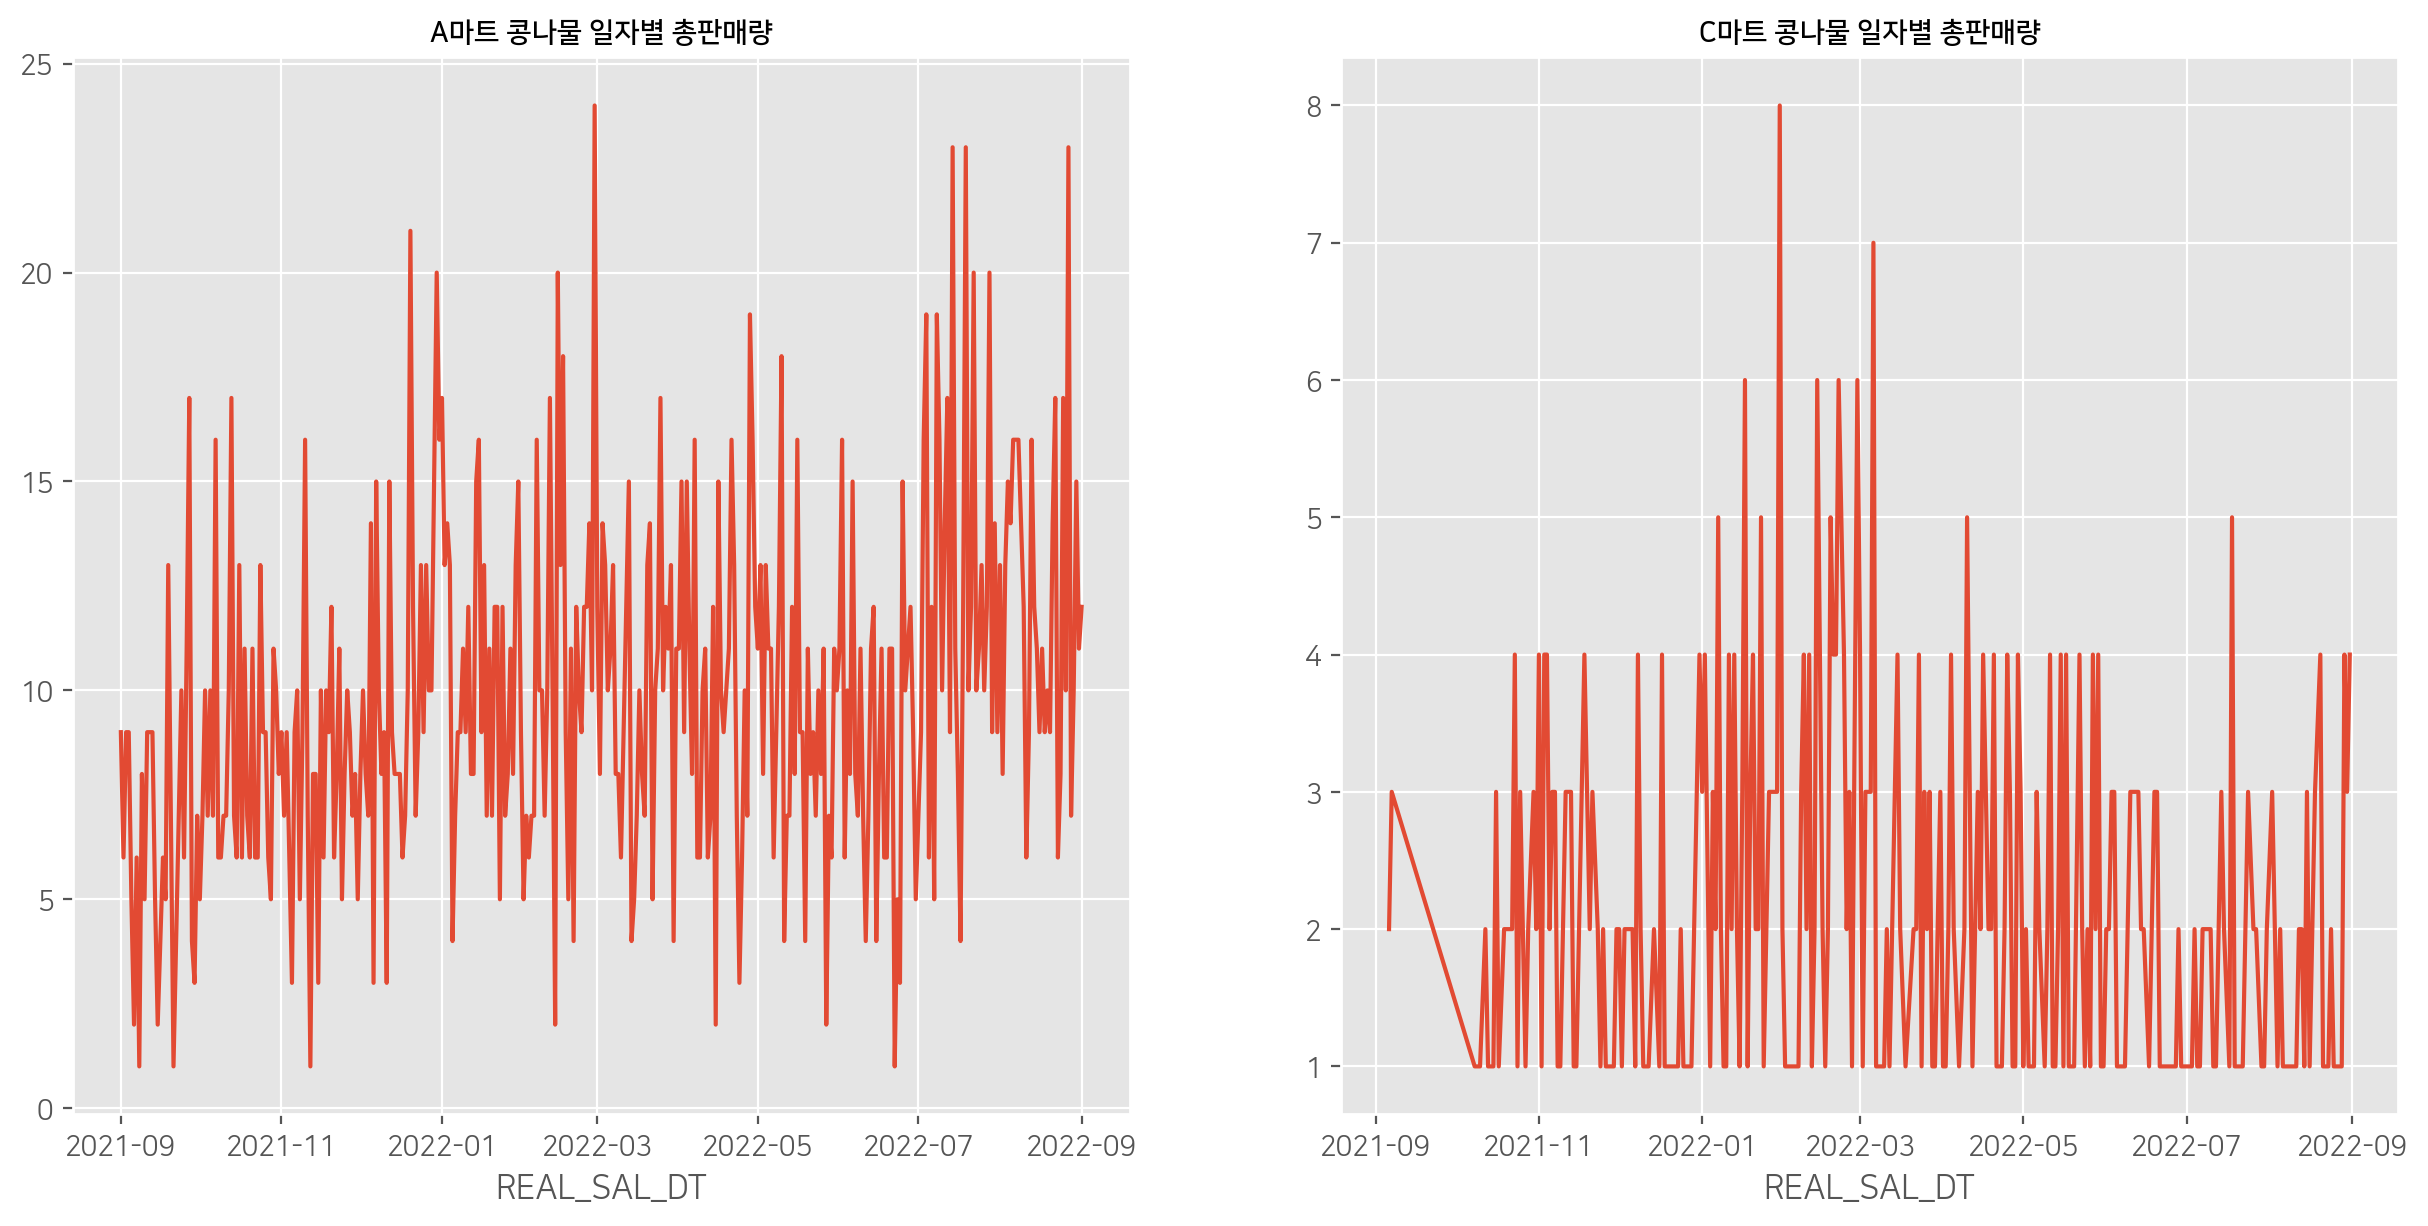

In [11]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

plt.subplot(121)
plt.title('A마트 콩나물 일자별 총판매량', fontweight='bold', size = 10)
sns.lineplot(x=a.index, y=a.values, estimator=sum) 

plt.subplot(122)
plt.title('C마트 콩나물 일자별 총판매량', fontweight='bold', size = 10)
sns.lineplot(x=c.index, y=c.values, estimator=sum)

plt.show()

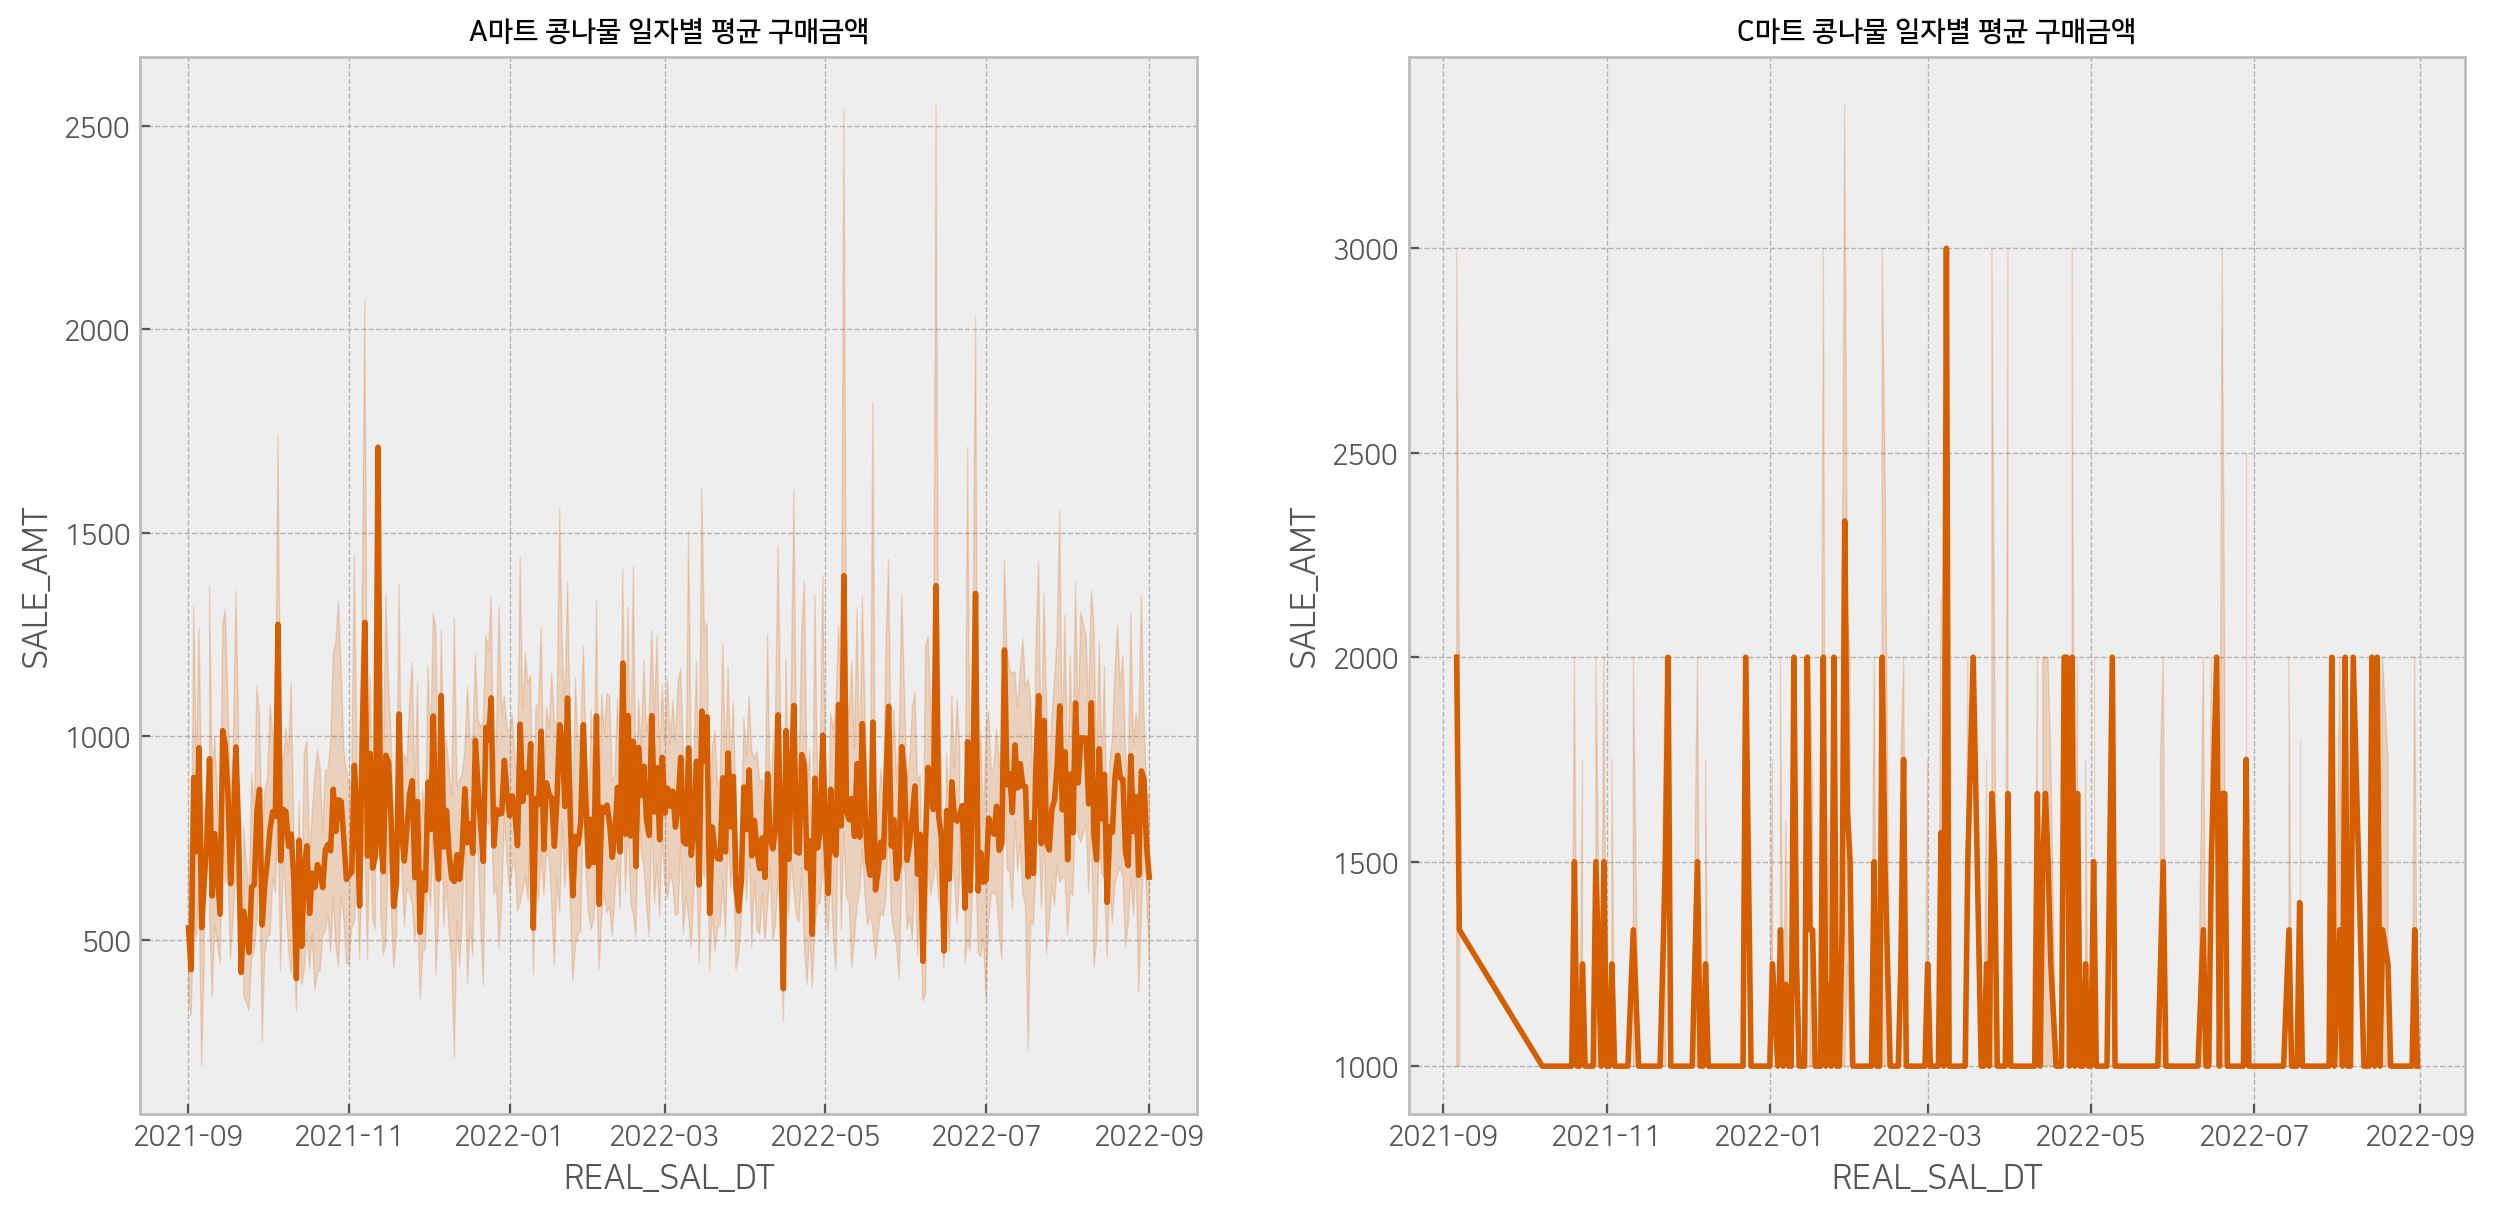

In [12]:
plt.figure(figsize=(15,7))
plt.style.use('bmh')

plt.subplot(121)
plt.title('A마트 콩나물 일자별 평균 구매금액', fontweight='bold', size = 10)
sns.lineplot(data=cnm_a, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.subplot(122)
plt.title('C마트 콩나물 일자별 평균 구매금액', fontweight='bold', size = 10)
sns.lineplot(data=cnm_c, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.show()

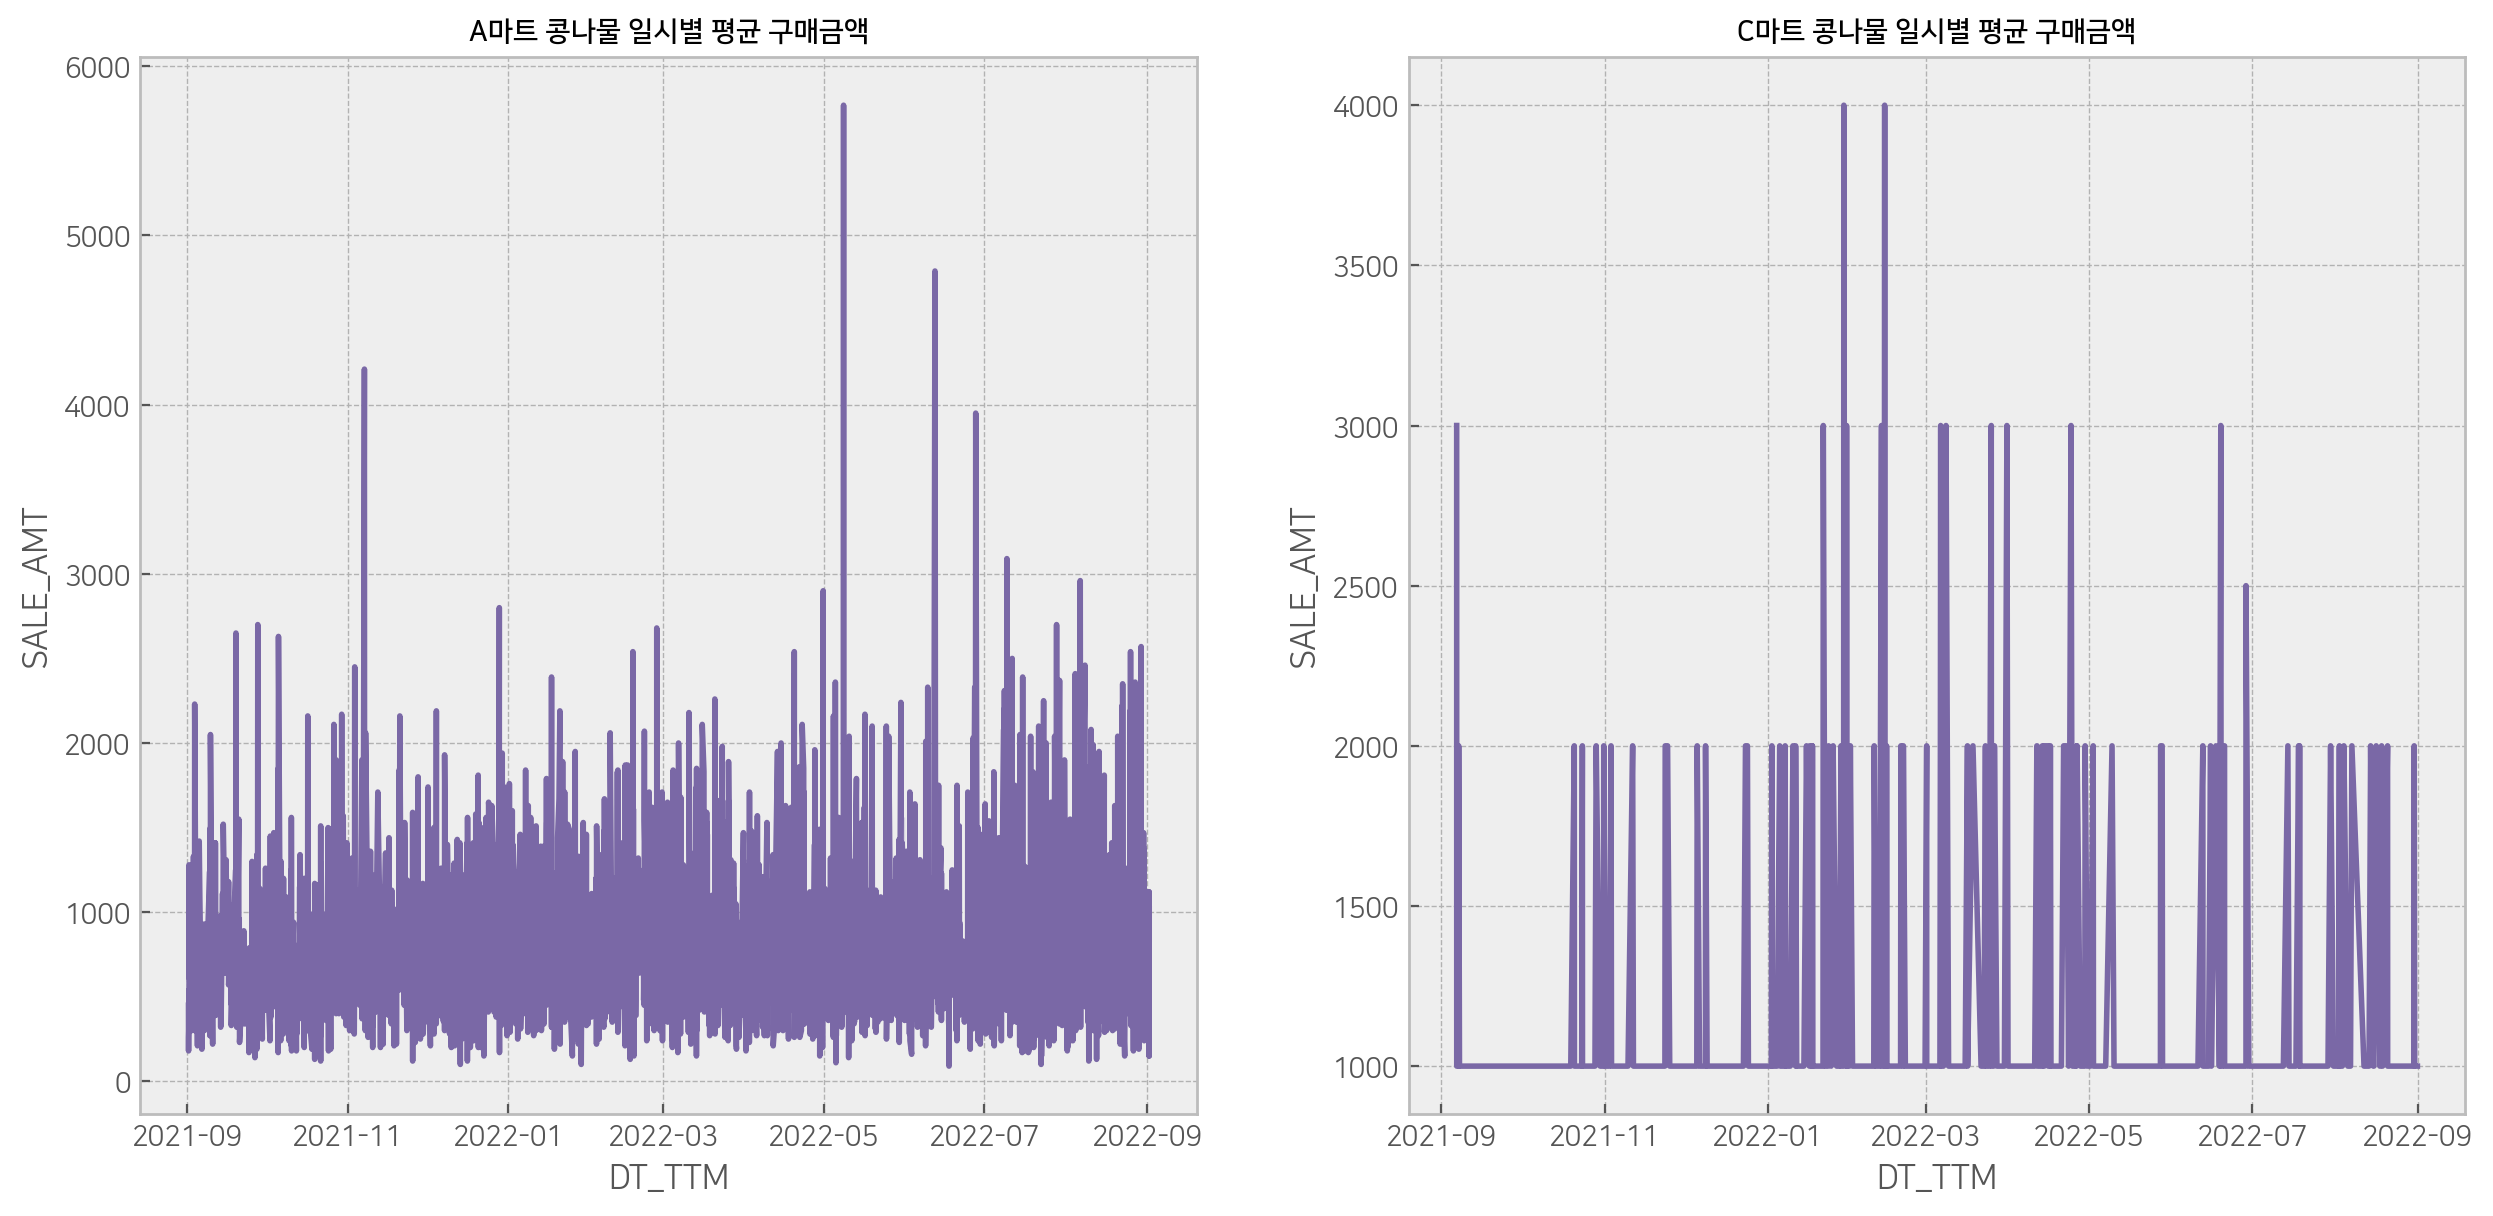

In [13]:
plt.figure(figsize=(15,7))
plt.style.use('bmh')

plt.subplot(121)
plt.title('A마트 콩나물 일시별 평균 구매금액', fontweight='bold', size = 10)
sns.lineplot(data=cnm_a, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.subplot(122)
plt.title('C마트 콩나물 일시별 평균 구매금액', fontweight='bold', size = 10)
sns.lineplot(data=cnm_c, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.show()

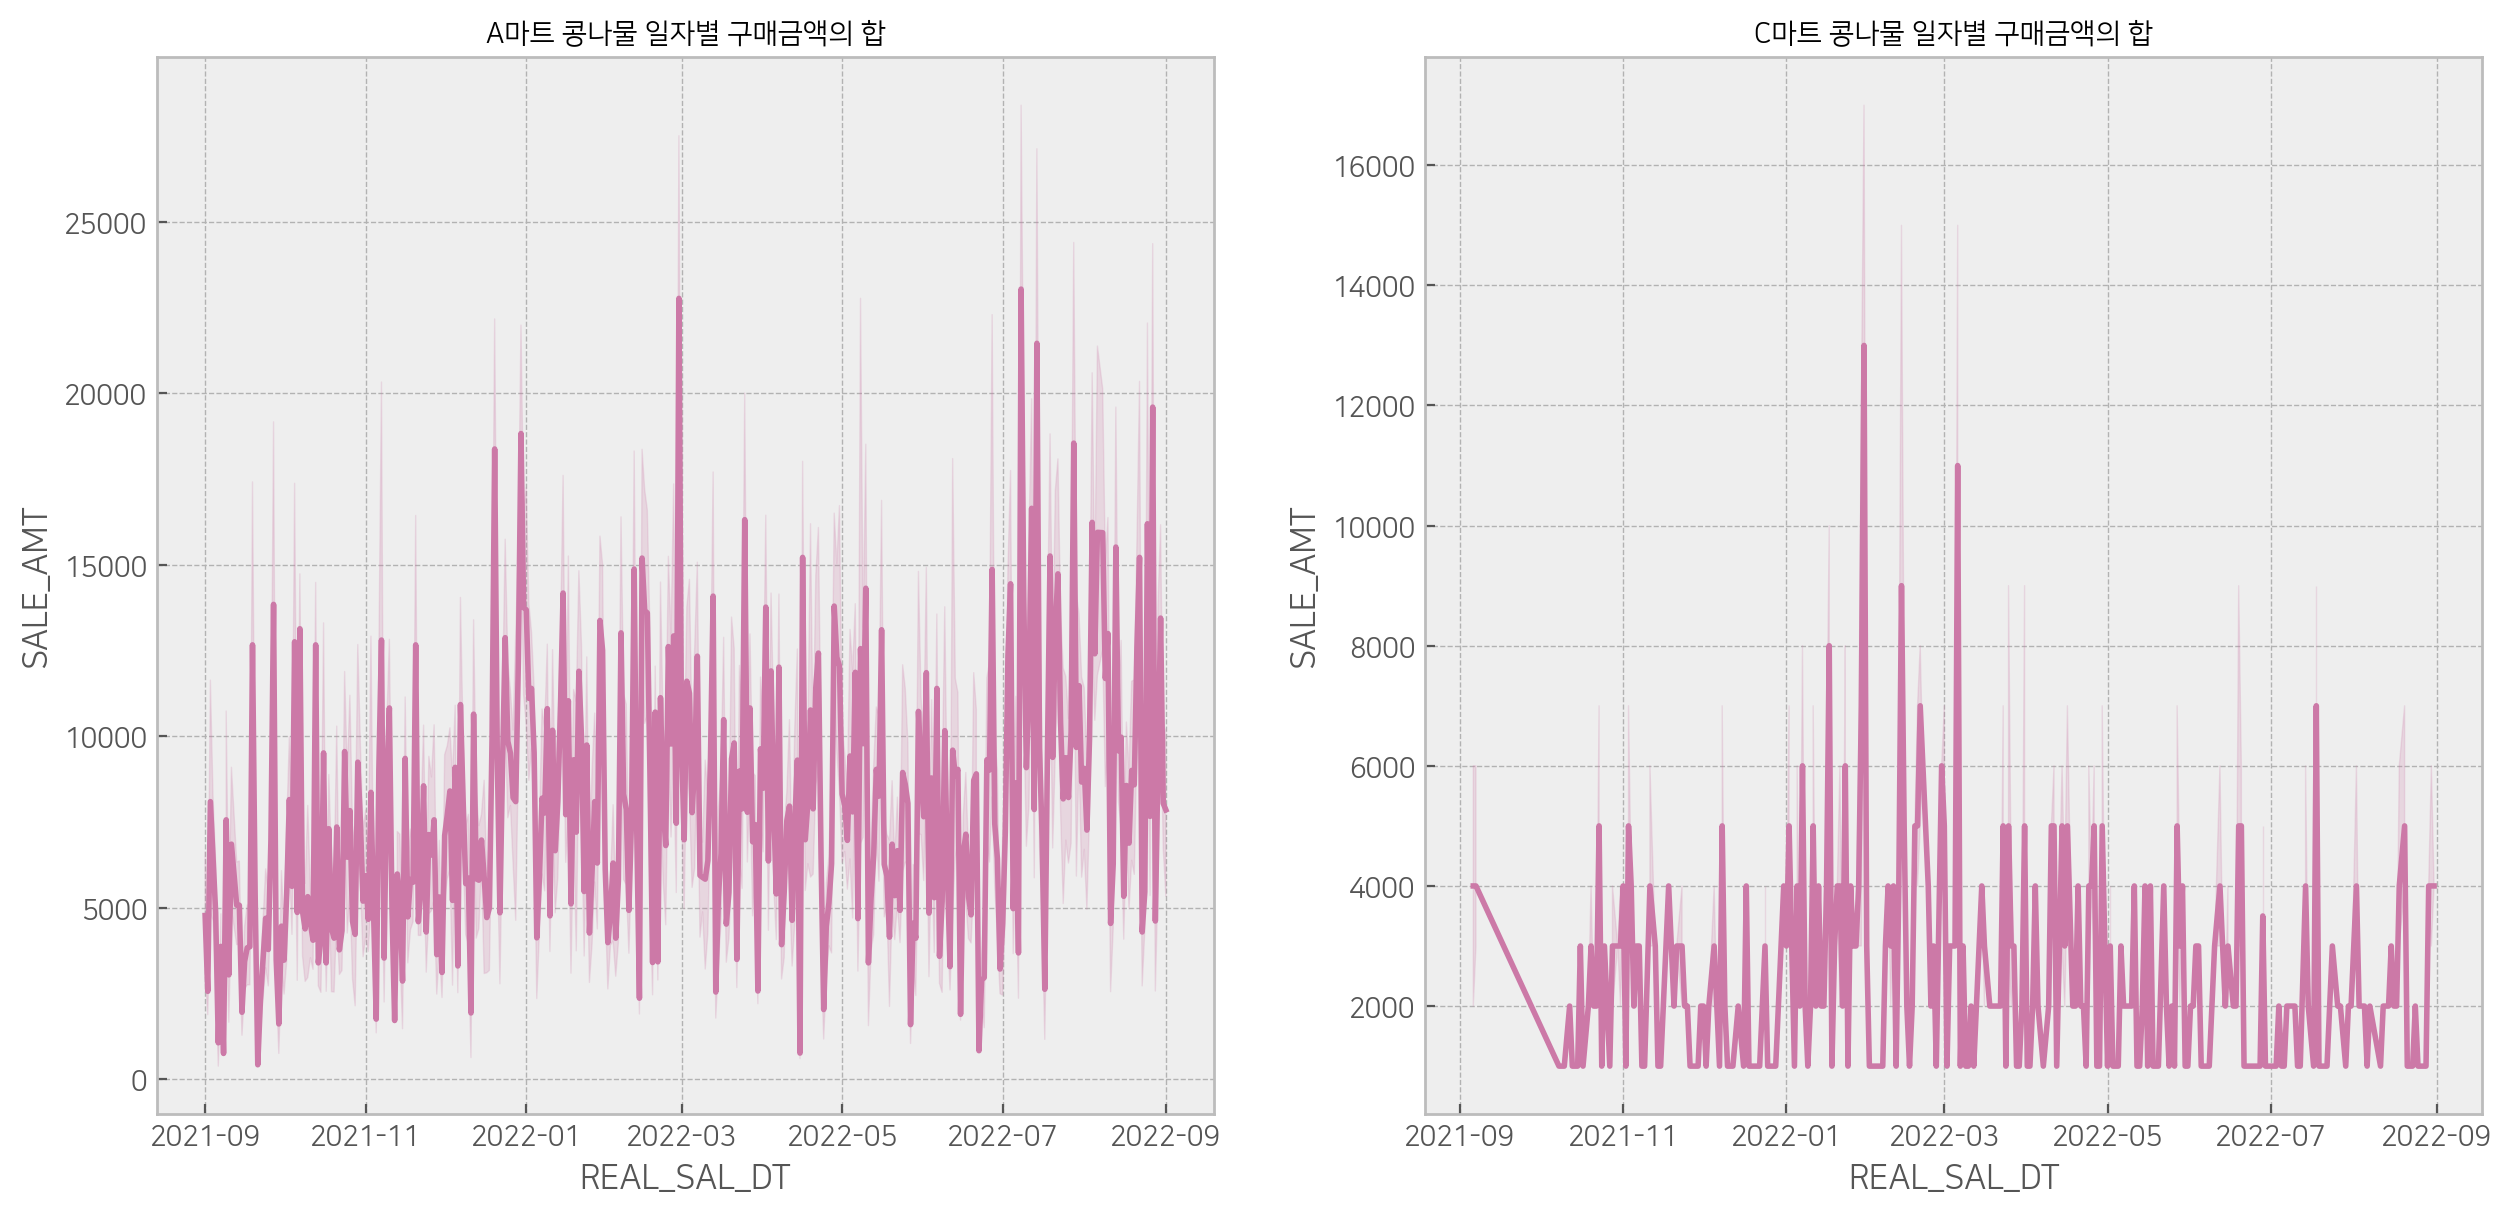

In [14]:
plt.figure(figsize=(15,7))
plt.style.use('bmh')

plt.subplot(121)
plt.title('A마트 콩나물 일자별 구매금액의 합', size = 10)
sns.lineplot(data=cnm_a, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.subplot(122)
plt.title('C마트 콩나물 일자별 구매금액의 합', size = 10)
sns.lineplot(data=cnm_c, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.show()

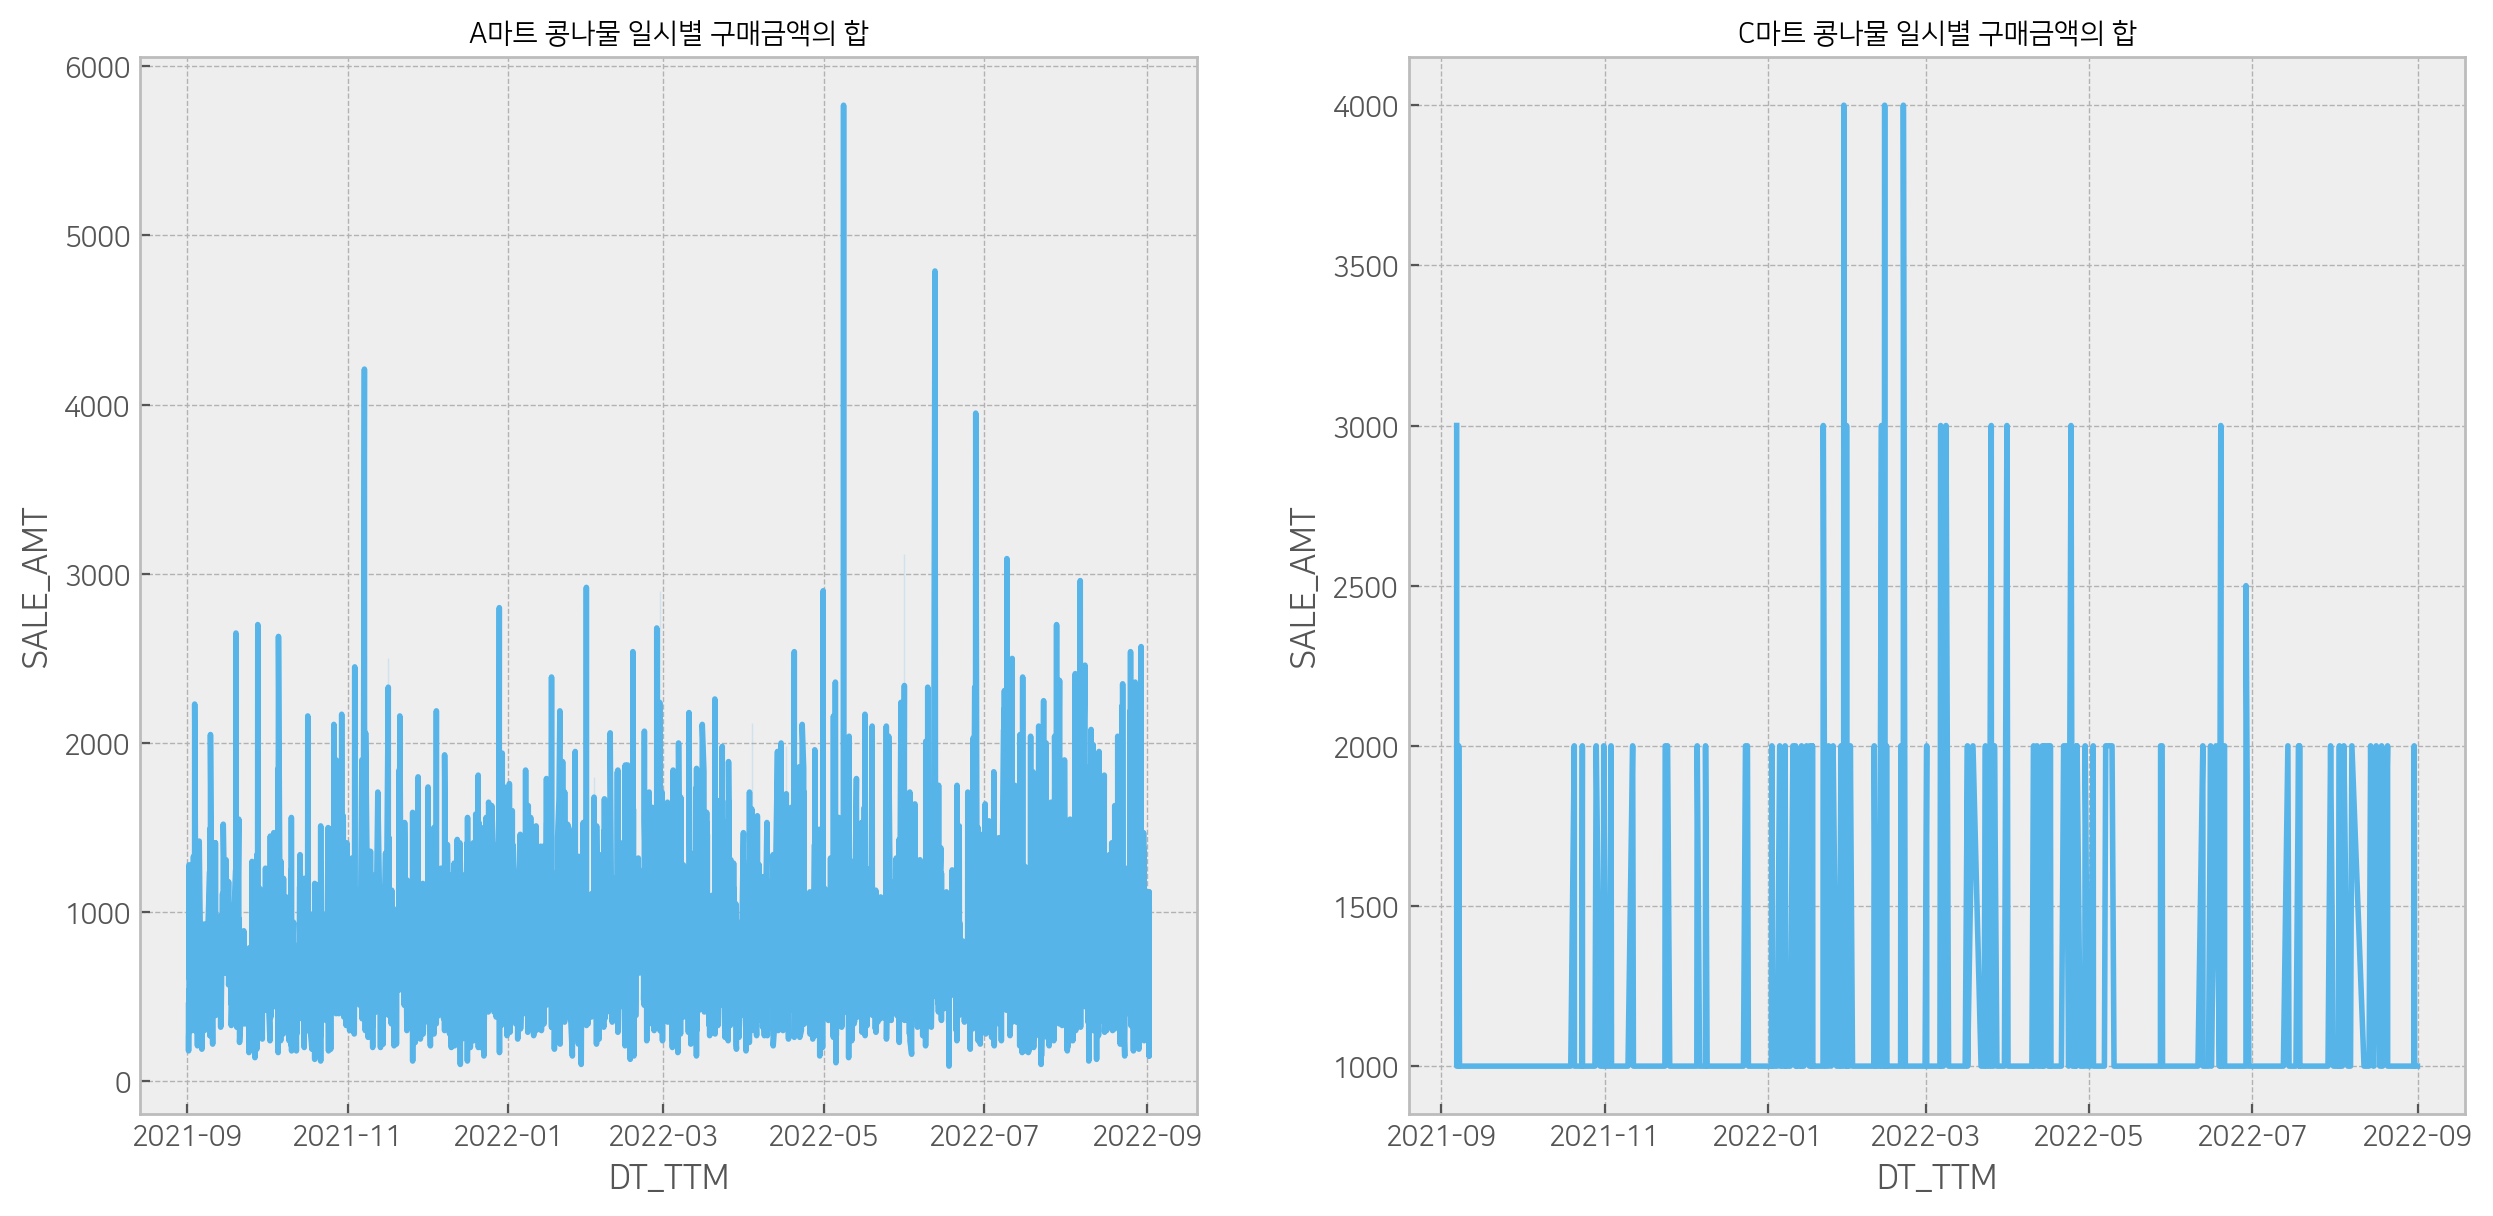

In [15]:
plt.figure(figsize=(15,7))
plt.style.use('bmh')

plt.subplot(121)
plt.title('A마트 콩나물 일시별 구매금액의 합', size = 10)
sns.lineplot(data=cnm_a, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.subplot(122)
plt.title('C마트 콩나물 일시별 구매금액의 합', size = 10)
sns.lineplot(data=cnm_c, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.show()

In [16]:
# 매장 목록: str_list
str_list = pd.read_csv(data_path + 'str_list.csv')

str_list.loc[[0,2]][['STR_NM','CM_ITM_NM','POS_QTY']].set_index('STR_NM')

CM_ITM_NM  POS_QTY
STR_NM                   
A마트        100평대        9
C마트         30평대        1

- 공산품(ex. CJ 브랜드)이 아니면서 계절성을 타지 않고 정기적으로 소비하는 신선상품(콩나물)을 판매하는 마트(A마트, C마트) 두 곳을 선정
    - 월별, 주(Week)차별, 요일별 거래건수, 일별 판매량과 일별 평균 구매금액을 비교
        - 월별 거래건수: 9월이 공통적으로 최저 거래건수 월로 기록
        - 주(Week)차별 거래건수: 4주차 기준은 특이한 패턴을 보이지 않음, 5주차 기준은 A마트와 C마트가 유사한 패턴을 보임 (But, 5의 순위가 다름)
        - 요일별 거래건수: 월요일이 공통적으로 요일별 거래건수 높은 순위를 보임
        - 일별 판매량: 리테일에서 제공한 2021년 9월부터 2022년 9월 전체기간을 조망하면 A마트는 점진적으로 판매가 증가하는 추세이나, C마트의 경우는 균일한 패턴을 보임
        - 구매금액(평균, 합) 경우에도 이질적인 패턴을 보임
- EDA 결과, 이질적인 추세를 보이기 때문에, 마트 위치, 규모(A마트: 100평대, 포스기 9대 → 대형 매장, C마트: 30평대,포스기 1대 → 소형 매장)에 따른 **공간에 따른 소비계층의 이질성이 있는지**에 대한 가설 설정이 필요함

## 대파: 거래건수 최다 & 계절성 × + 주기적 소비

In [17]:
# Data Load
gds_a_prep = pd.read_csv(abcd_path + 'prep/gds_a_prep.csv', index_col=0)
gds_b_prep = pd.read_csv(abcd_path + 'prep/gds_b_prep.csv', index_col=0)
gds_c_prep = pd.read_csv(abcd_path + 'prep/gds_c_prep.csv', index_col=0)
gds_d_prep = pd.read_csv(abcd_path + 'prep/gds_d_prep.csv', index_col=0)

merge_a = pd.read_csv(abcd_path + 'merge/merge_a.csv', index_col=0)
merge_b = pd.read_csv(abcd_path + 'merge/merge_b.csv', index_col=0)
merge_c = pd.read_csv(abcd_path + 'merge/merge_c.csv', index_col=0)
merge_d = pd.read_csv(abcd_path + 'merge/merge_d.csv', index_col=0)

In [18]:
# 공산품 제외
fresh = pd.read_csv('/content/drive/MyDrive/retail/ABCD 마트 총합/fresh.csv')

fresh['GDS_NM'].value_counts()[:5]

대파1단       64792
깻잎4묶음봉     39561
백오이1개      38042
흙당근        33614
적상추1봉비닐    30120
Name: GDS_NM, dtype: int64

- 거래건수가 최다인 '대파'로 매출패턴 분석

In [ ]:
# A마트
gds_a_prep[gds_a_prep.GDS_NM.str.contains('대파')]

In [19]:
# int to str
merge_a['REAL_SAL_DT'] = merge_a['REAL_SAL_DT'].astype(str)

# str to datetime
merge_a['REAL_SAL_DT'] = merge_a['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_a['DT_TTM'] = pd.to_datetime(merge_a['DT_TTM'])

# Extract
merge_a['DT_TTM_Year'] = merge_a['DT_TTM'].dt.year # Year
merge_a['DT_TTM_Month'] = merge_a['DT_TTM'].dt.month # Month
merge_a['DT_TTM_Day'] = merge_a['DT_TTM'].dt.day # Day
merge_a['DT_TTM_Hour'] = merge_a['DT_TTM'].dt.hour # Hour
merge_a['DT_TTM_Week'] = merge_a['DT_TTM'].dt.week # Week
merge_a['DT_TTM_Week_4'] = (merge_a['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_a['DT_TTM_Week_5'] = (merge_a['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_a['DT_TTM_Day_of_the_Week'] = merge_a['DT_TTM'].dt.day_name() # Day of the Week

# A마트의 저울식품인 대파 merge
dp_a = merge_a[(merge_a['PLU_CD'] == 201037) | (merge_a['PLU_CD'] == 201038) | (merge_a['PLU_CD'] == 201039) | (merge_a['PLU_CD'] == 224268)]

# 일자별
a = dp_a.groupby('REAL_SAL_DT').size()

In [ ]:
# B마트
gds_b_prep[gds_b_prep.GDS_NM.str.contains('대파')]

In [20]:
# int to str
merge_b['REAL_SAL_DT'] = merge_b['REAL_SAL_DT'].astype(str)

# str to datetime
merge_b['REAL_SAL_DT'] = merge_b['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_b['DT_TTM'] = pd.to_datetime(merge_b['DT_TTM'])

# Extract
merge_b['DT_TTM_Year'] = merge_b['DT_TTM'].dt.year # Year
merge_b['DT_TTM_Month'] = merge_b['DT_TTM'].dt.month # Month
merge_b['DT_TTM_Day'] = merge_b['DT_TTM'].dt.day # Day
merge_b['DT_TTM_Hour'] = merge_b['DT_TTM'].dt.hour # Hour
merge_b['DT_TTM_Week'] = merge_b['DT_TTM'].dt.week # Week
merge_b['DT_TTM_Week_4'] = (merge_b['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_b['DT_TTM_Week_5'] = (merge_b['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_b['DT_TTM_Day_of_the_Week'] = merge_b['DT_TTM'].dt.day_name() # Day of the Week

# B마트의 저울식품인 대파 merge
dp_b = merge_b[(merge_b['PLU_CD'] == 200048) | (merge_b['PLU_CD'] == 200086)]

# 일자별
b = dp_b.groupby('REAL_SAL_DT').size()

In [ ]:
# C마트
gds_c_prep[gds_c_prep.GDS_NM.str.contains('대파')]

In [21]:
# int to str
merge_c['REAL_SAL_DT'] = merge_c['REAL_SAL_DT'].astype(str)

# str to datetime
merge_c['REAL_SAL_DT'] = merge_c['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_c['DT_TTM'] = pd.to_datetime(merge_c['DT_TTM'])

# Extract
merge_c['DT_TTM_Year'] = merge_c['DT_TTM'].dt.year # Year
merge_c['DT_TTM_Month'] = merge_c['DT_TTM'].dt.month # Month
merge_c['DT_TTM_Day'] = merge_c['DT_TTM'].dt.day # Day
merge_c['DT_TTM_Hour'] = merge_c['DT_TTM'].dt.hour # Hour
merge_c['DT_TTM_Week'] = merge_c['DT_TTM'].dt.week # Week
merge_c['DT_TTM_Week_4'] = (merge_c['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_c['DT_TTM_Week_5'] = (merge_c['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_c['DT_TTM_Day_of_the_Week'] = merge_c['DT_TTM'].dt.day_name() # Day of the Week

# C마트의 저울식품인 대파 merge
dp_c = merge_c[merge_c['PLU_CD'] == 205079]

# 일자별
c = dp_c.groupby('REAL_SAL_DT').size()

In [ ]:
# D마트
gds_d_prep[gds_d_prep.GDS_NM.str.contains('대파')]

In [22]:
# int to str
merge_d['REAL_SAL_DT'] = merge_d['REAL_SAL_DT'].astype(str)

# str to datetime
merge_d['REAL_SAL_DT'] = merge_d['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_d['DT_TTM'] = pd.to_datetime(merge_d['DT_TTM'])

# Extract
merge_d['DT_TTM_Year'] = merge_d['DT_TTM'].dt.year # Year
merge_d['DT_TTM_Month'] = merge_d['DT_TTM'].dt.month # Month
merge_d['DT_TTM_Day'] = merge_d['DT_TTM'].dt.day # Day
merge_d['DT_TTM_Hour'] = merge_d['DT_TTM'].dt.hour # Hour
merge_d['DT_TTM_Week'] = merge_d['DT_TTM'].dt.week # Week
merge_d['DT_TTM_Week_4'] = (merge_d['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_d['DT_TTM_Week_5'] = (merge_d['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_d['DT_TTM_Day_of_the_Week'] = merge_d['DT_TTM'].dt.day_name() # Day of the Week

# D마트의 저울식품인 대파 merge
dp_d = merge_d[(merge_d['PLU_CD'] == 2501130000642) | (merge_d['PLU_CD'] == 2501130000697) | (merge_d['PLU_CD'] == 2599990000582) |
                (merge_d['PLU_CD'] == 2599990000605) | (merge_d['PLU_CD'] == 2599990000629) | (merge_d['PLU_CD'] == 2599990000643) |
                (merge_d['PLU_CD'] == 2599990000650) | (merge_d['PLU_CD'] == 2599990000742) | (merge_d['PLU_CD'] == 2599990000766)]

# 일자별
d = dp_d.groupby('REAL_SAL_DT').size()

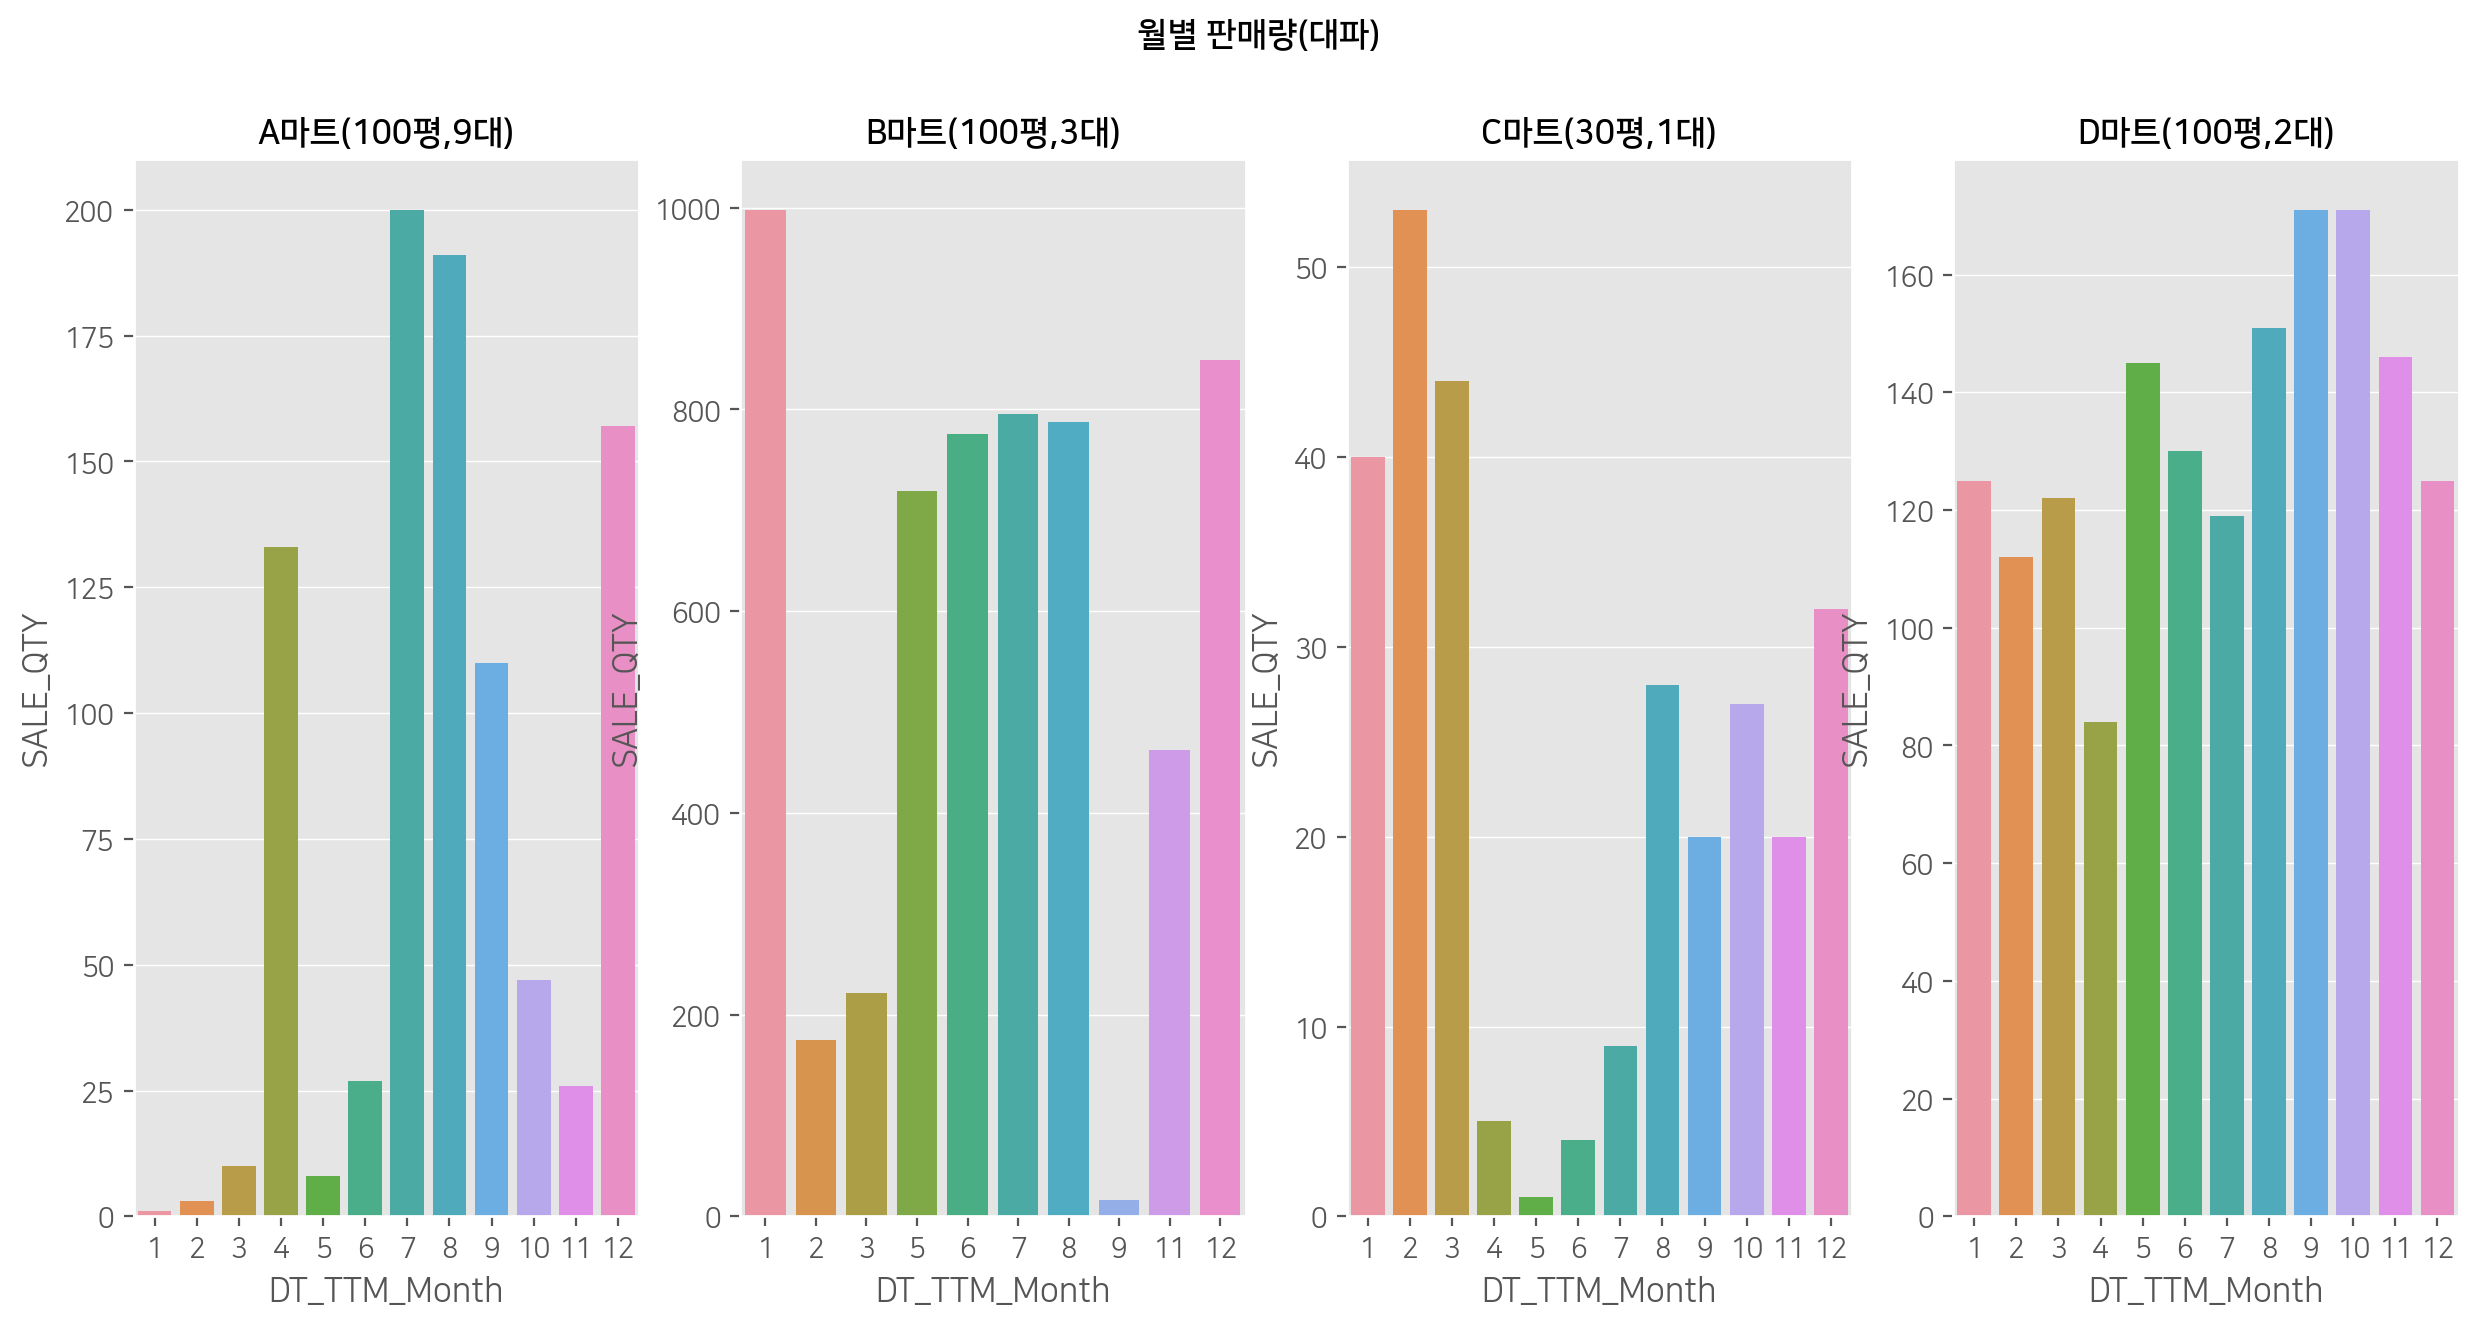

In [23]:
# Pivot Table
dp_group_month_a = pd.pivot_table(data=dp_a, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')
dp_group_month_b = pd.pivot_table(data=dp_b, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')
dp_group_month_c = pd.pivot_table(data=dp_c, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')
dp_group_month_d = pd.pivot_table(data=dp_d, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('월별 판매량(대파)', fontweight='bold', size = 12)

plt.subplot(141)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
sns.barplot(x=dp_group_month_a.index, y=dp_group_month_a['SALE_QTY'])

plt.subplot(142)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
sns.barplot(x=dp_group_month_b.index, y=dp_group_month_b['SALE_QTY'])

plt.subplot(143)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
sns.barplot(x=dp_group_month_c.index, y=dp_group_month_c['SALE_QTY'])

plt.subplot(144)
plt.title('D마트(100평,2대)', fontweight='bold', size = 12)
sns.barplot(x=dp_group_month_d.index, y=dp_group_month_d['SALE_QTY'])

plt.show()

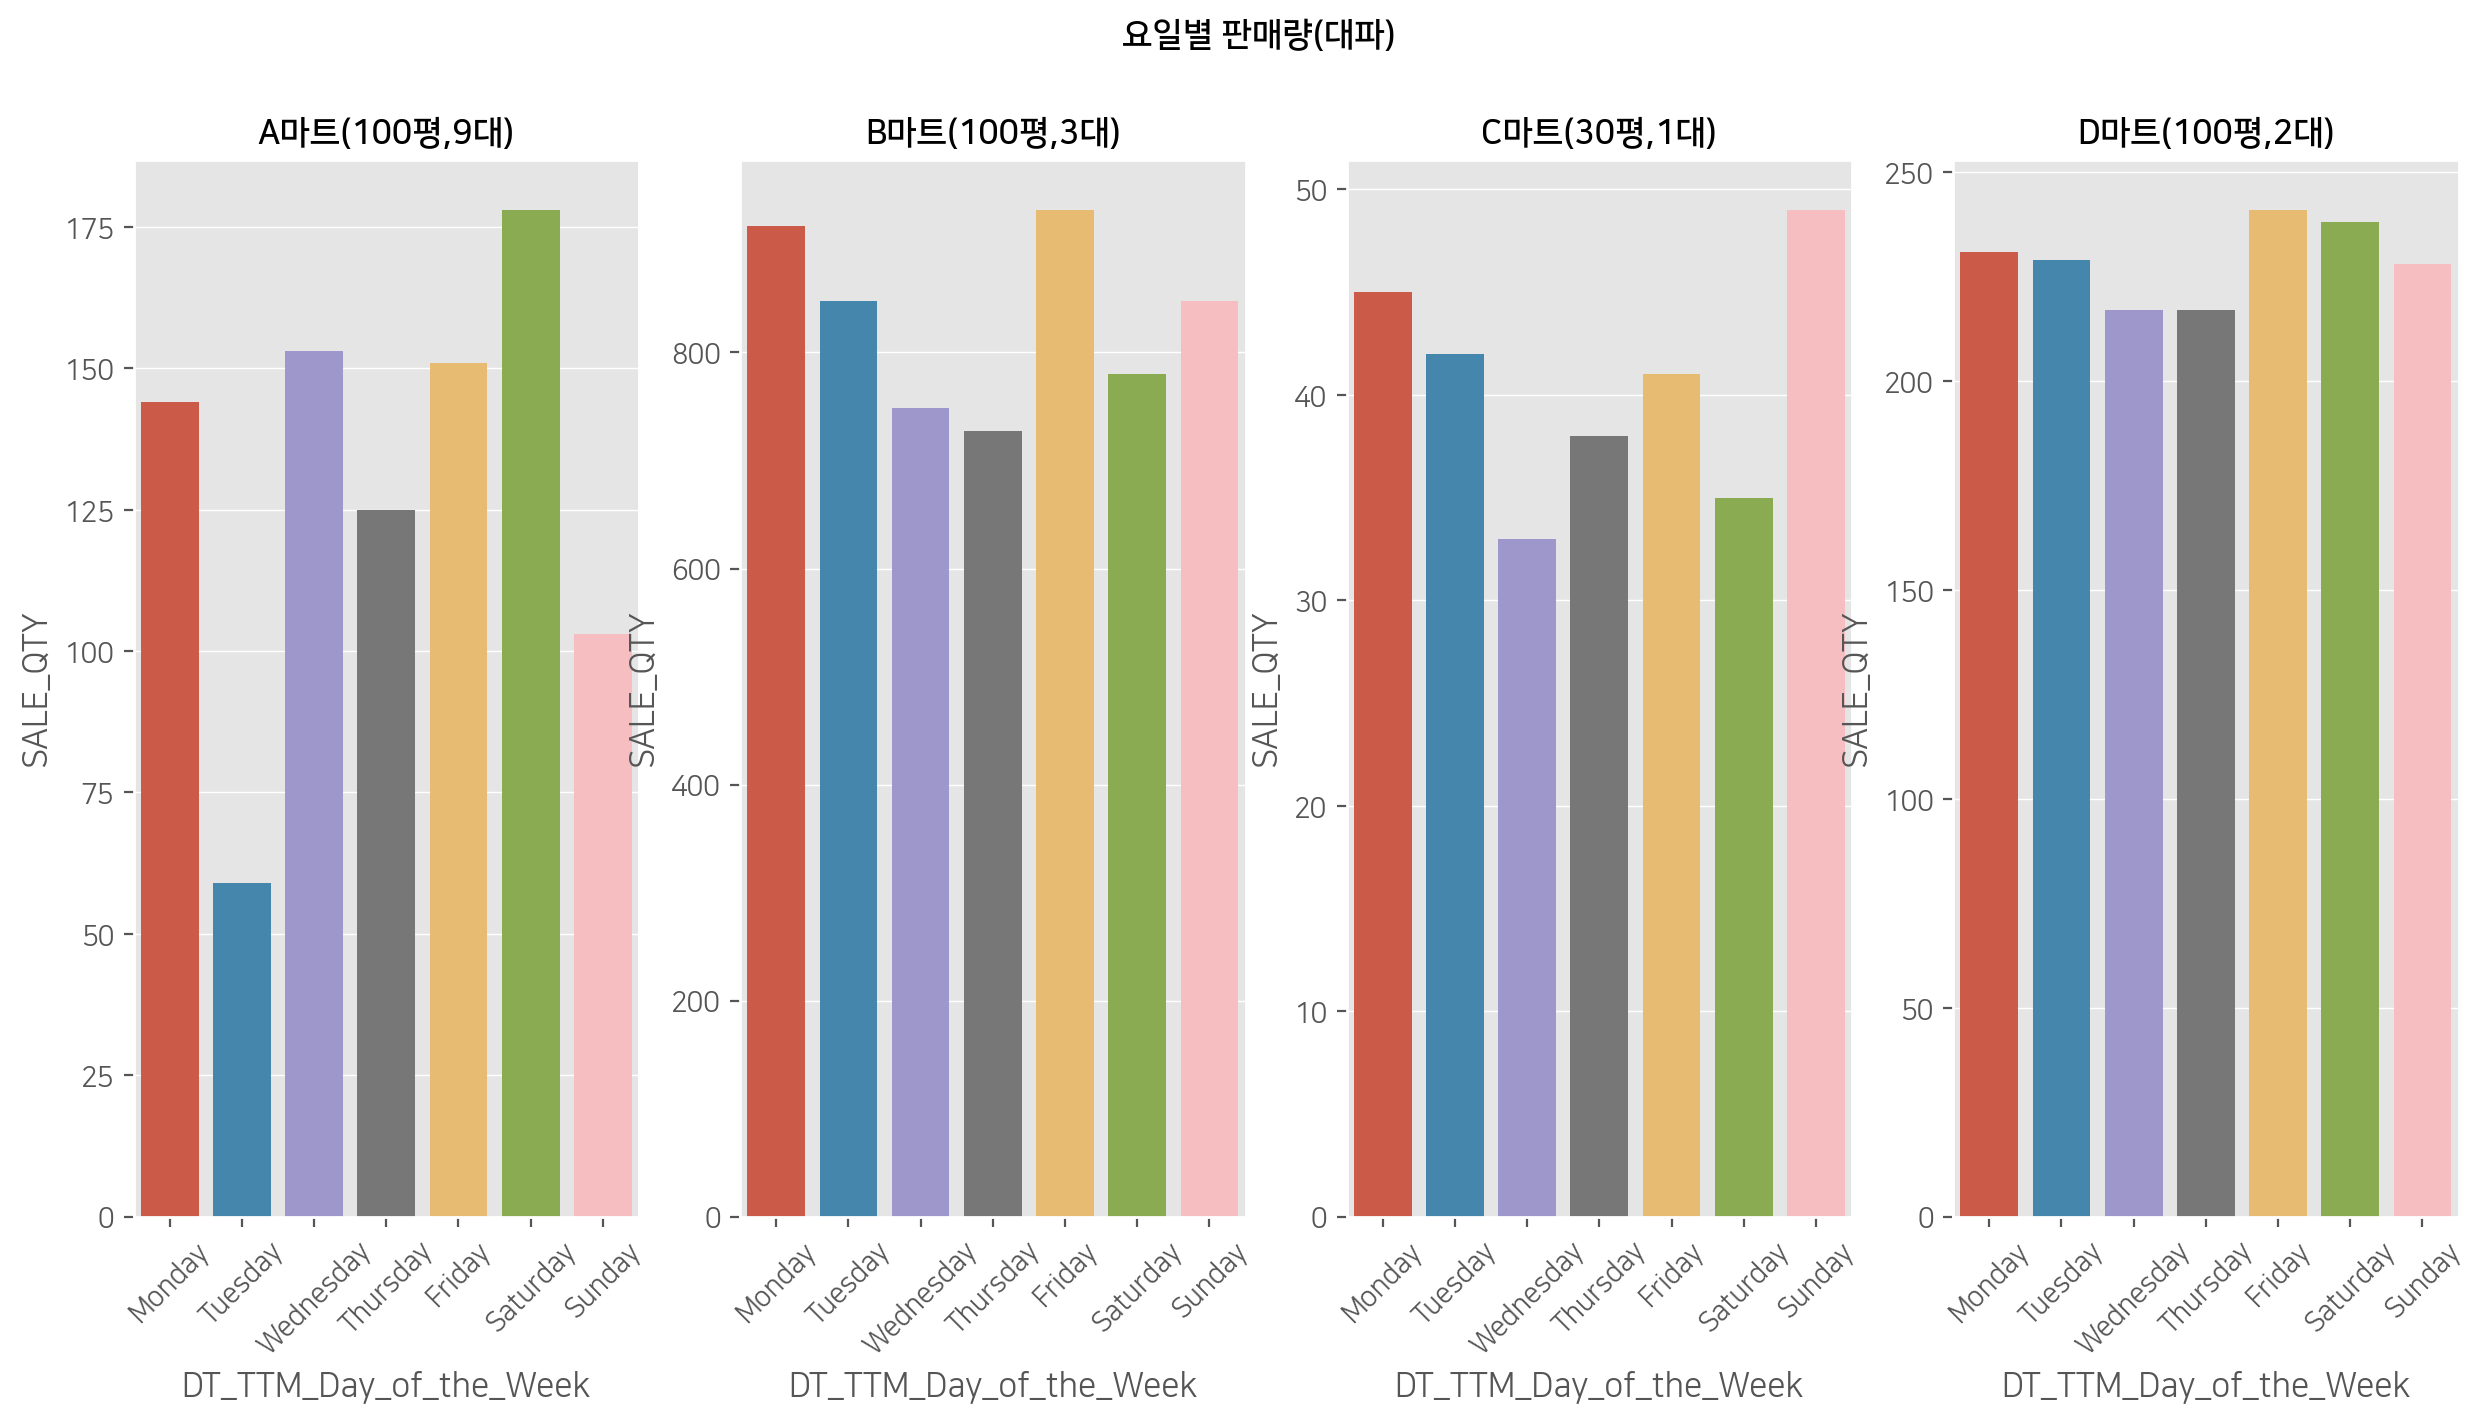

In [24]:
# Pivot Table
dp_group_dw_a = pd.pivot_table(data=dp_a, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')
dp_group_dw_b = pd.pivot_table(data=dp_b, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')
dp_group_dw_c = pd.pivot_table(data=dp_c, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')
dp_group_dw_d = pd.pivot_table(data=dp_d, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('요일별 판매량(대파)', fontweight='bold', size = 12)

plt.subplot(141)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.barplot(x=dp_group_dw_a.index, y=dp_group_dw_a['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.subplot(142)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.barplot(x=dp_group_dw_b.index, y=dp_group_dw_b['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.subplot(143)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.barplot(x=dp_group_dw_c.index, y=dp_group_dw_c['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.subplot(144)
plt.title('D마트(100평,2대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.barplot(x=dp_group_dw_d.index, y=dp_group_dw_d['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.show()

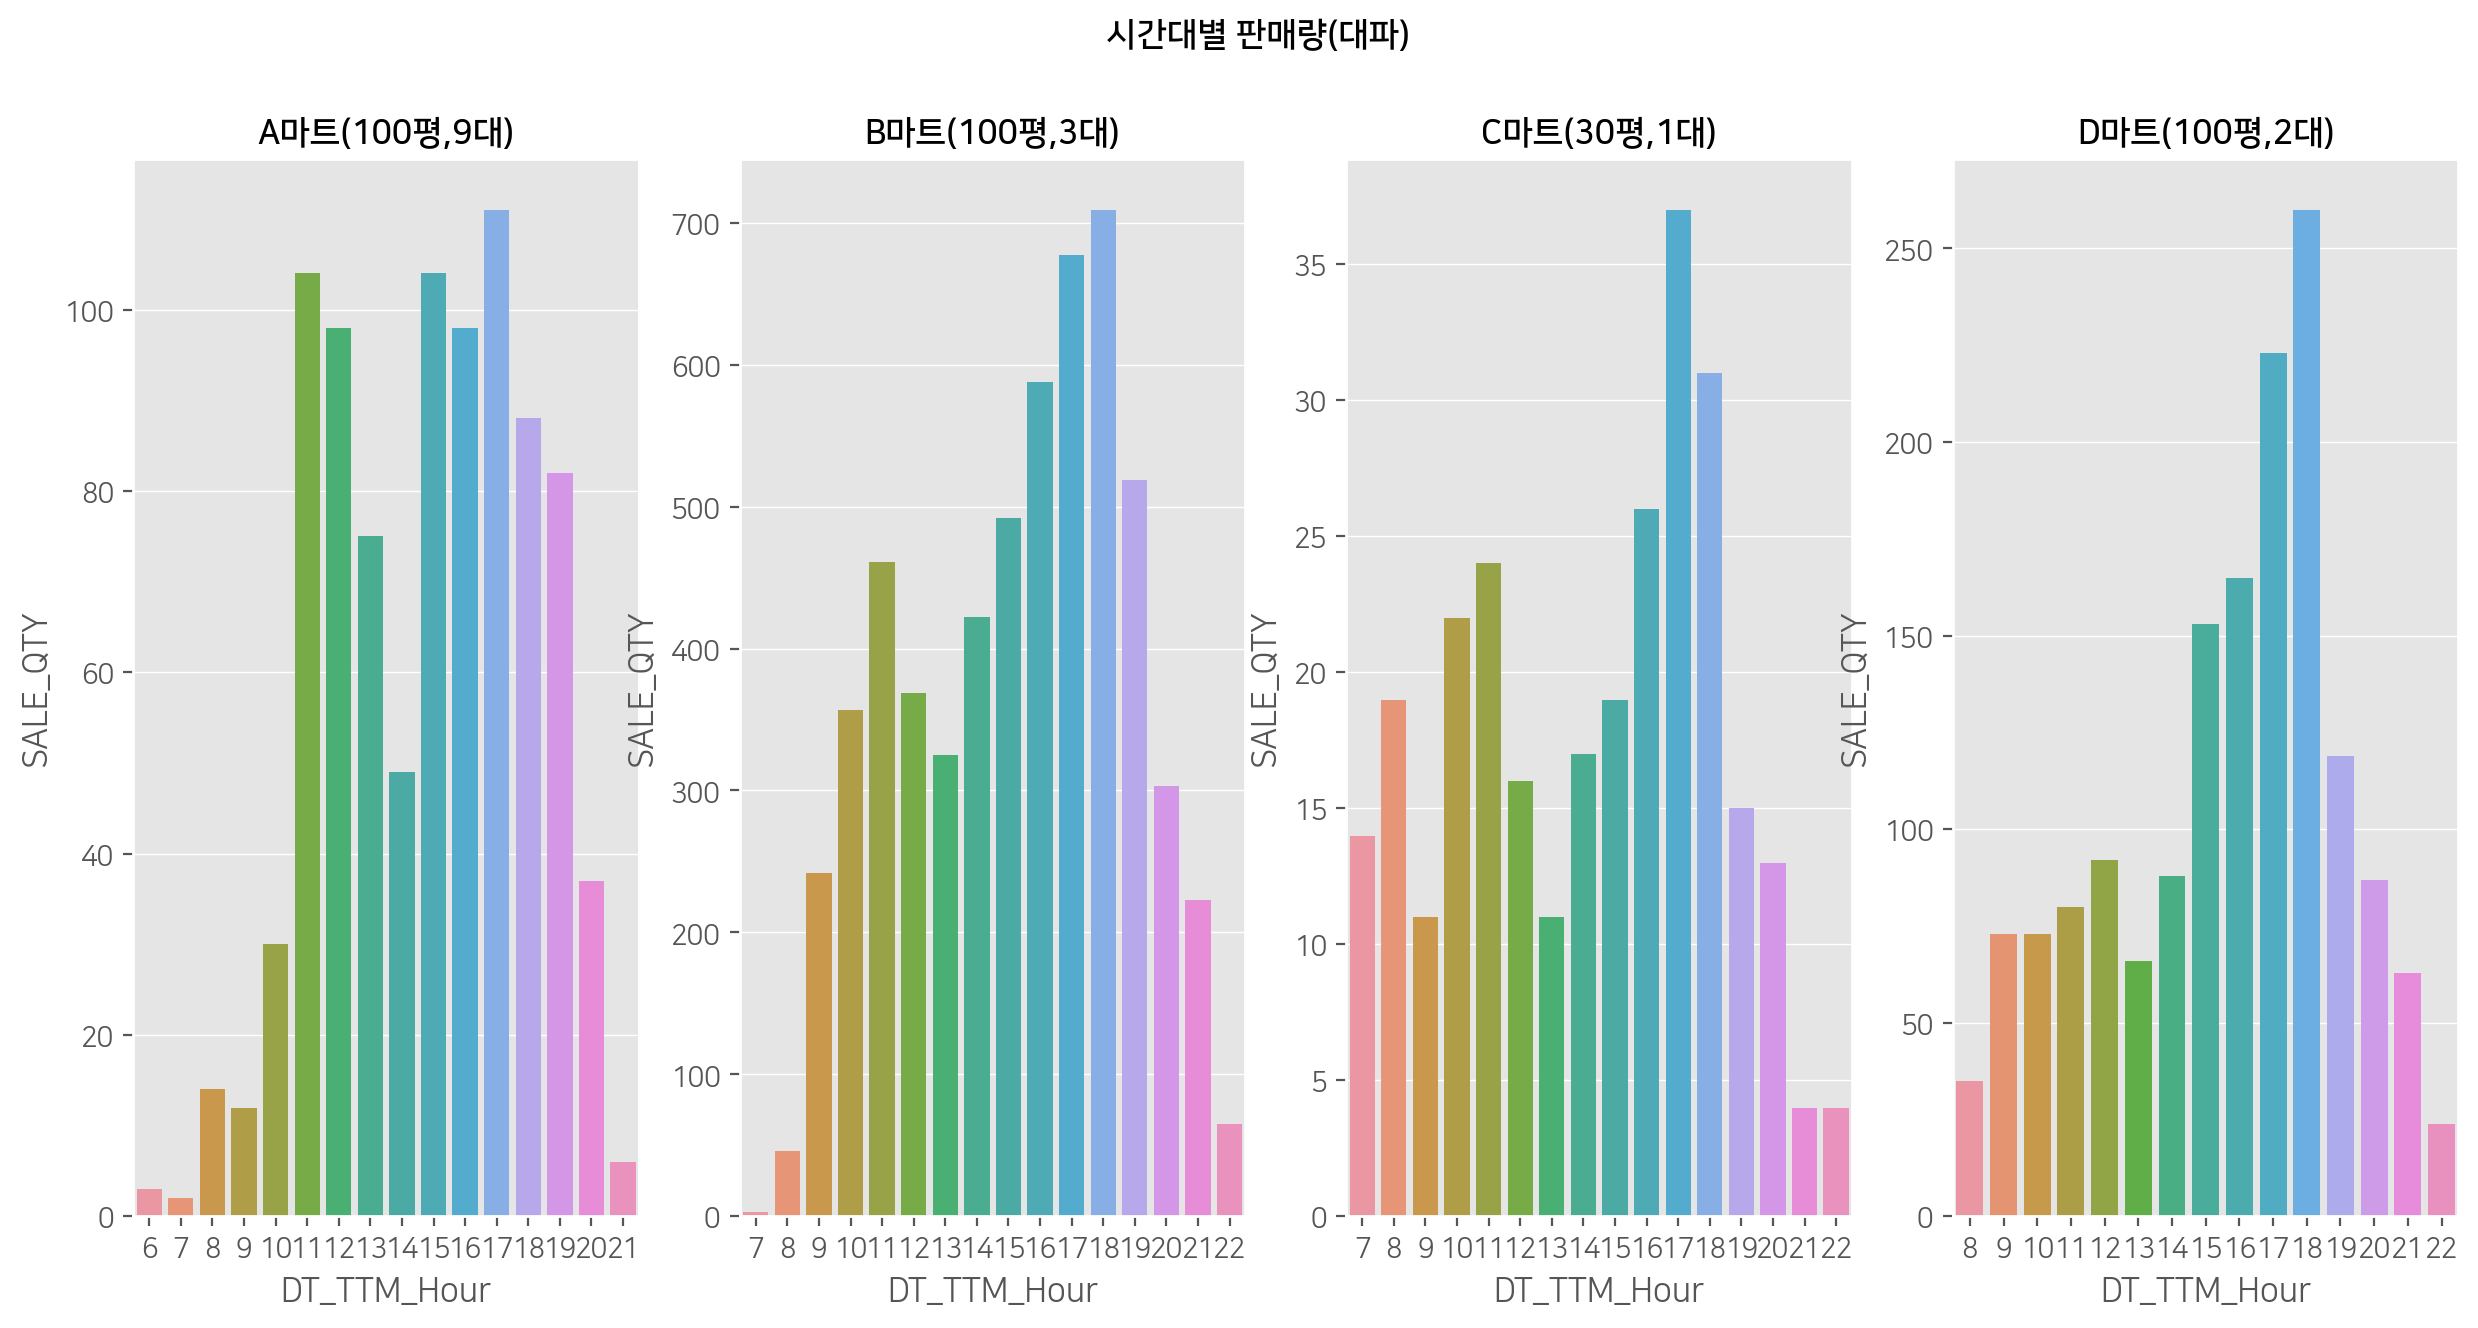

In [25]:
# Pivot Table
dp_group_hour_a = pd.pivot_table(data=dp_a, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')
dp_group_hour_b = pd.pivot_table(data=dp_b, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')
dp_group_hour_c = pd.pivot_table(data=dp_c, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')
dp_group_hour_d = pd.pivot_table(data=dp_d, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('시간대별 판매량(대파)', fontweight='bold', size = 12)

plt.subplot(141)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
sns.barplot(x=dp_group_hour_a.index, y=dp_group_hour_a['SALE_QTY'])

plt.subplot(142)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
sns.barplot(x=dp_group_hour_b.index, y=dp_group_hour_b['SALE_QTY'])

plt.subplot(143)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
sns.barplot(x=dp_group_hour_c.index, y=dp_group_hour_c['SALE_QTY'])

plt.subplot(144)
plt.title('D마트(100평,2대)', fontweight='bold', size = 12)
sns.barplot(x=dp_group_hour_d.index, y=dp_group_hour_d['SALE_QTY'])

plt.show()

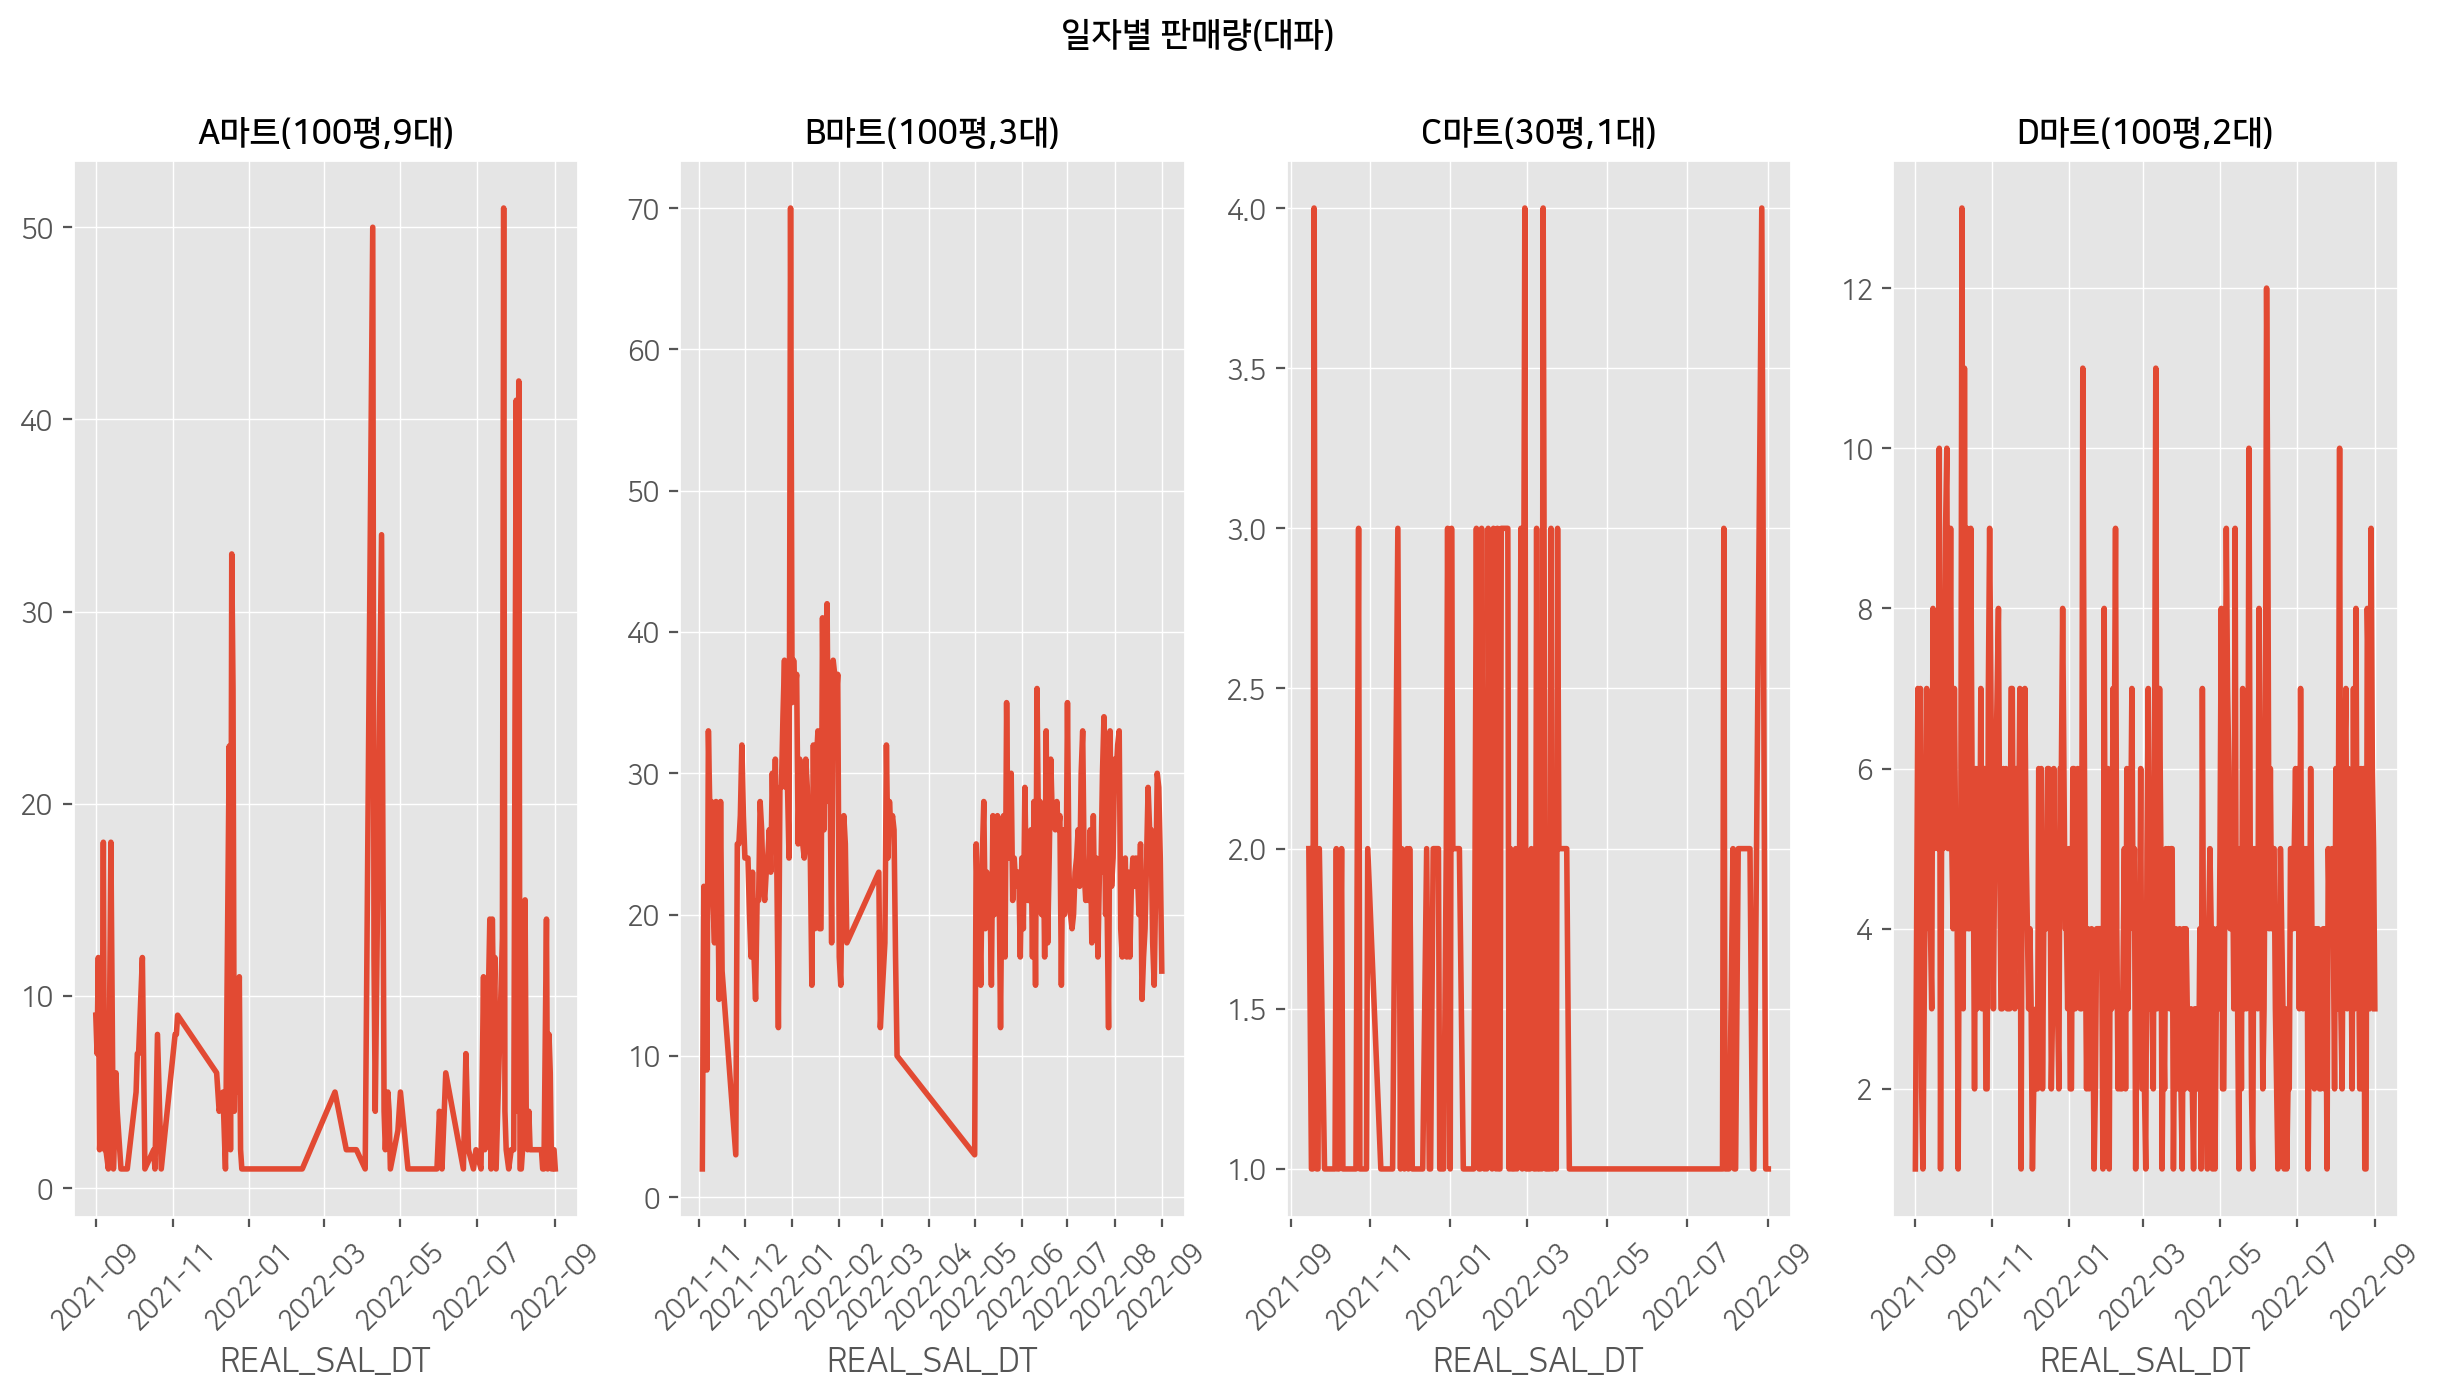

In [26]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일자별 판매량(대파)', fontweight='bold', size = 12)

plt.subplot(141)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(x=a.index, y=a.values, estimator=sum)

plt.subplot(142)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(x=b.index, y=b.values, estimator=sum)

plt.subplot(143)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(x=c.index, y=c.values, estimator=sum)

plt.subplot(144)
plt.title('D마트(100평,2대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(x=d.index, y=d.values, estimator=sum)

plt.show()

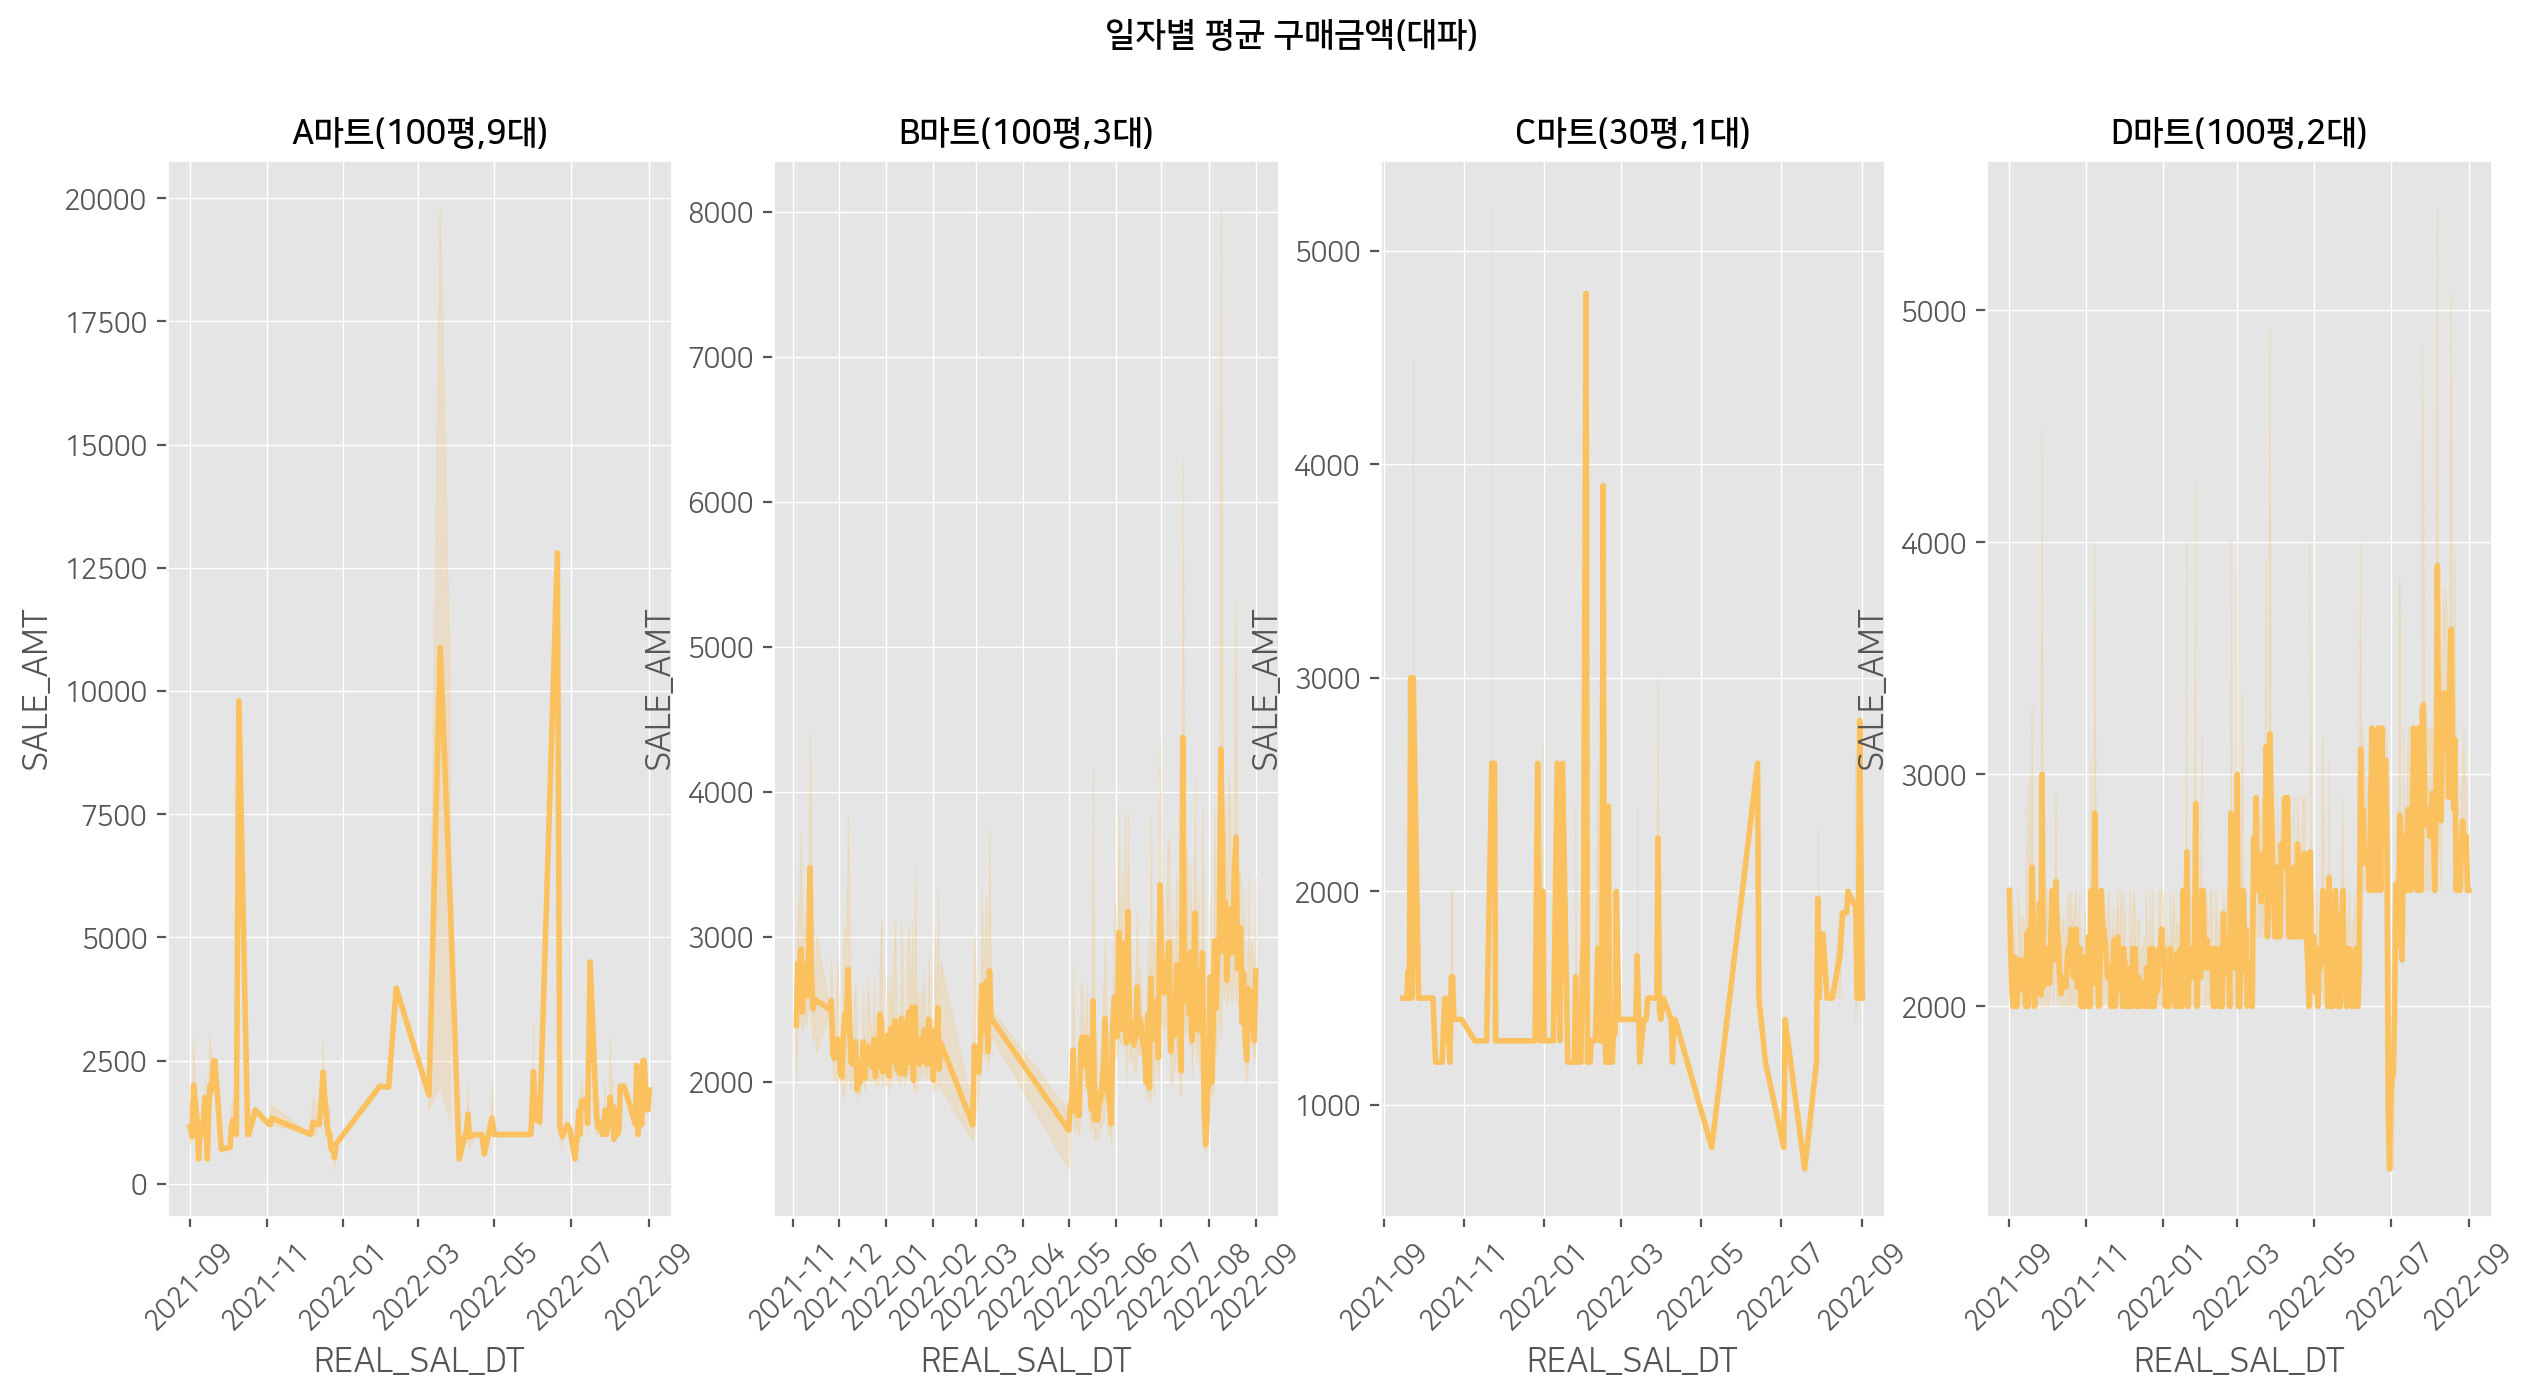

In [27]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일자별 평균 구매금액(대파)', fontweight='bold', size = 12)

plt.subplot(141)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_a, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.subplot(142)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_b, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.subplot(143)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_c, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.subplot(144)
plt.title('D마트(100평,2대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_d, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.show()

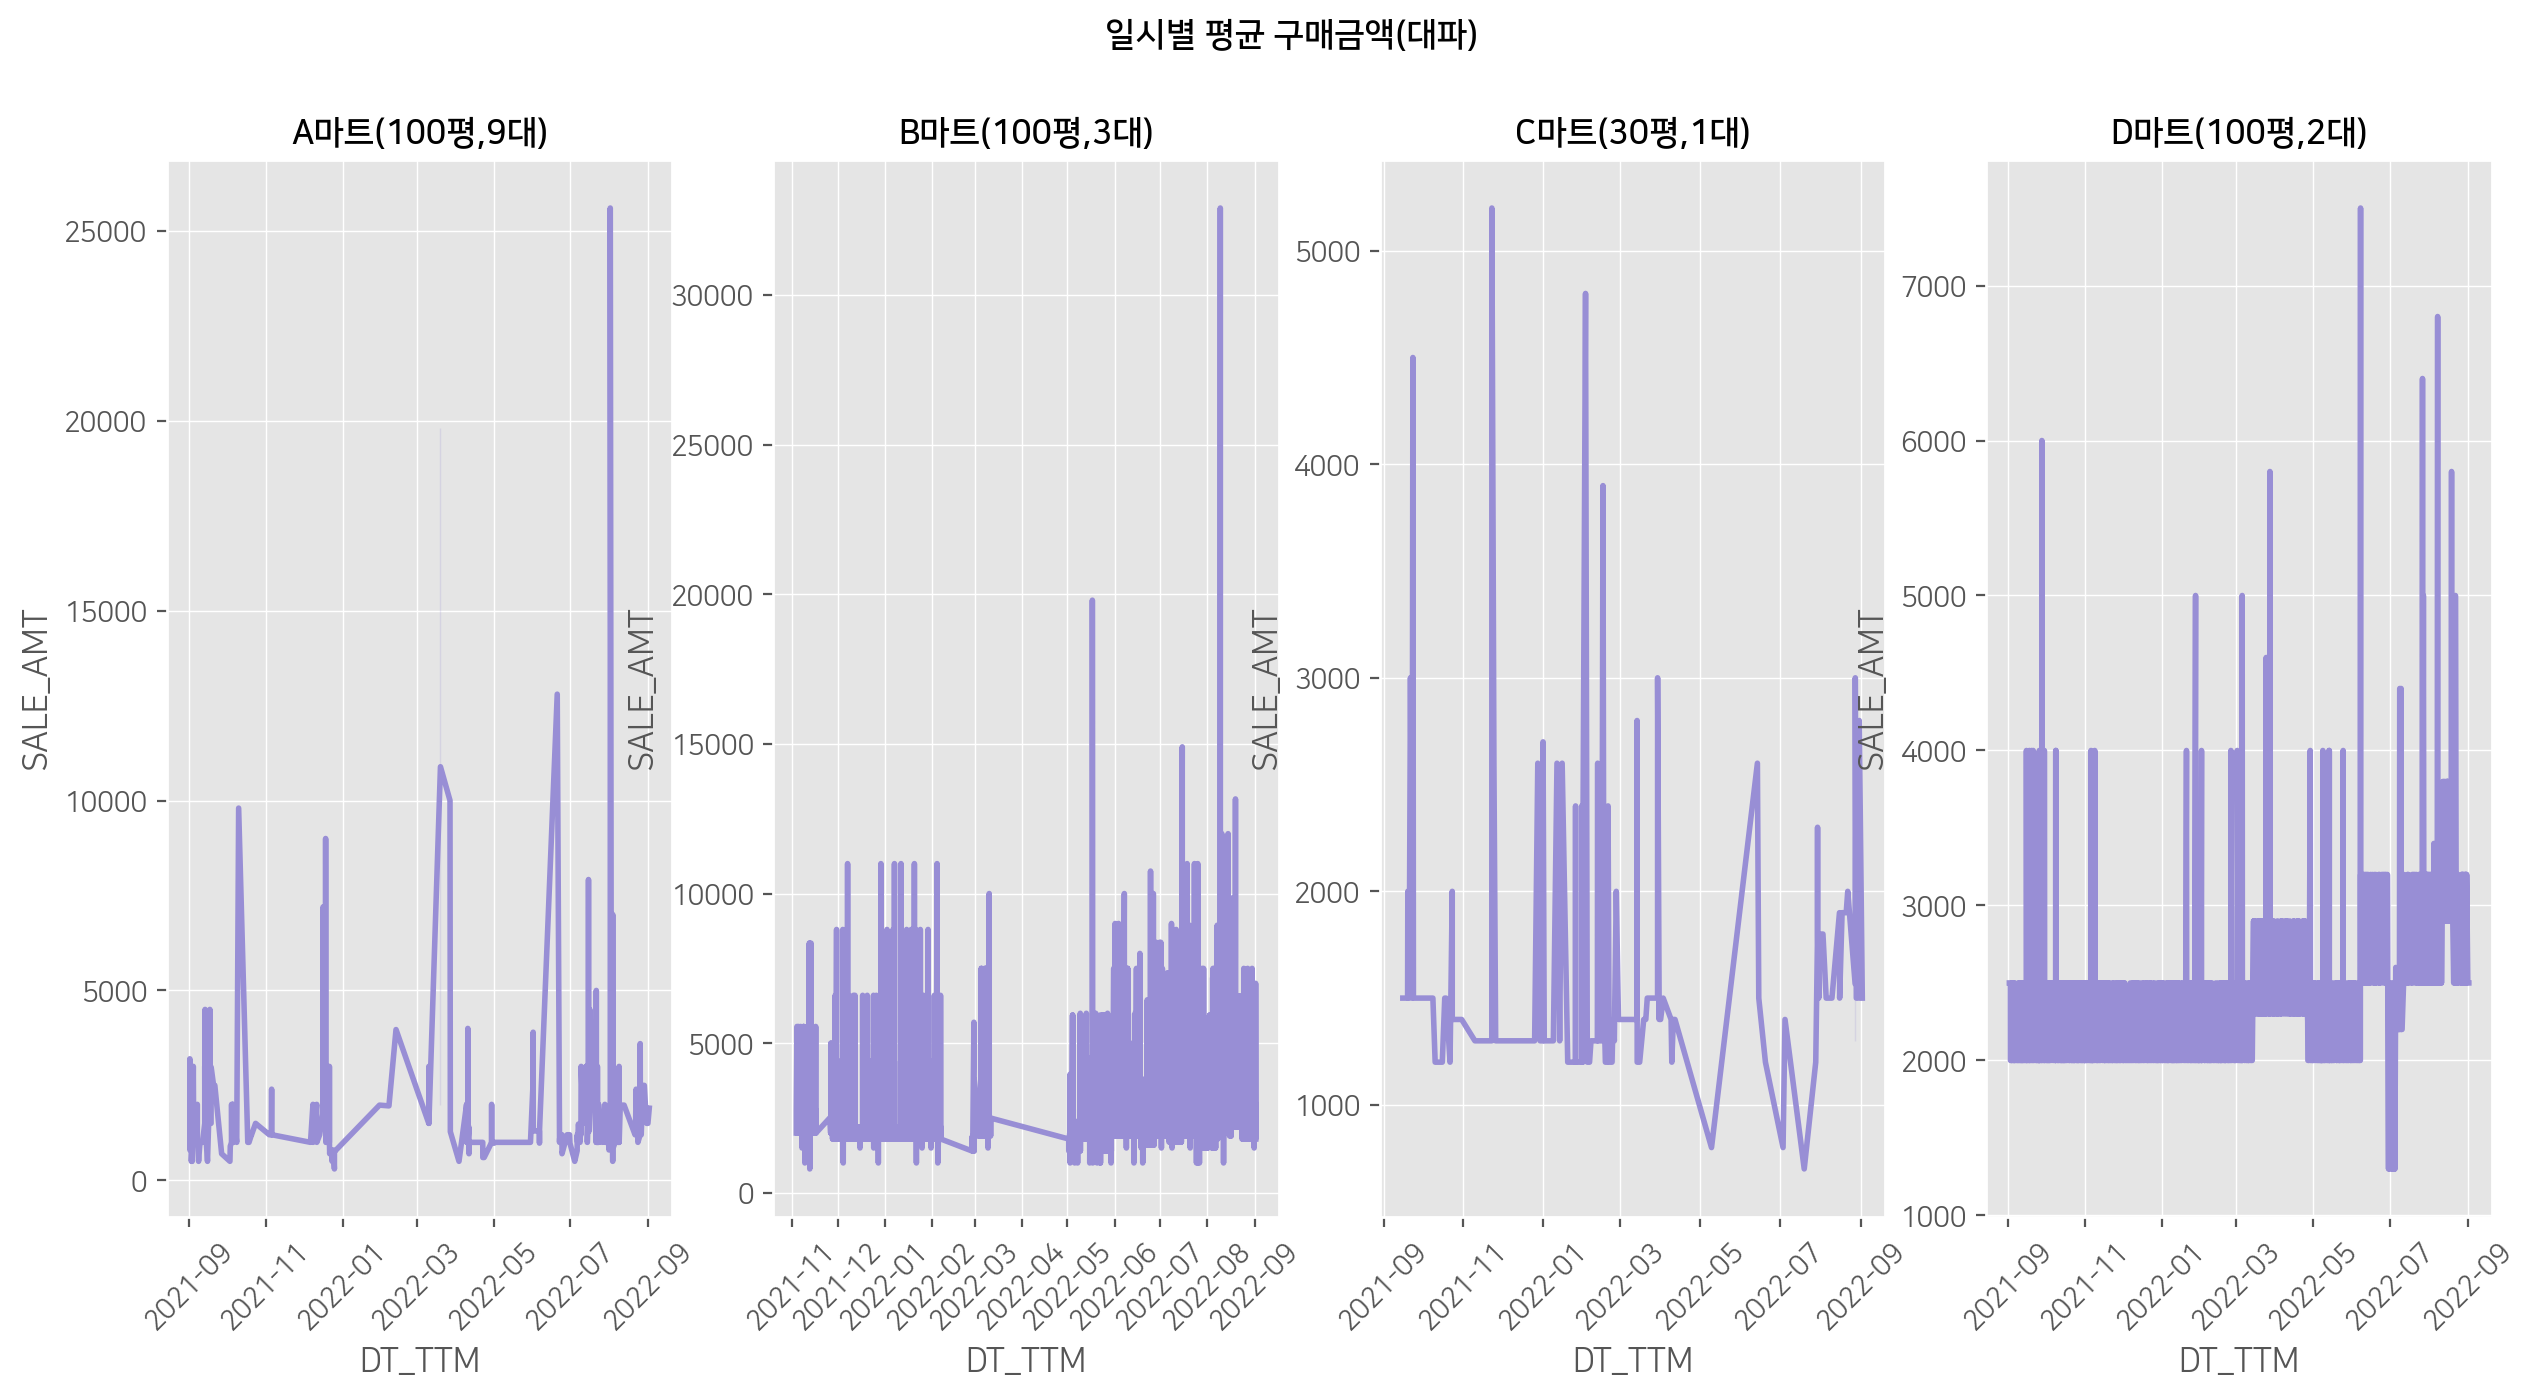

In [28]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일시별 평균 구매금액(대파)', fontweight='bold', size = 12)

plt.subplot(141)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_a, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.subplot(142)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_b, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.subplot(143)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_c, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.subplot(144)
plt.title('D마트(100평,2대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_d, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.show()

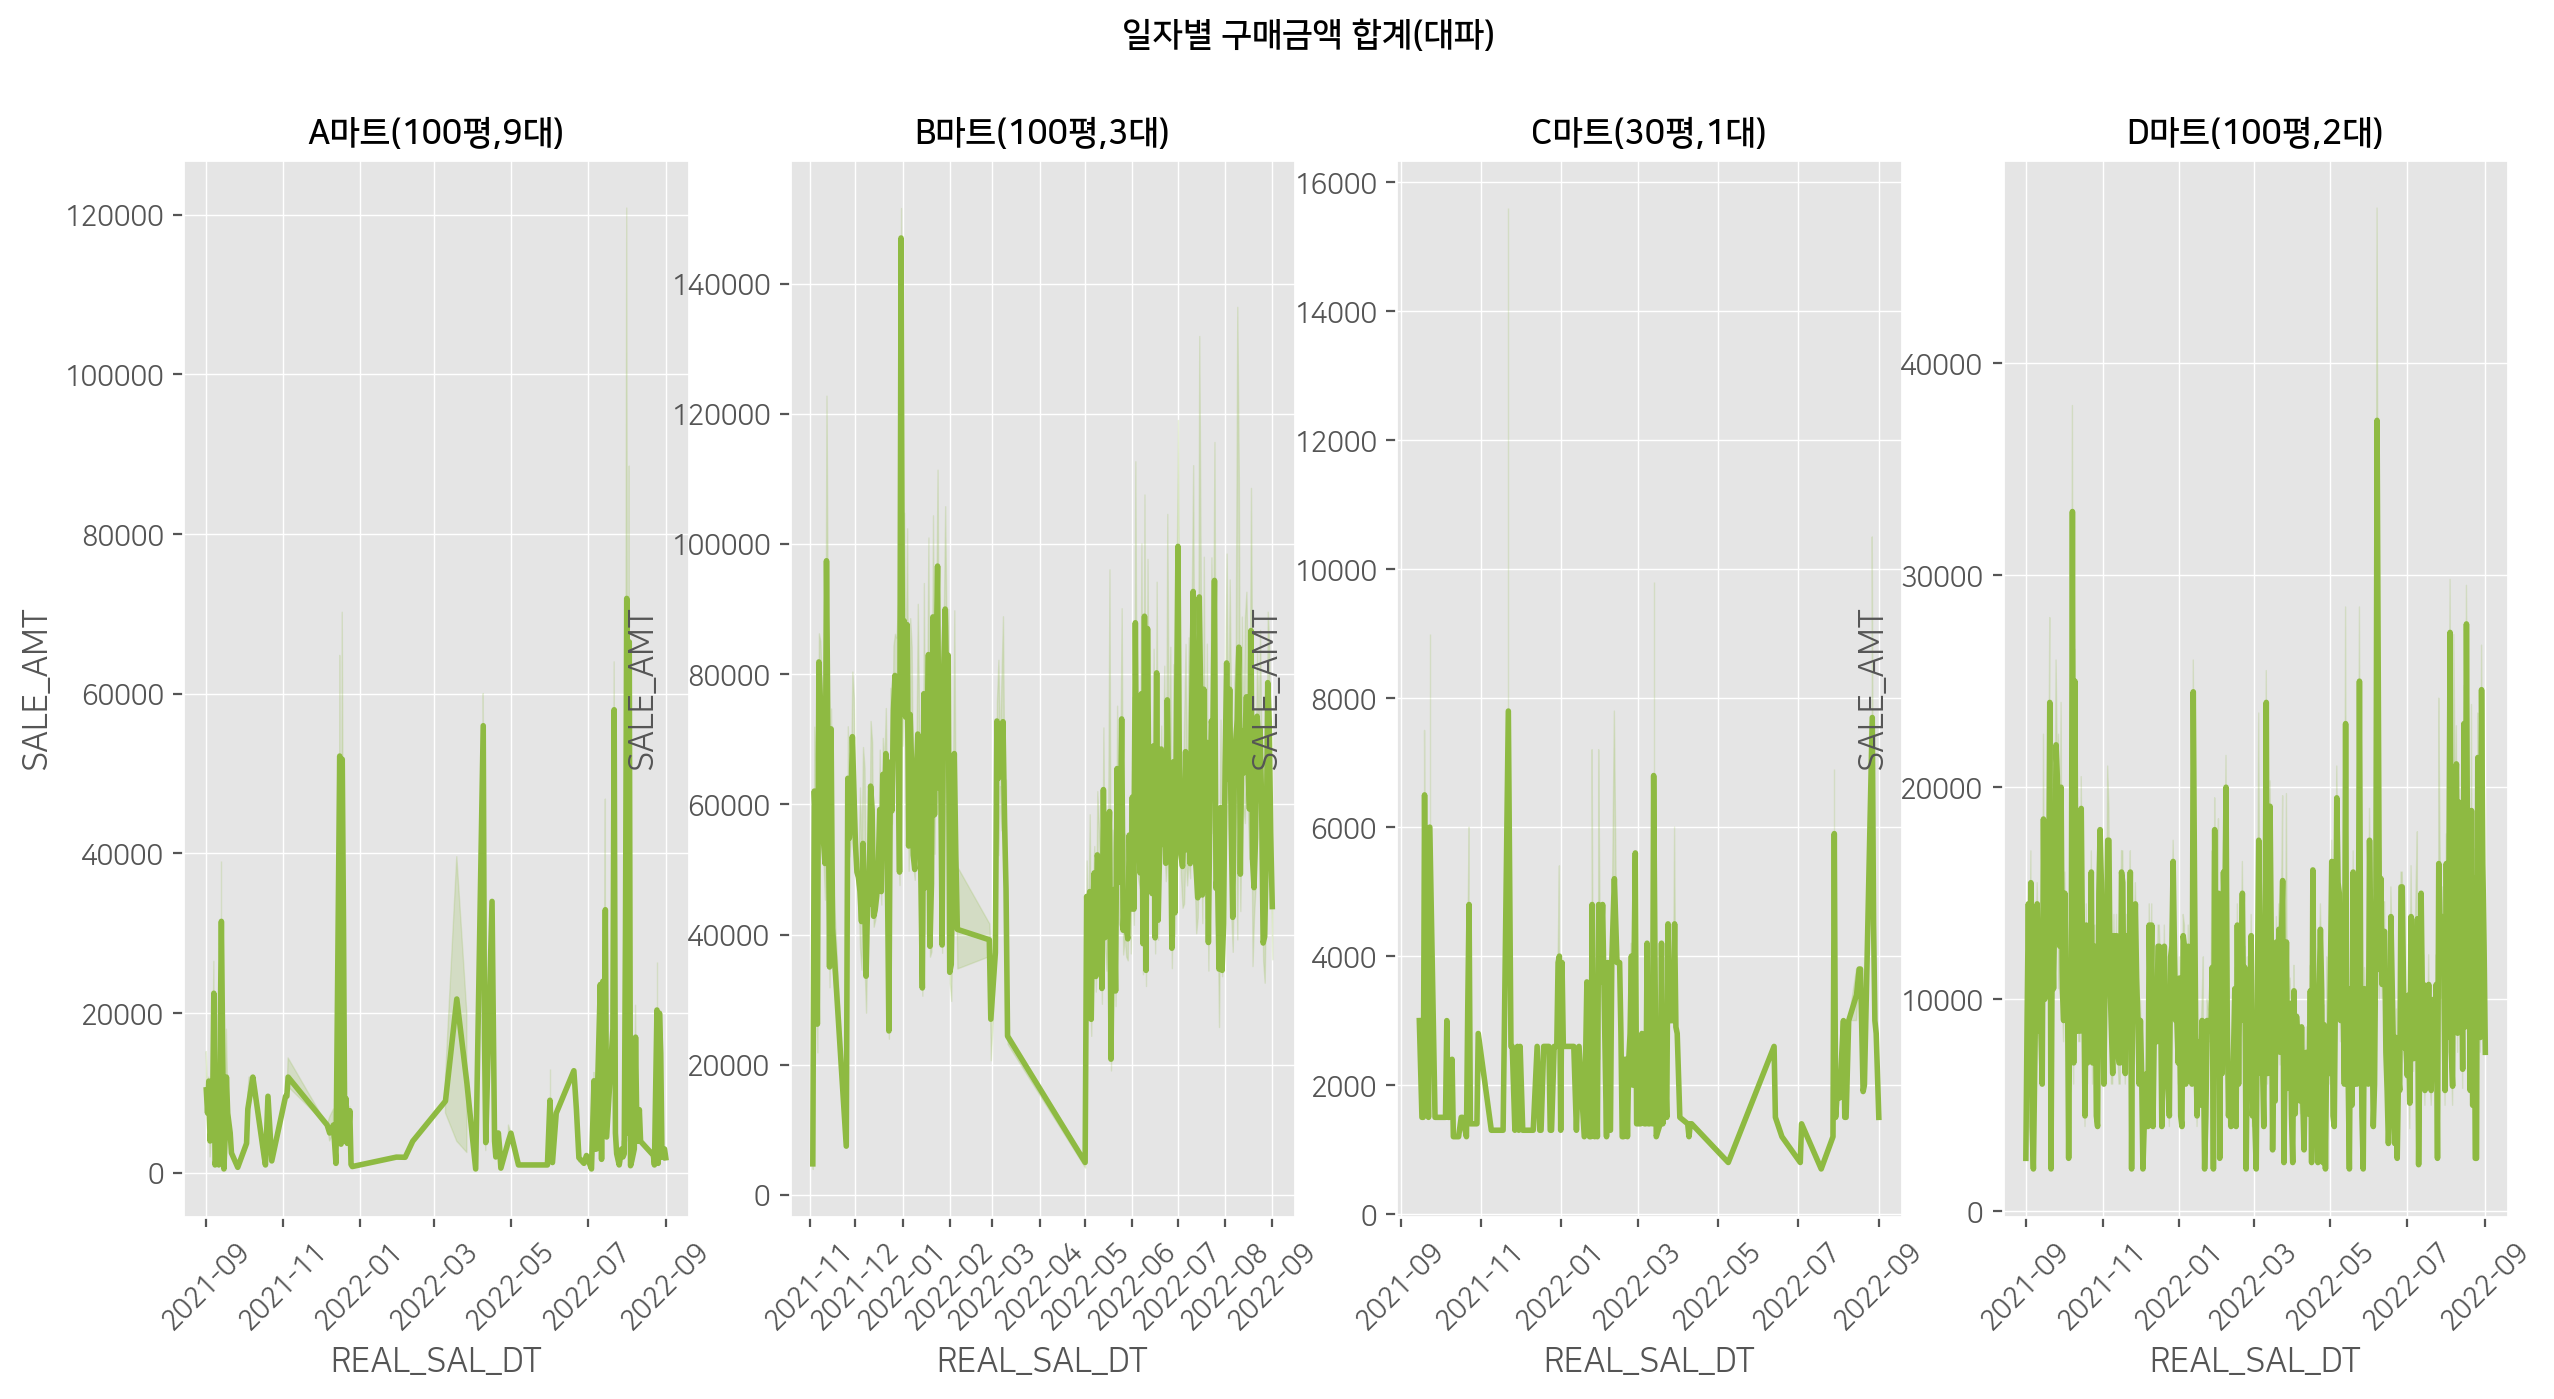

In [29]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일자별 구매금액 합계(대파)', fontweight='bold', size = 12)

plt.subplot(141)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_a, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.subplot(142)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_b, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.subplot(143)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_c, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.subplot(144)
plt.title('D마트(100평,2대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_d, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.show()

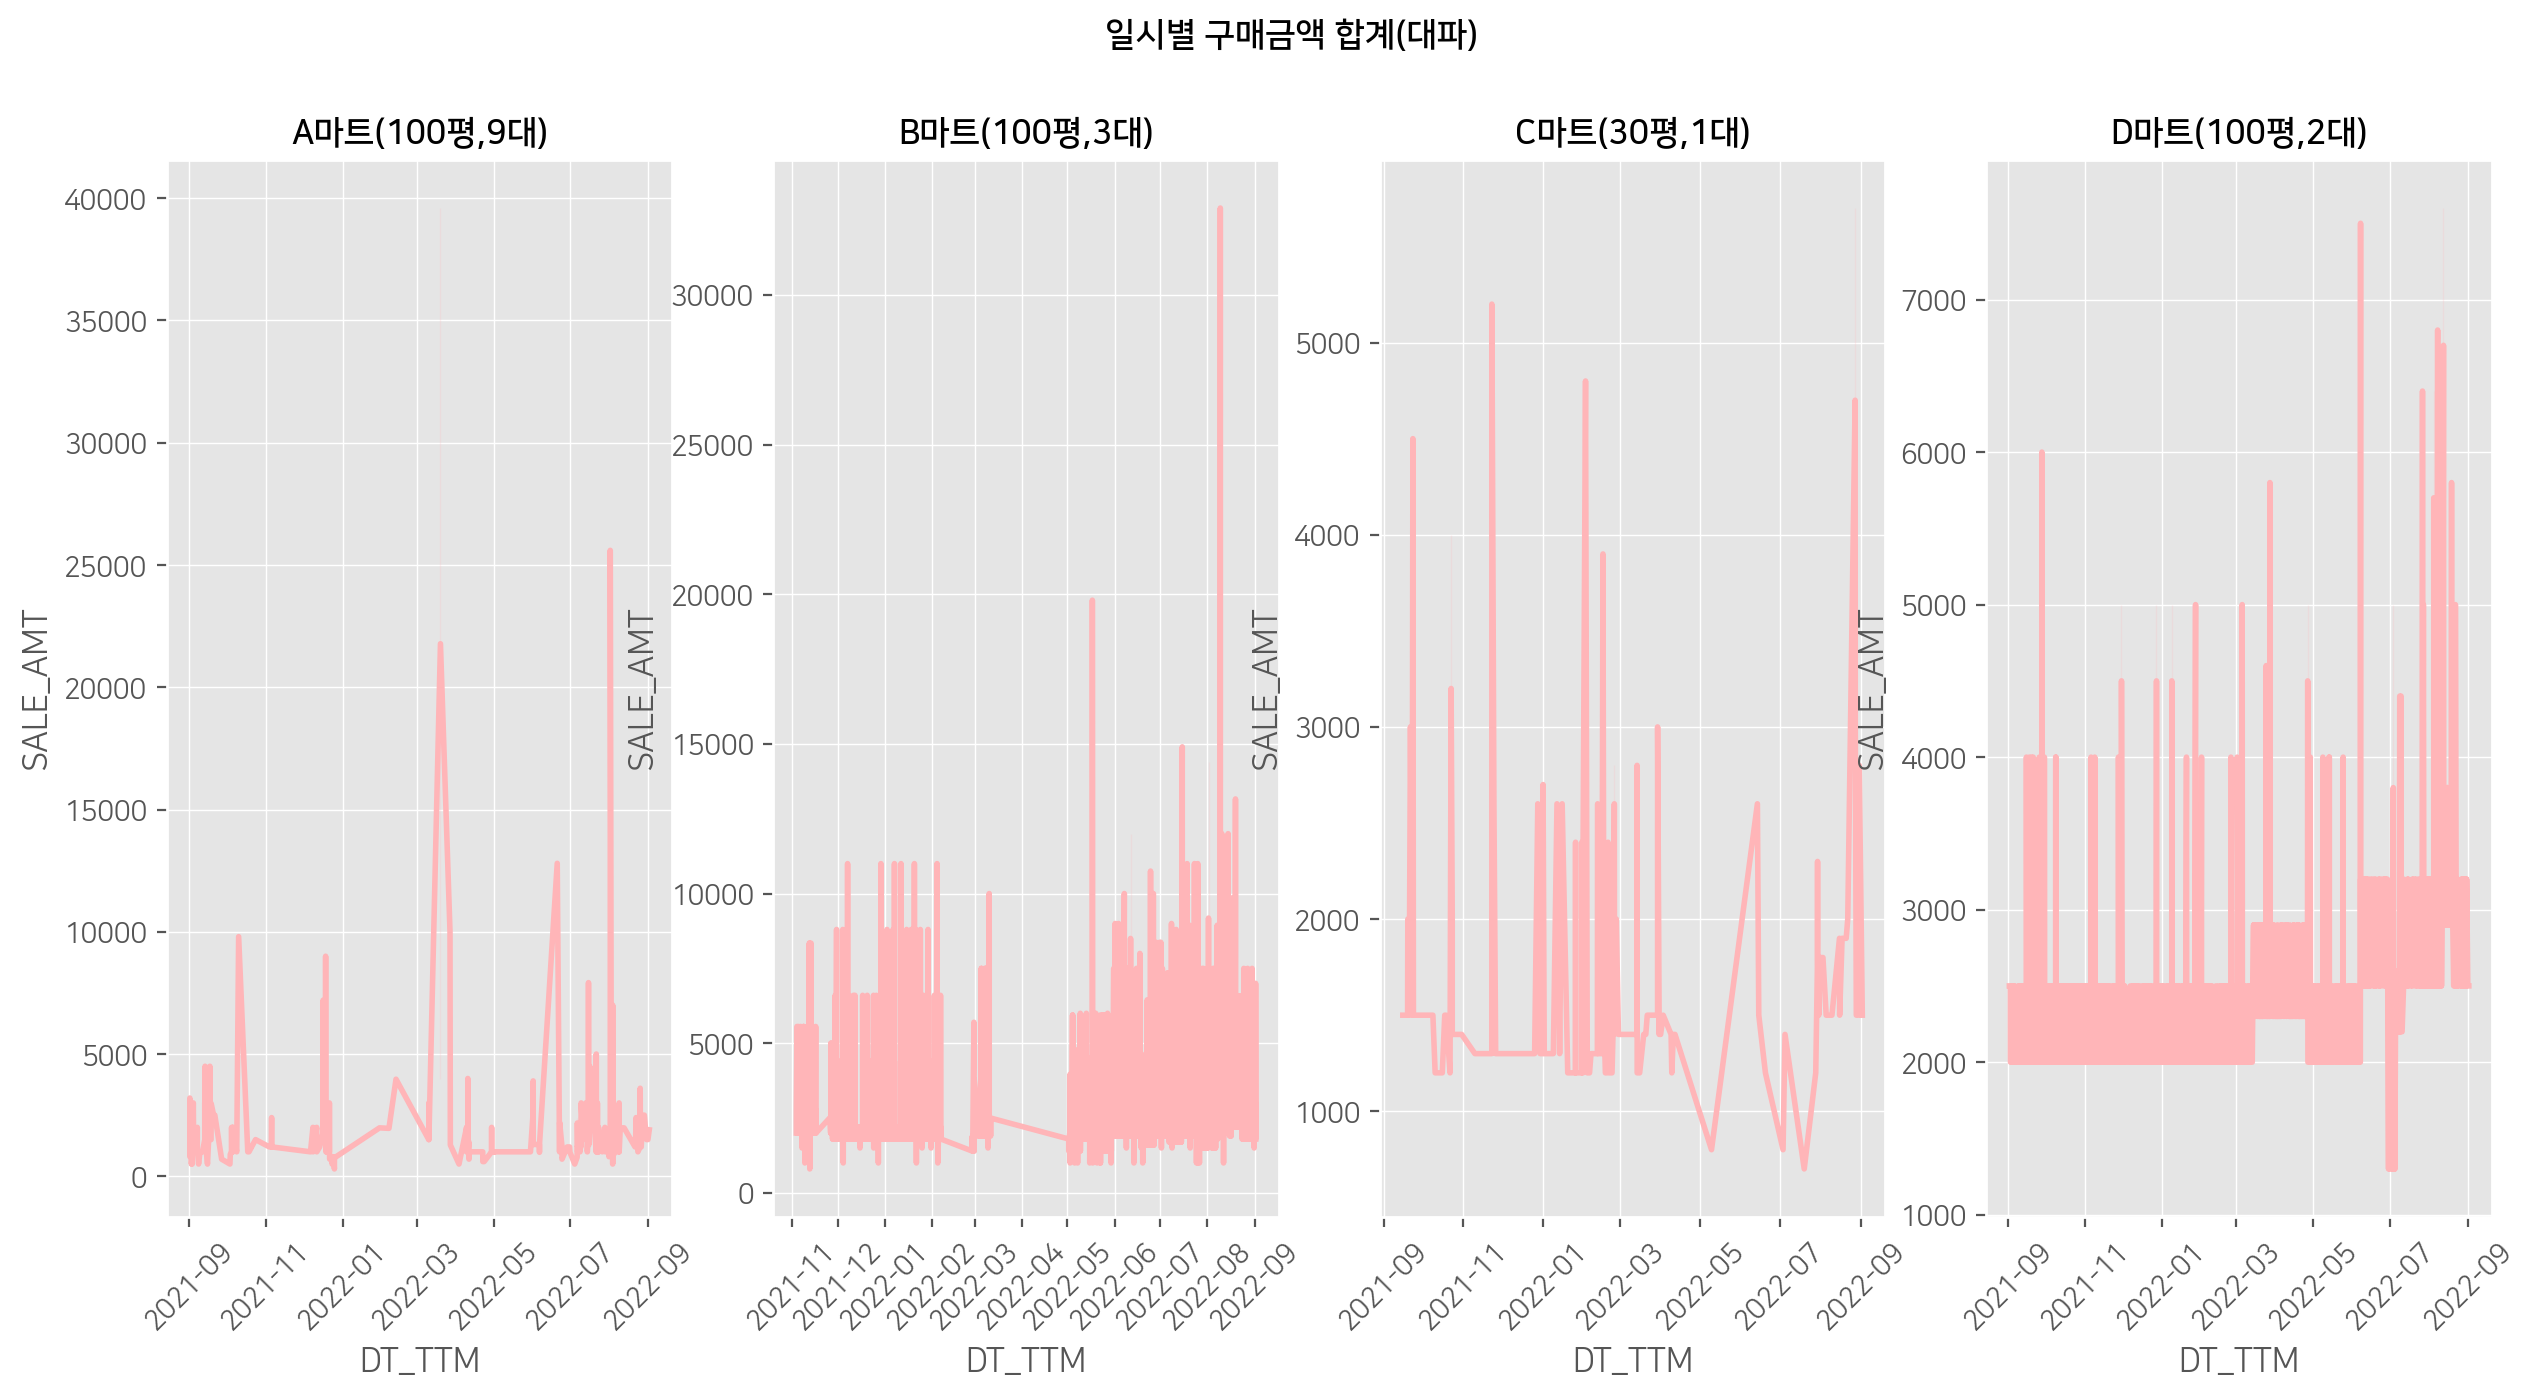

In [30]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일시별 구매금액 합계(대파)', fontweight='bold', size = 12)

plt.subplot(141)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_a, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.subplot(142)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_b, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.subplot(143)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_c, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.subplot(144)
plt.title('D마트(100평,2대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=dp_d, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.show()

## 수박: 계절성이 강함

In [31]:
# Data Load
gds_a_prep = pd.read_csv(abcd_path + 'prep/gds_a_prep.csv', index_col=0)
gds_b_prep = pd.read_csv(abcd_path + 'prep/gds_b_prep.csv', index_col=0)
gds_c_prep = pd.read_csv(abcd_path + 'prep/gds_c_prep.csv', index_col=0)
gds_d_prep = pd.read_csv(abcd_path + 'prep/gds_d_prep.csv', index_col=0)

merge_a = pd.read_csv(abcd_path + 'merge/merge_a.csv', index_col=0)
merge_b = pd.read_csv(abcd_path + 'merge/merge_b.csv', index_col=0)
merge_c = pd.read_csv(abcd_path + 'merge/merge_c.csv', index_col=0)
merge_d = pd.read_csv(abcd_path + 'merge/merge_d.csv', index_col=0)

In [ ]:
# A마트
gds_a_prep[gds_a_prep.GDS_NM.str.contains('수박')]

In [32]:
# int to str
merge_a['REAL_SAL_DT'] = merge_a['REAL_SAL_DT'].astype(str)

# str to datetime
merge_a['REAL_SAL_DT'] = merge_a['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_a['DT_TTM'] = pd.to_datetime(merge_a['DT_TTM'])

# Extract
merge_a['DT_TTM_Year'] = merge_a['DT_TTM'].dt.year # Year
merge_a['DT_TTM_Month'] = merge_a['DT_TTM'].dt.month # Month
merge_a['DT_TTM_Day'] = merge_a['DT_TTM'].dt.day # Day
merge_a['DT_TTM_Hour'] = merge_a['DT_TTM'].dt.hour # Hour
merge_a['DT_TTM_Week'] = merge_a['DT_TTM'].dt.week # Week
merge_a['DT_TTM_Week_4'] = (merge_a['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_a['DT_TTM_Week_5'] = (merge_a['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_a['DT_TTM_Day_of_the_Week'] = merge_a['DT_TTM'].dt.day_name() # Day of the Week

# A마트의 신선식품인 수박 merge
sb_a = merge_a[(merge_a['PLU_CD'] == 201490) | (merge_a['PLU_CD'] == 201492) | (merge_a['PLU_CD'] == 29087875454125) |
               (merge_a['PLU_CD'] == 2908787874125) | (merge_a['PLU_CD'] == 2908990003781) | (merge_a['PLU_CD'] == 2908990007383) |
               (merge_a['PLU_CD'] == 2908990007574) | (merge_a['PLU_CD'] == 2908990007758) | (merge_a['PLU_CD'] == 29089900415645) |
               (merge_a['PLU_CD'] == 2999000000715) | (merge_a['PLU_CD'] == 2999000000746) | (merge_a['PLU_CD'] == 2999000000890) |
               (merge_a['PLU_CD'] == 2999000001217) | (merge_a['PLU_CD'] == 2999000034581) | (merge_a['PLU_CD'] == 2999000034833) |
               (merge_a['PLU_CD'] == 2999000035342)]

# Data Save
sb_a.to_csv(abcd_path + '/analysis/sb_a.csv')

# 일자별
a = sb_a.groupby('REAL_SAL_DT').size()

In [ ]:
# B마트
gds_b_prep[gds_b_prep.GDS_NM.str.contains('수박')]

In [33]:
# int to str
merge_b['REAL_SAL_DT'] = merge_b['REAL_SAL_DT'].astype(str)

# str to datetime
merge_b['REAL_SAL_DT'] = merge_b['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_b['DT_TTM'] = pd.to_datetime(merge_b['DT_TTM'])

# Extract
merge_b['DT_TTM_Year'] = merge_b['DT_TTM'].dt.year # Year
merge_b['DT_TTM_Month'] = merge_b['DT_TTM'].dt.month # Month
merge_b['DT_TTM_Day'] = merge_b['DT_TTM'].dt.day # Day
merge_b['DT_TTM_Hour'] = merge_b['DT_TTM'].dt.hour # Hour
merge_b['DT_TTM_Week'] = merge_b['DT_TTM'].dt.week # Week
merge_b['DT_TTM_Week_4'] = (merge_b['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_b['DT_TTM_Week_5'] = (merge_b['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_b['DT_TTM_Day_of_the_Week'] = merge_b['DT_TTM'].dt.day_name() # Day of the Week

# B마트의 저울식품인 수박 merge
sb_b = merge_b[(merge_b['PLU_CD'] == 201079) | (merge_b['PLU_CD'] == 201091) | (merge_b['PLU_CD'] == 201101) |
               (merge_b['PLU_CD'] == 209999) | (merge_b['PLU_CD'] == 2900000000896) | (merge_b['PLU_CD'] == 2900000000919)]

# Data Save
sb_b.to_csv(abcd_path + '/analysis/sb_b.csv')

# 일자별
b = sb_b.groupby('REAL_SAL_DT').size()

In [ ]:
# C마트
gds_c_prep[gds_c_prep.GDS_NM.str.contains('수박')]

In [34]:
# int to str
merge_c['REAL_SAL_DT'] = merge_c['REAL_SAL_DT'].astype(str)

# str to datetime
merge_c['REAL_SAL_DT'] = merge_c['REAL_SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
merge_c['DT_TTM'] = pd.to_datetime(merge_c['DT_TTM'])

# Extract
merge_c['DT_TTM_Year'] = merge_c['DT_TTM'].dt.year # Year
merge_c['DT_TTM_Month'] = merge_c['DT_TTM'].dt.month # Month
merge_c['DT_TTM_Day'] = merge_c['DT_TTM'].dt.day # Day
merge_c['DT_TTM_Hour'] = merge_c['DT_TTM'].dt.hour # Hour
merge_c['DT_TTM_Week'] = merge_c['DT_TTM'].dt.week # Week
merge_c['DT_TTM_Week_4'] = (merge_c['DT_TTM_Week'] % 4) + 1 # Week % 4
merge_c['DT_TTM_Week_5'] = (merge_c['DT_TTM_Week'] % 5) + 1 # Week % 5
merge_c['DT_TTM_Day_of_the_Week'] = merge_c['DT_TTM'].dt.day_name() # Day of the Week

# C마트의 저울식품인 수박 merge
sb_c = merge_c[(merge_c['PLU_CD'] == 205762) | (merge_b['PLU_CD'] == 2057620160001) | (merge_b['PLU_CD'] == 2057620180009)]

# Data Save
sb_c.to_csv(abcd_path + '/analysis/sb_c.csv')

# 일자별
c = sb_c.groupby('REAL_SAL_DT').size()

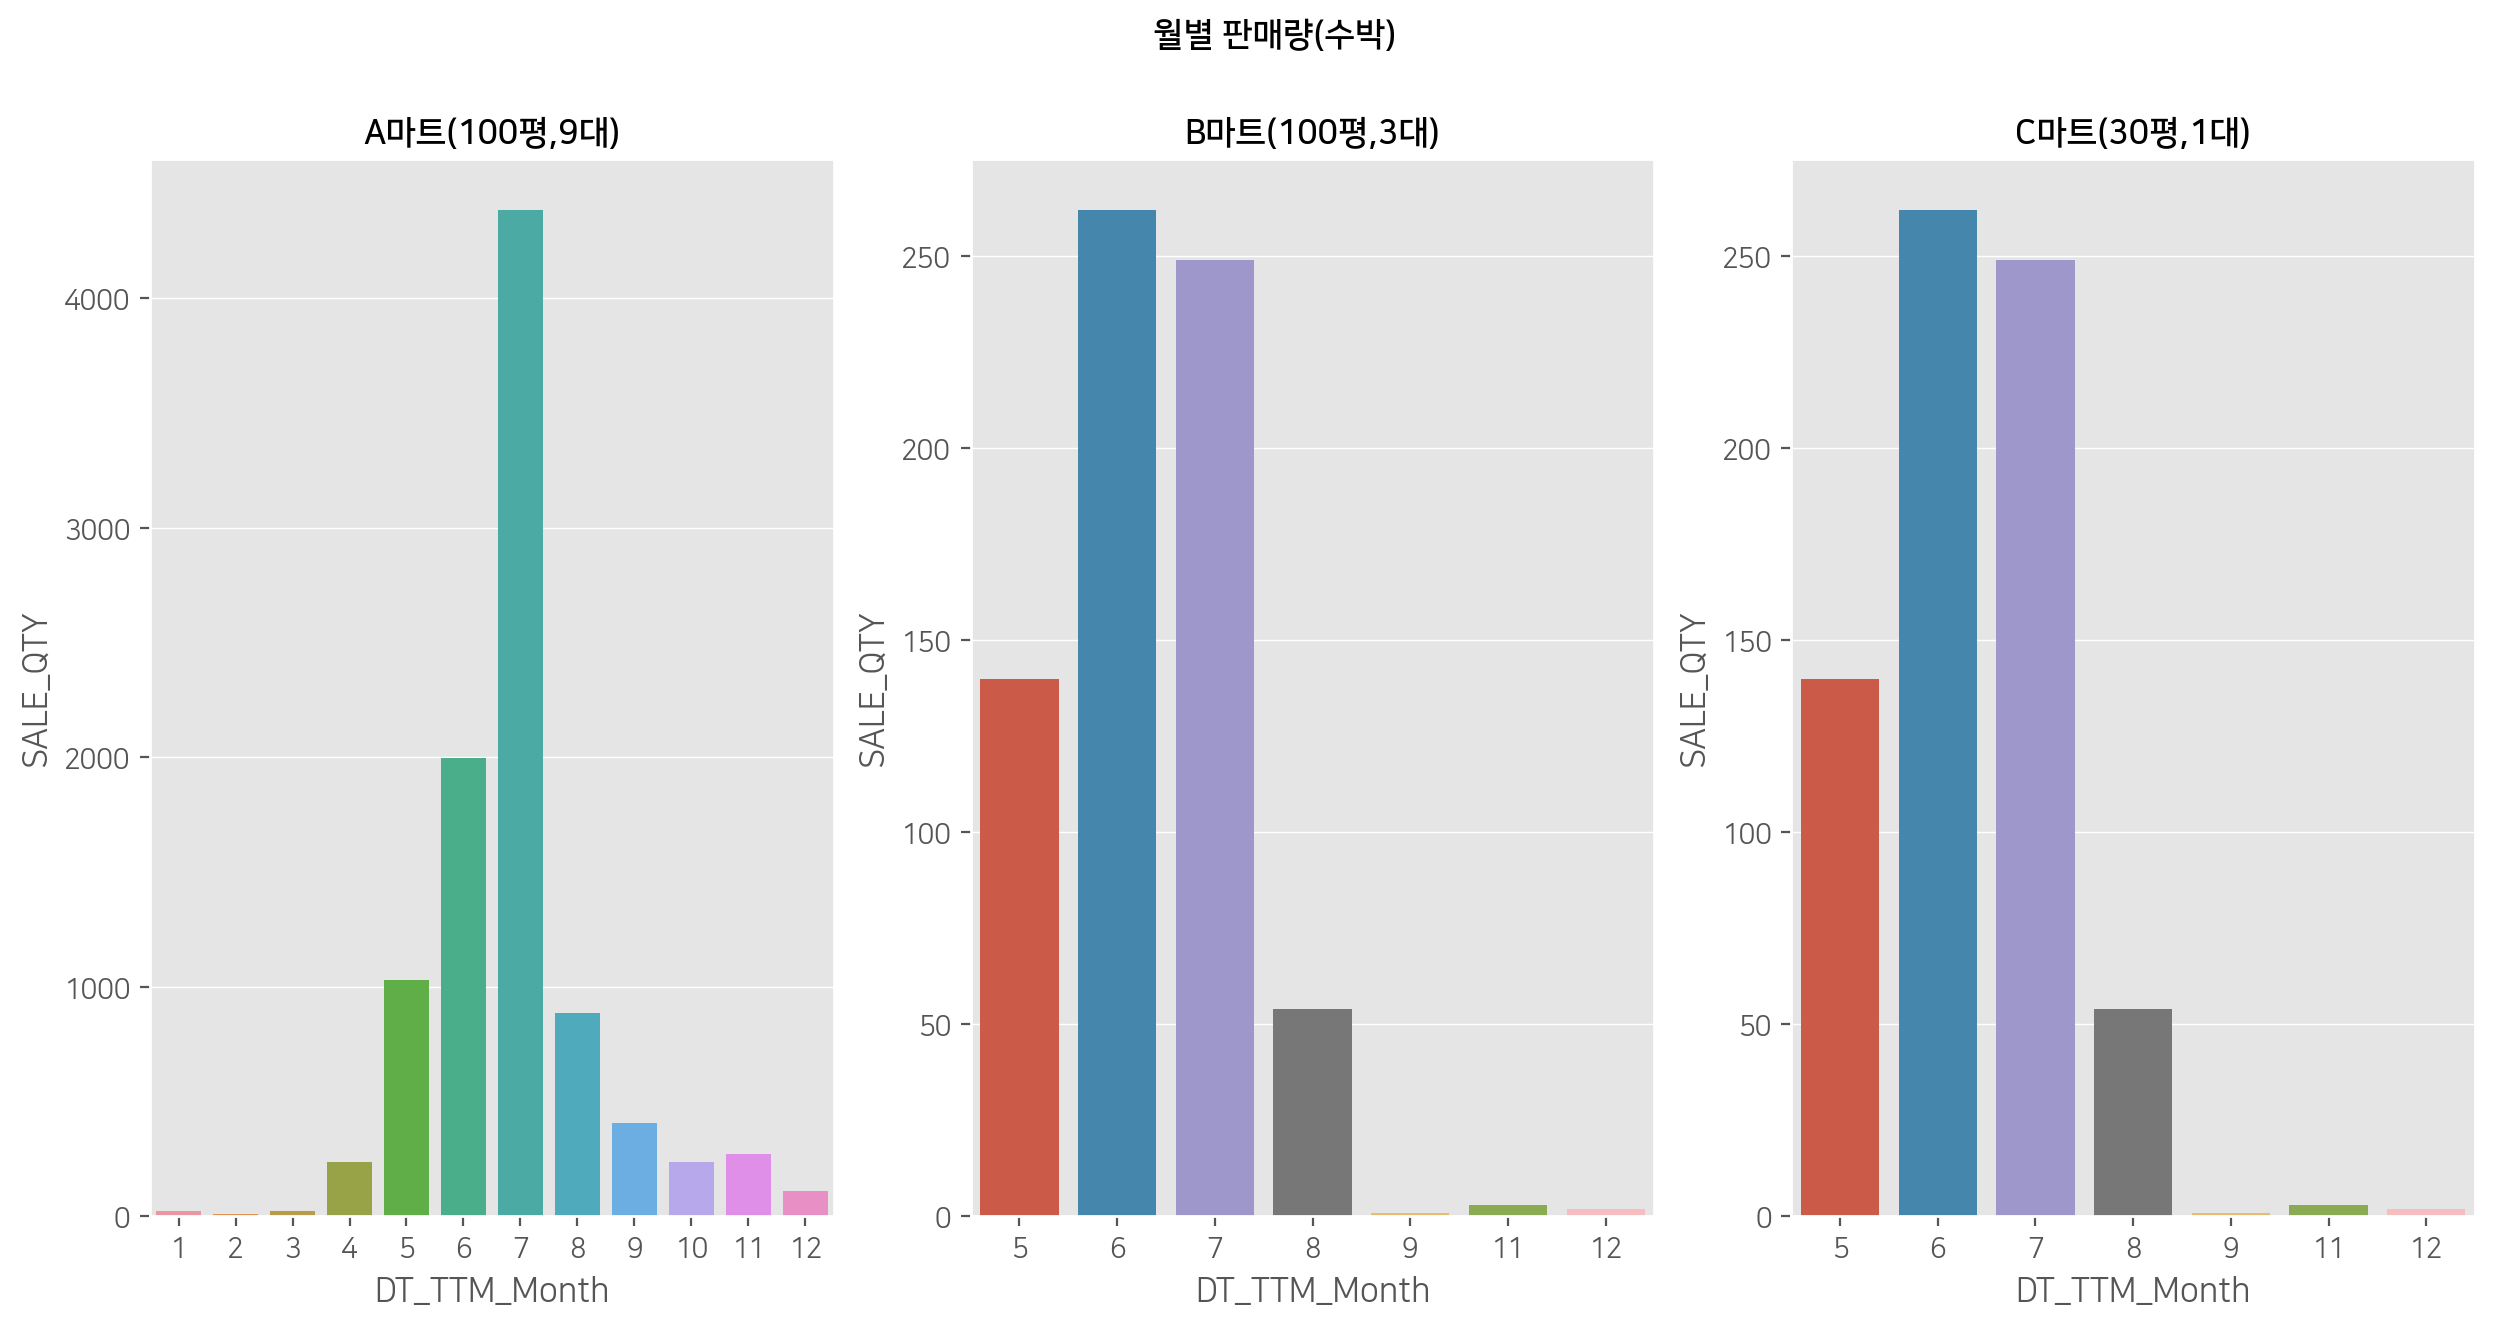

In [35]:
# Pivot Table
sb_group_month_a = pd.pivot_table(data=sb_a, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')
sb_group_month_b = pd.pivot_table(data=sb_b, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')
sb_group_month_c = pd.pivot_table(data=sb_c, index='DT_TTM_Month', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('월별 판매량(수박)', fontweight='bold', size = 12)

plt.subplot(131)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
sns.barplot(x=sb_group_month_a.index, y=sb_group_month_a['SALE_QTY'])

plt.subplot(132)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
sns.barplot(x=sb_group_month_b.index, y=sb_group_month_b['SALE_QTY'])

plt.subplot(133)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
sns.barplot(x=sb_group_month_b.index, y=sb_group_month_b['SALE_QTY'])

plt.show()

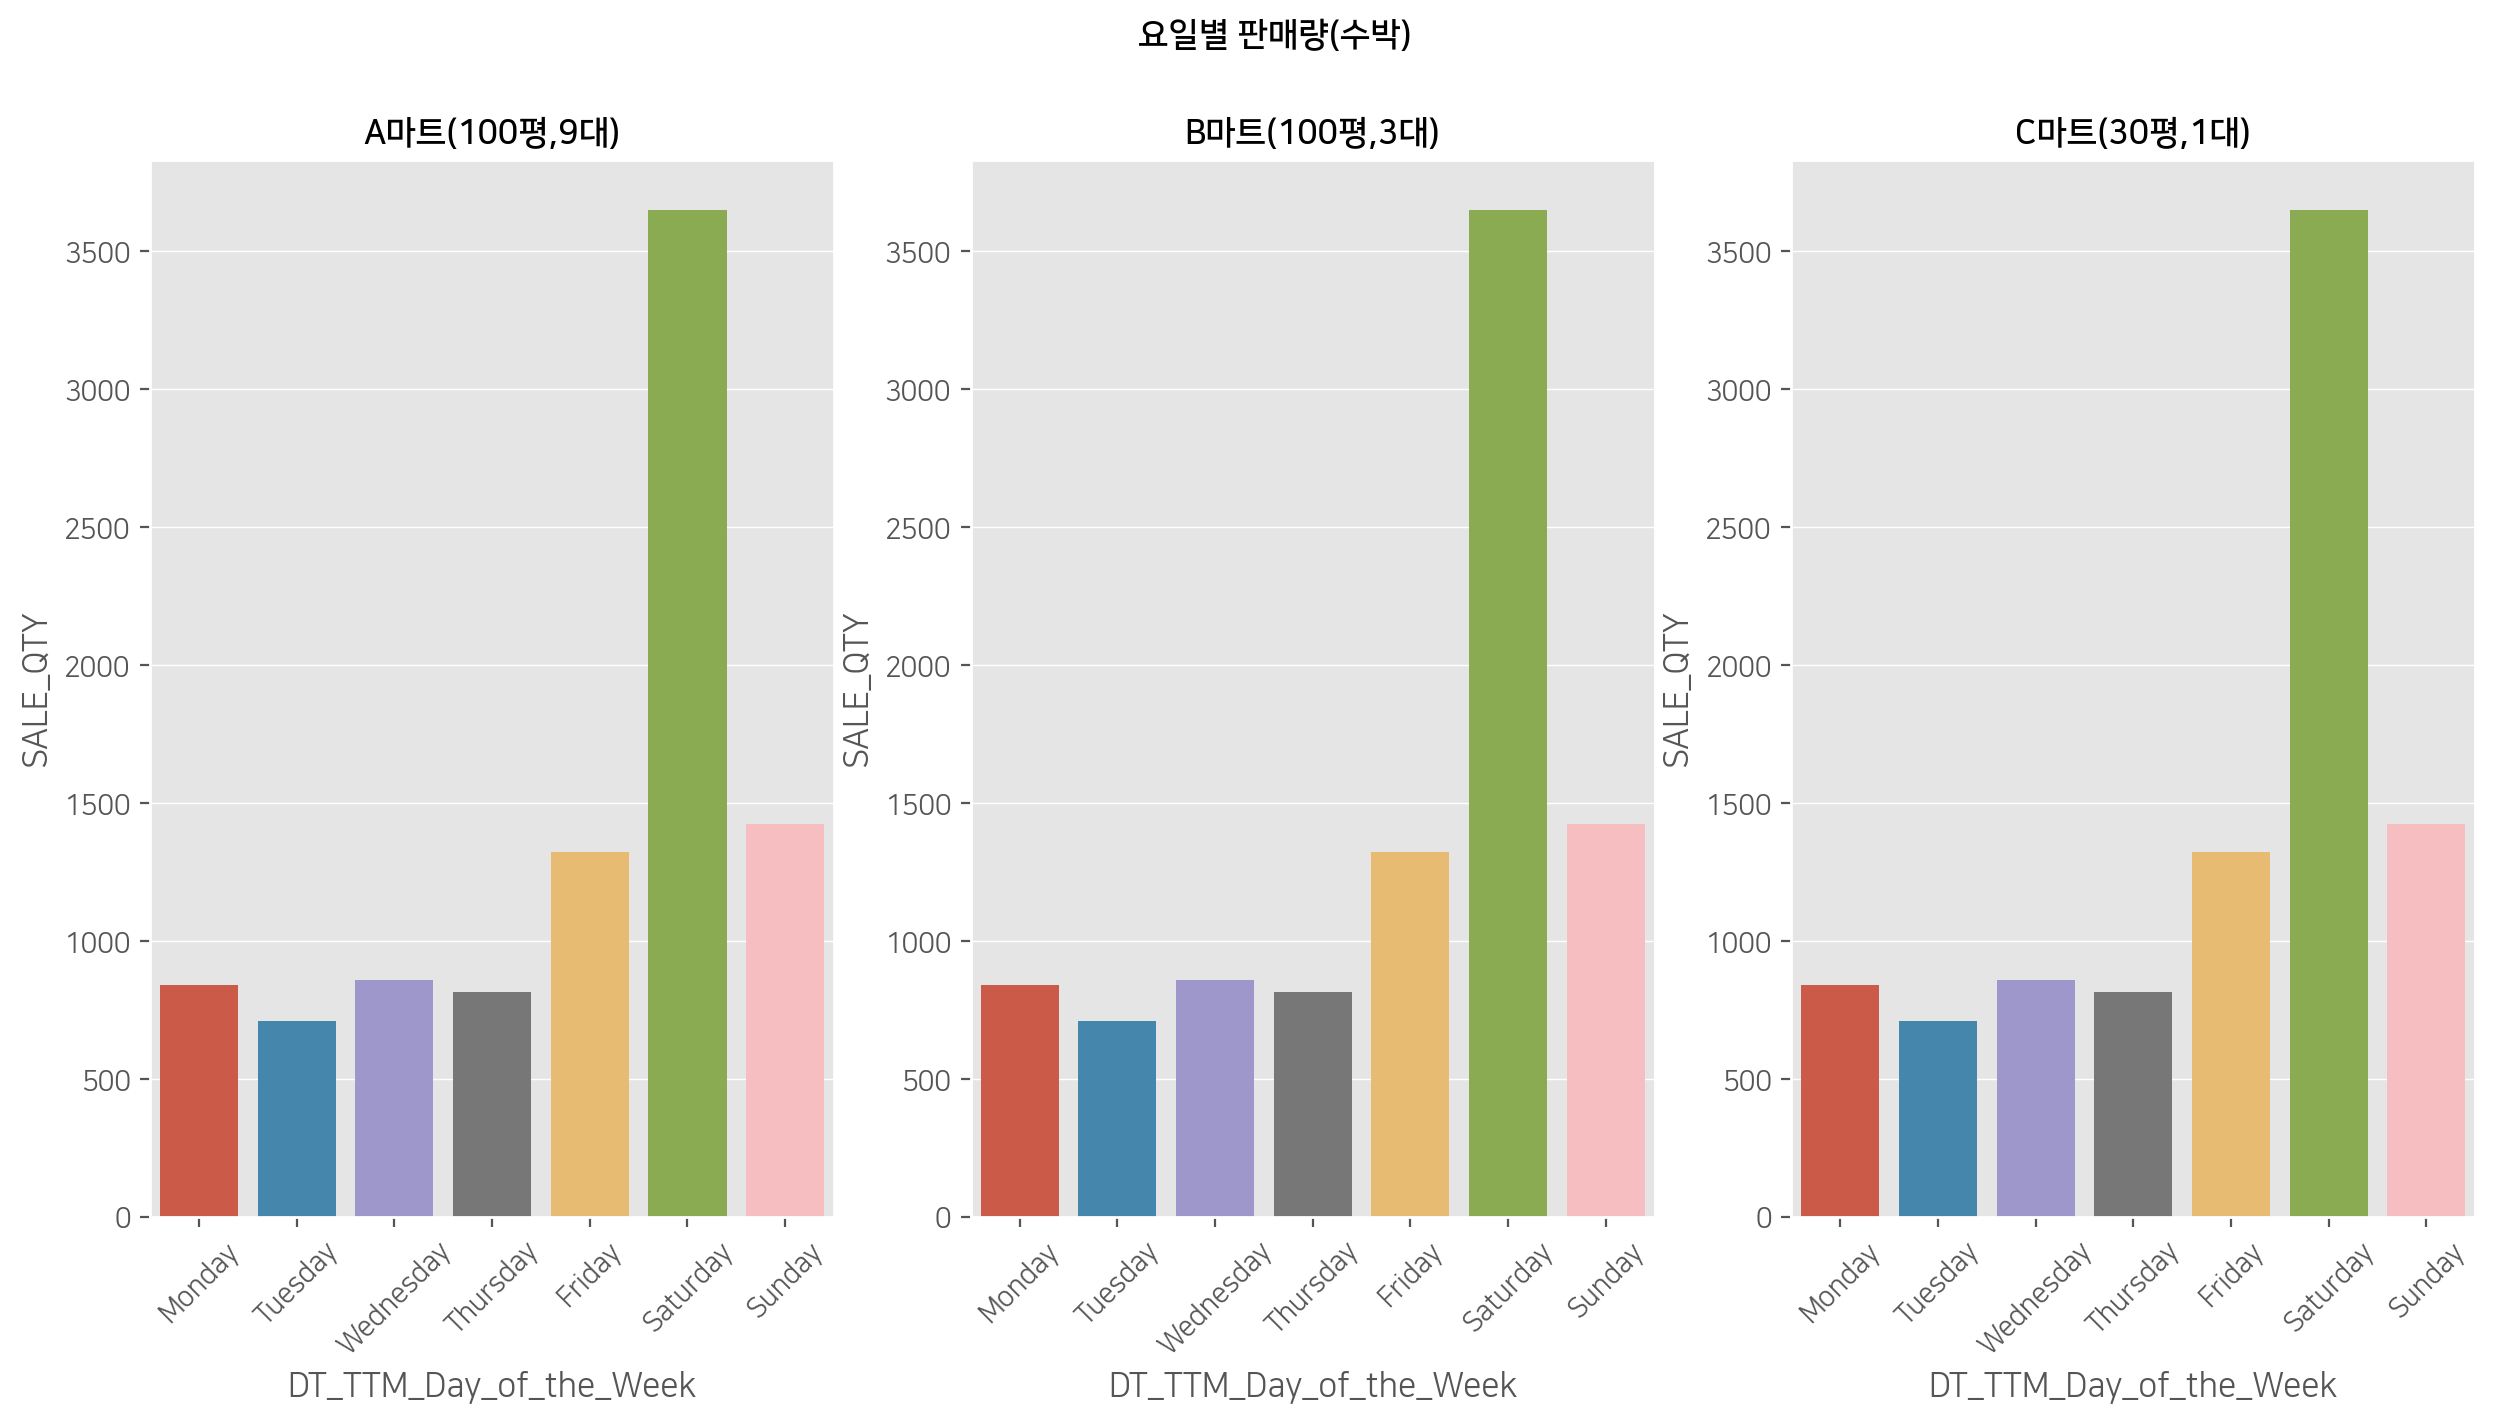

In [36]:
# Pivot Table
sb_group_dw_a = pd.pivot_table(data=sb_a, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')
sb_group_dw_b = pd.pivot_table(data=sb_b, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')
sb_group_dw_c = pd.pivot_table(data=sb_c, index='DT_TTM_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('요일별 판매량(수박)', fontweight='bold', size = 12)

plt.subplot(131)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.barplot(x=sb_group_dw_a.index, y=sb_group_dw_a['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.subplot(132)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.barplot(x=sb_group_dw_a.index, y=sb_group_dw_a['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.subplot(133)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.barplot(x=sb_group_dw_a.index, y=sb_group_dw_a['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.show()

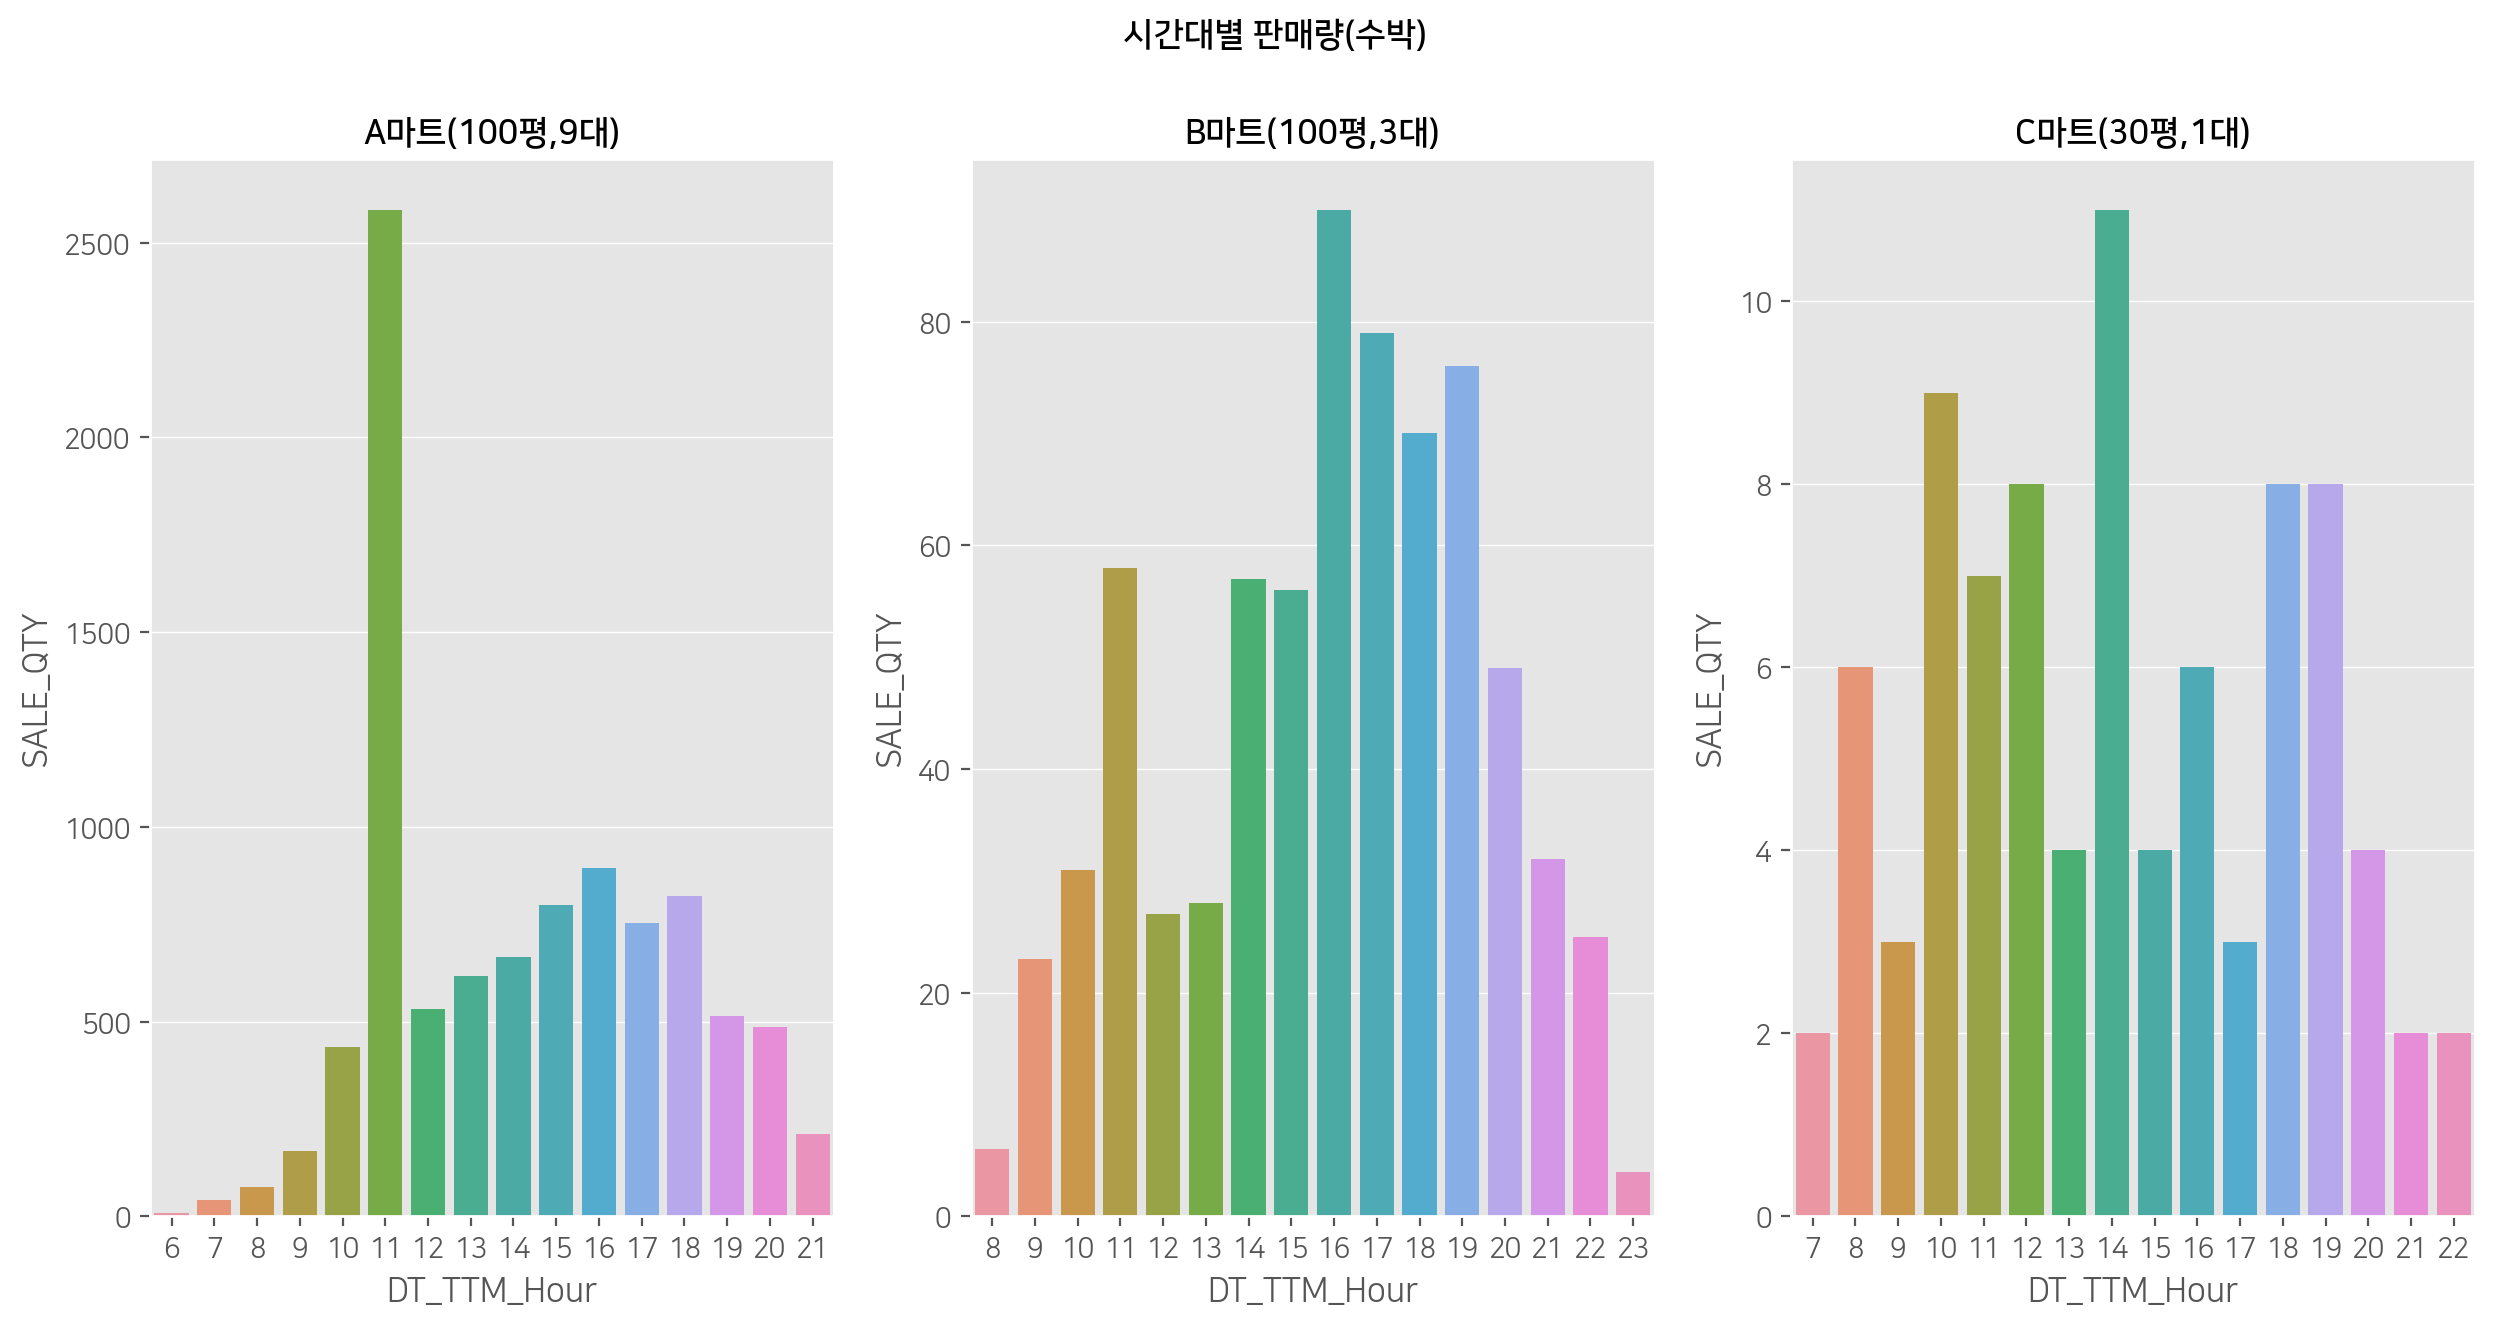

In [37]:
# Pivot Table
sb_group_hour_a = pd.pivot_table(data=sb_a, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')
sb_group_hour_b = pd.pivot_table(data=sb_b, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')
sb_group_hour_c = pd.pivot_table(data=sb_c, index='DT_TTM_Hour', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('시간대별 판매량(수박)', fontweight='bold', size = 12)

plt.subplot(131)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
sns.barplot(x=sb_group_hour_a.index, y=sb_group_hour_a['SALE_QTY'])

plt.subplot(132)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
sns.barplot(x=sb_group_hour_b.index, y=sb_group_hour_b['SALE_QTY'])

plt.subplot(133)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
sns.barplot(x=sb_group_hour_c.index, y=sb_group_hour_c['SALE_QTY'])

plt.show()

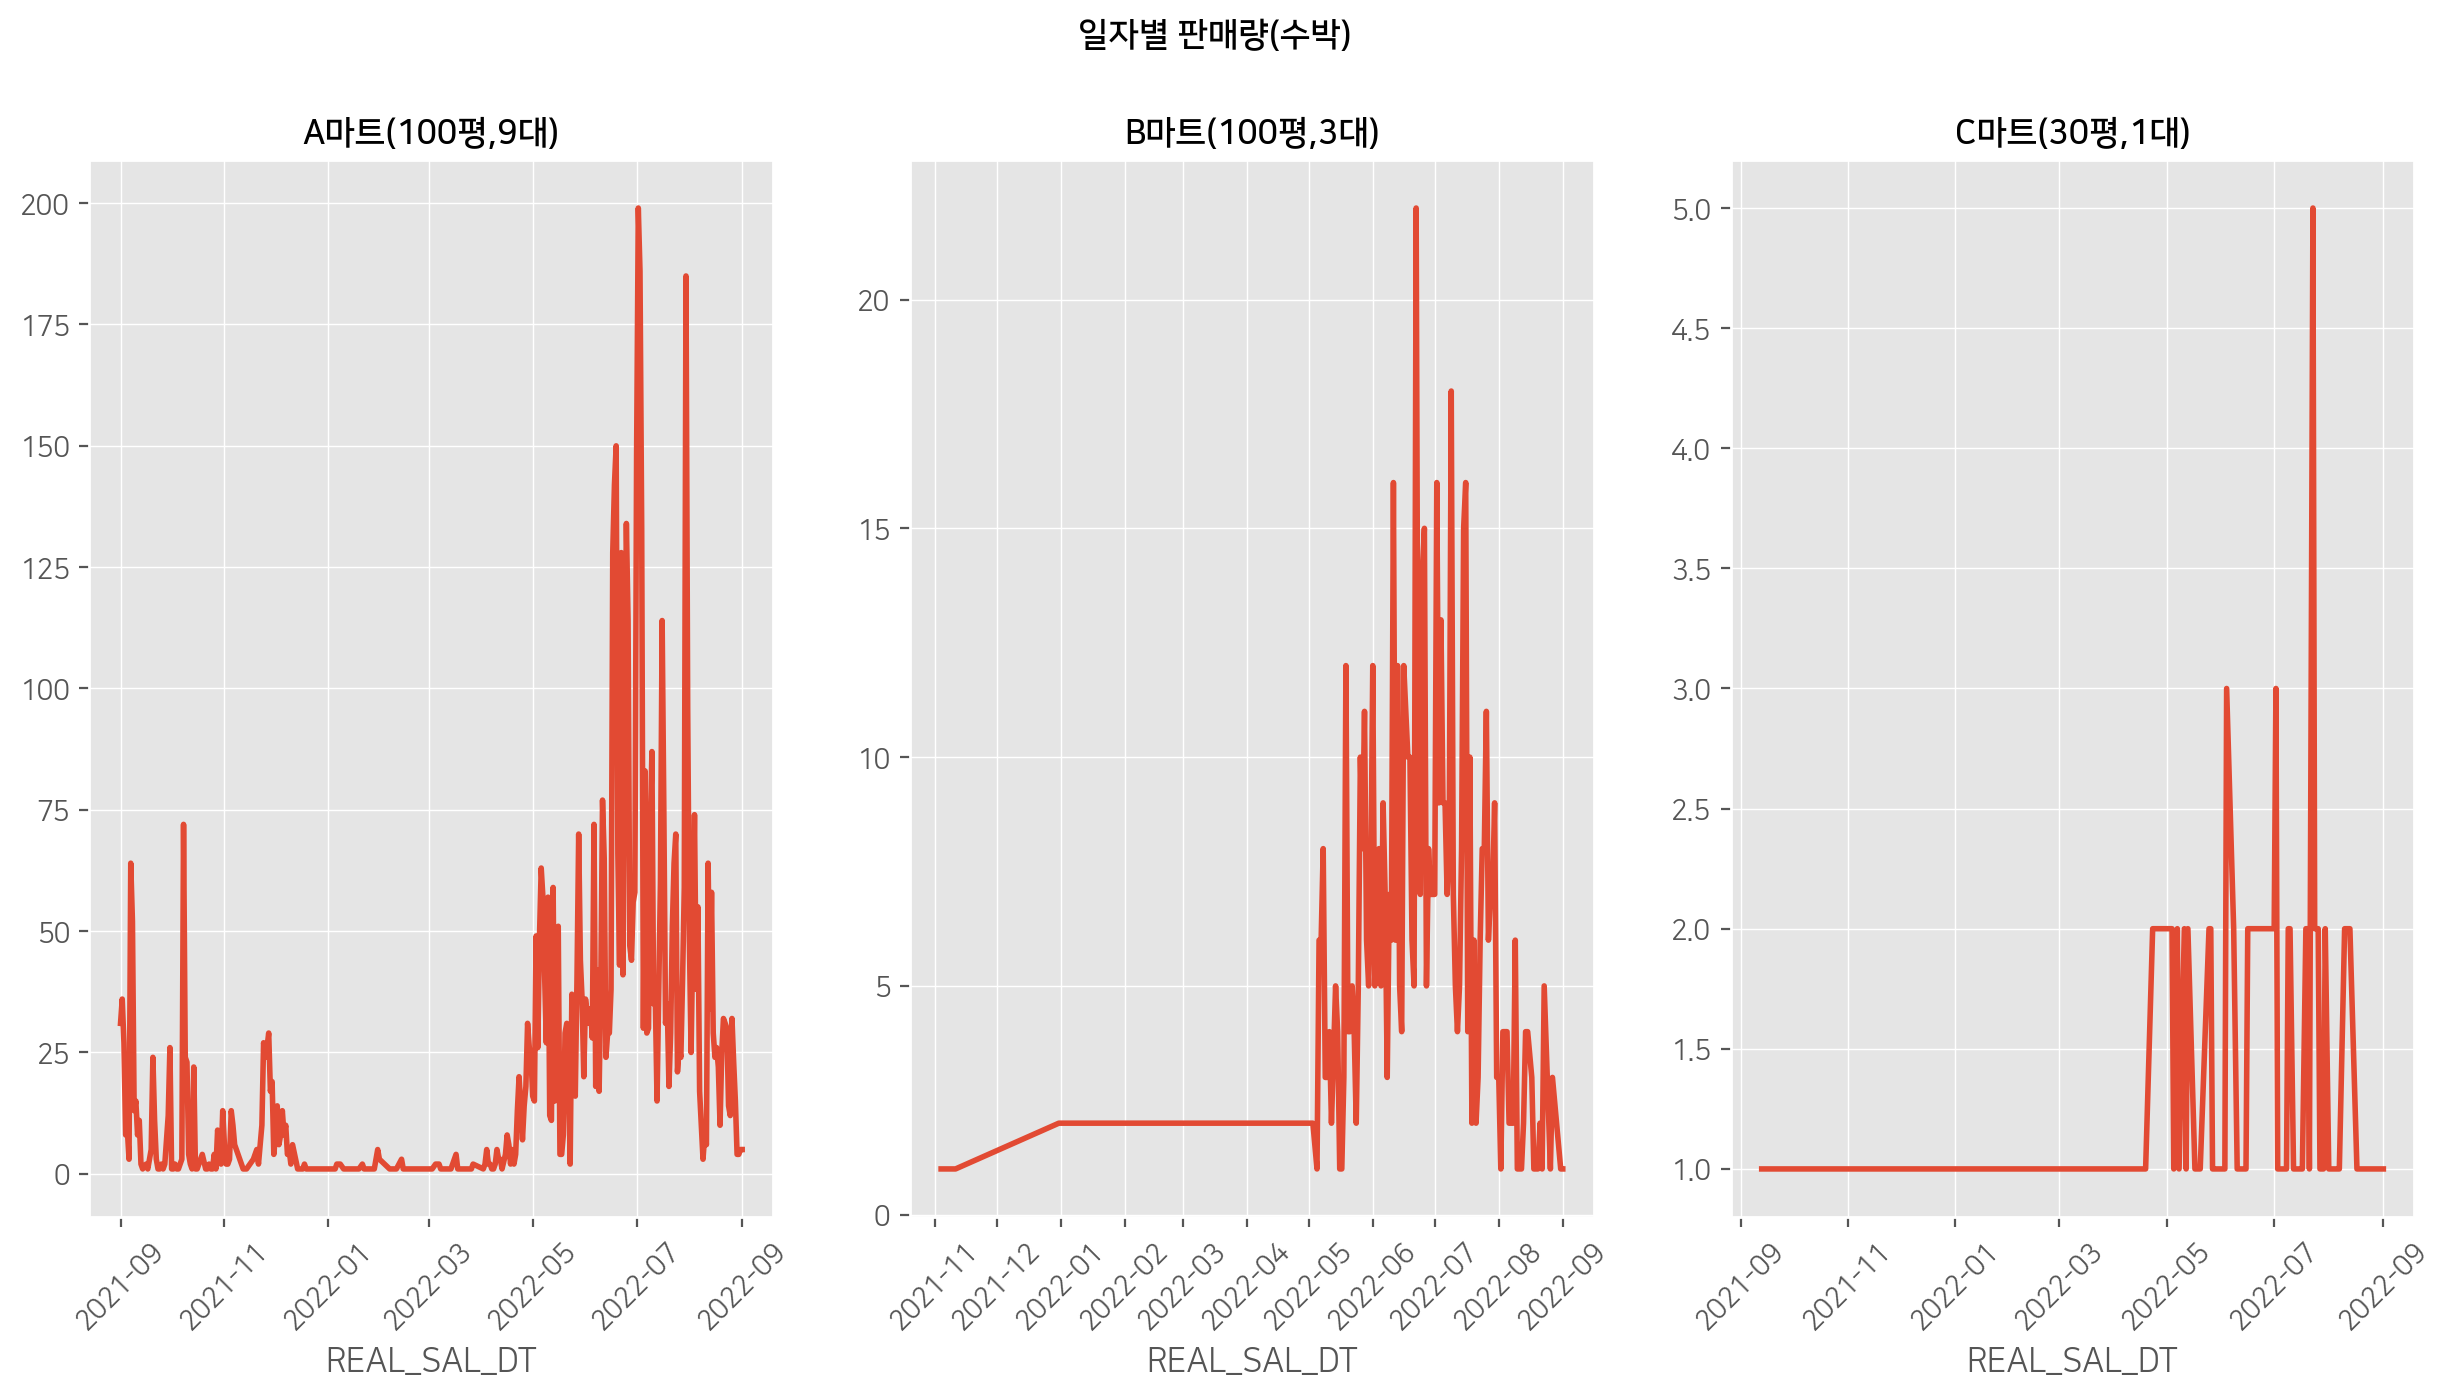

In [38]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일자별 판매량(수박)', fontweight='bold', size = 12)

plt.subplot(131)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(x=a.index, y=a.values, estimator=sum)

plt.subplot(132)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(x=b.index, y=b.values, estimator=sum)

plt.subplot(133)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(x=c.index, y=c.values, estimator=sum)

plt.show()

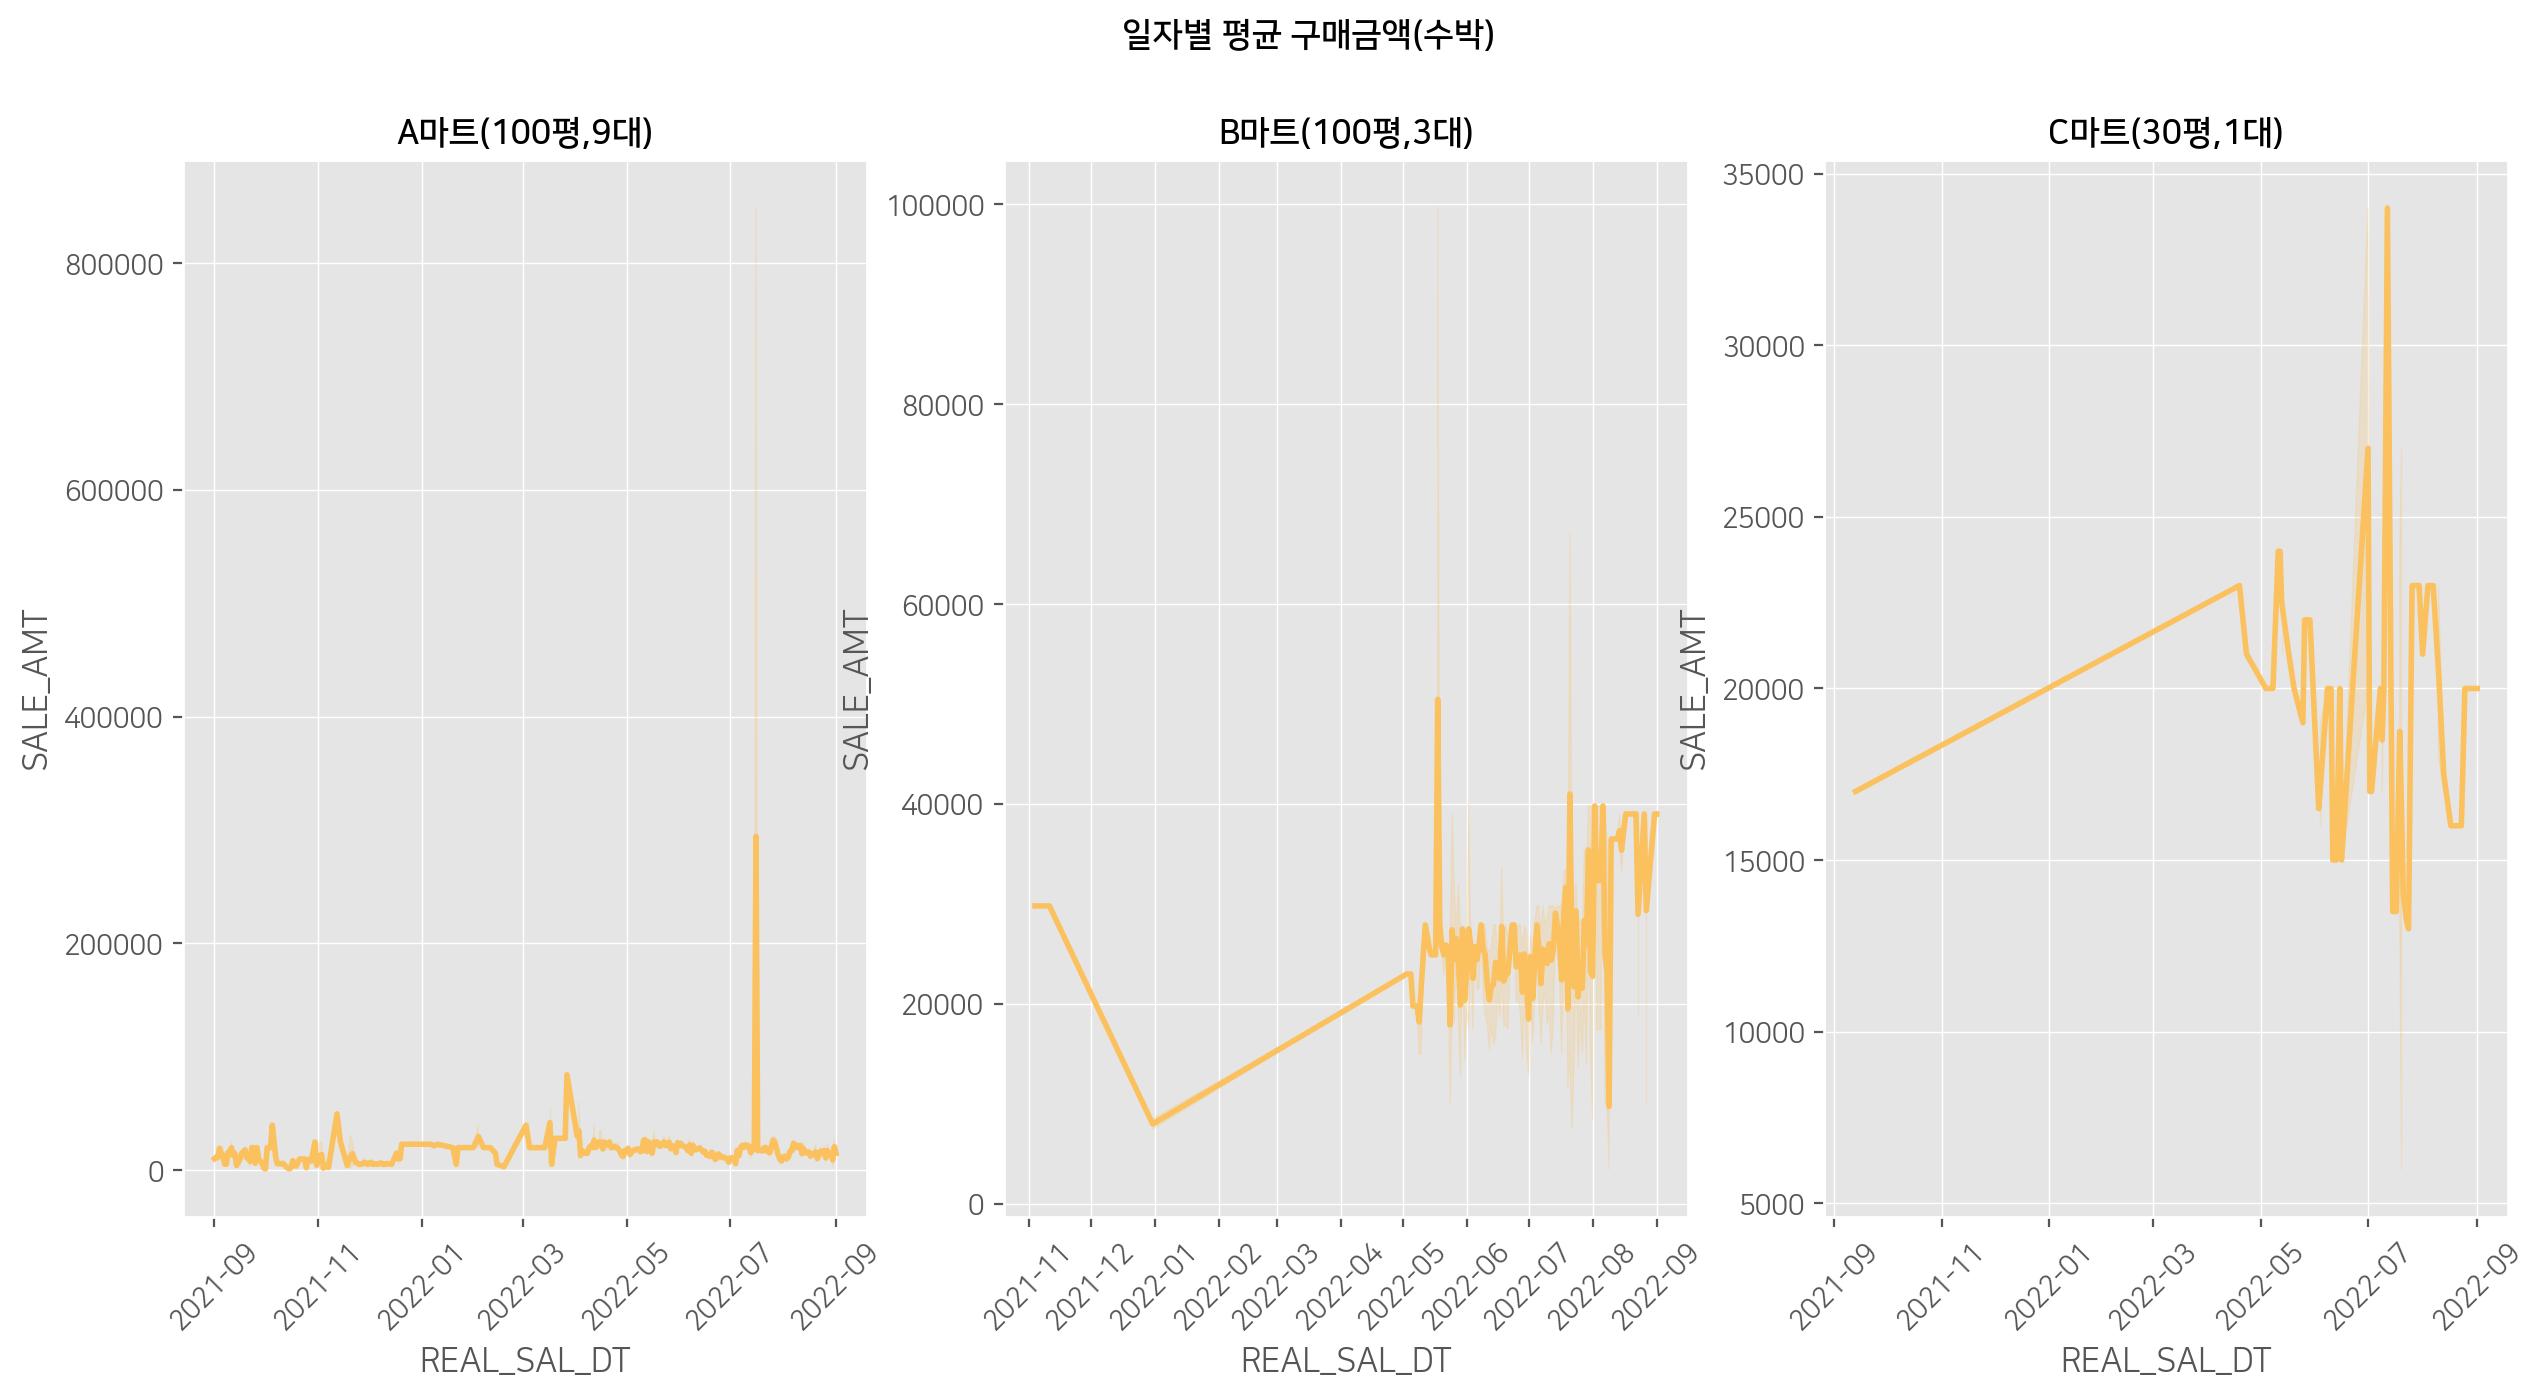

In [39]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일자별 평균 구매금액(수박)', fontweight='bold', size = 12)

plt.subplot(131)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_a, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.subplot(132)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_b, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.subplot(133)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_c, x='REAL_SAL_DT', y='SALE_AMT', color='C4') # 일자별 구매금액의 평균이 계산됨

plt.show()

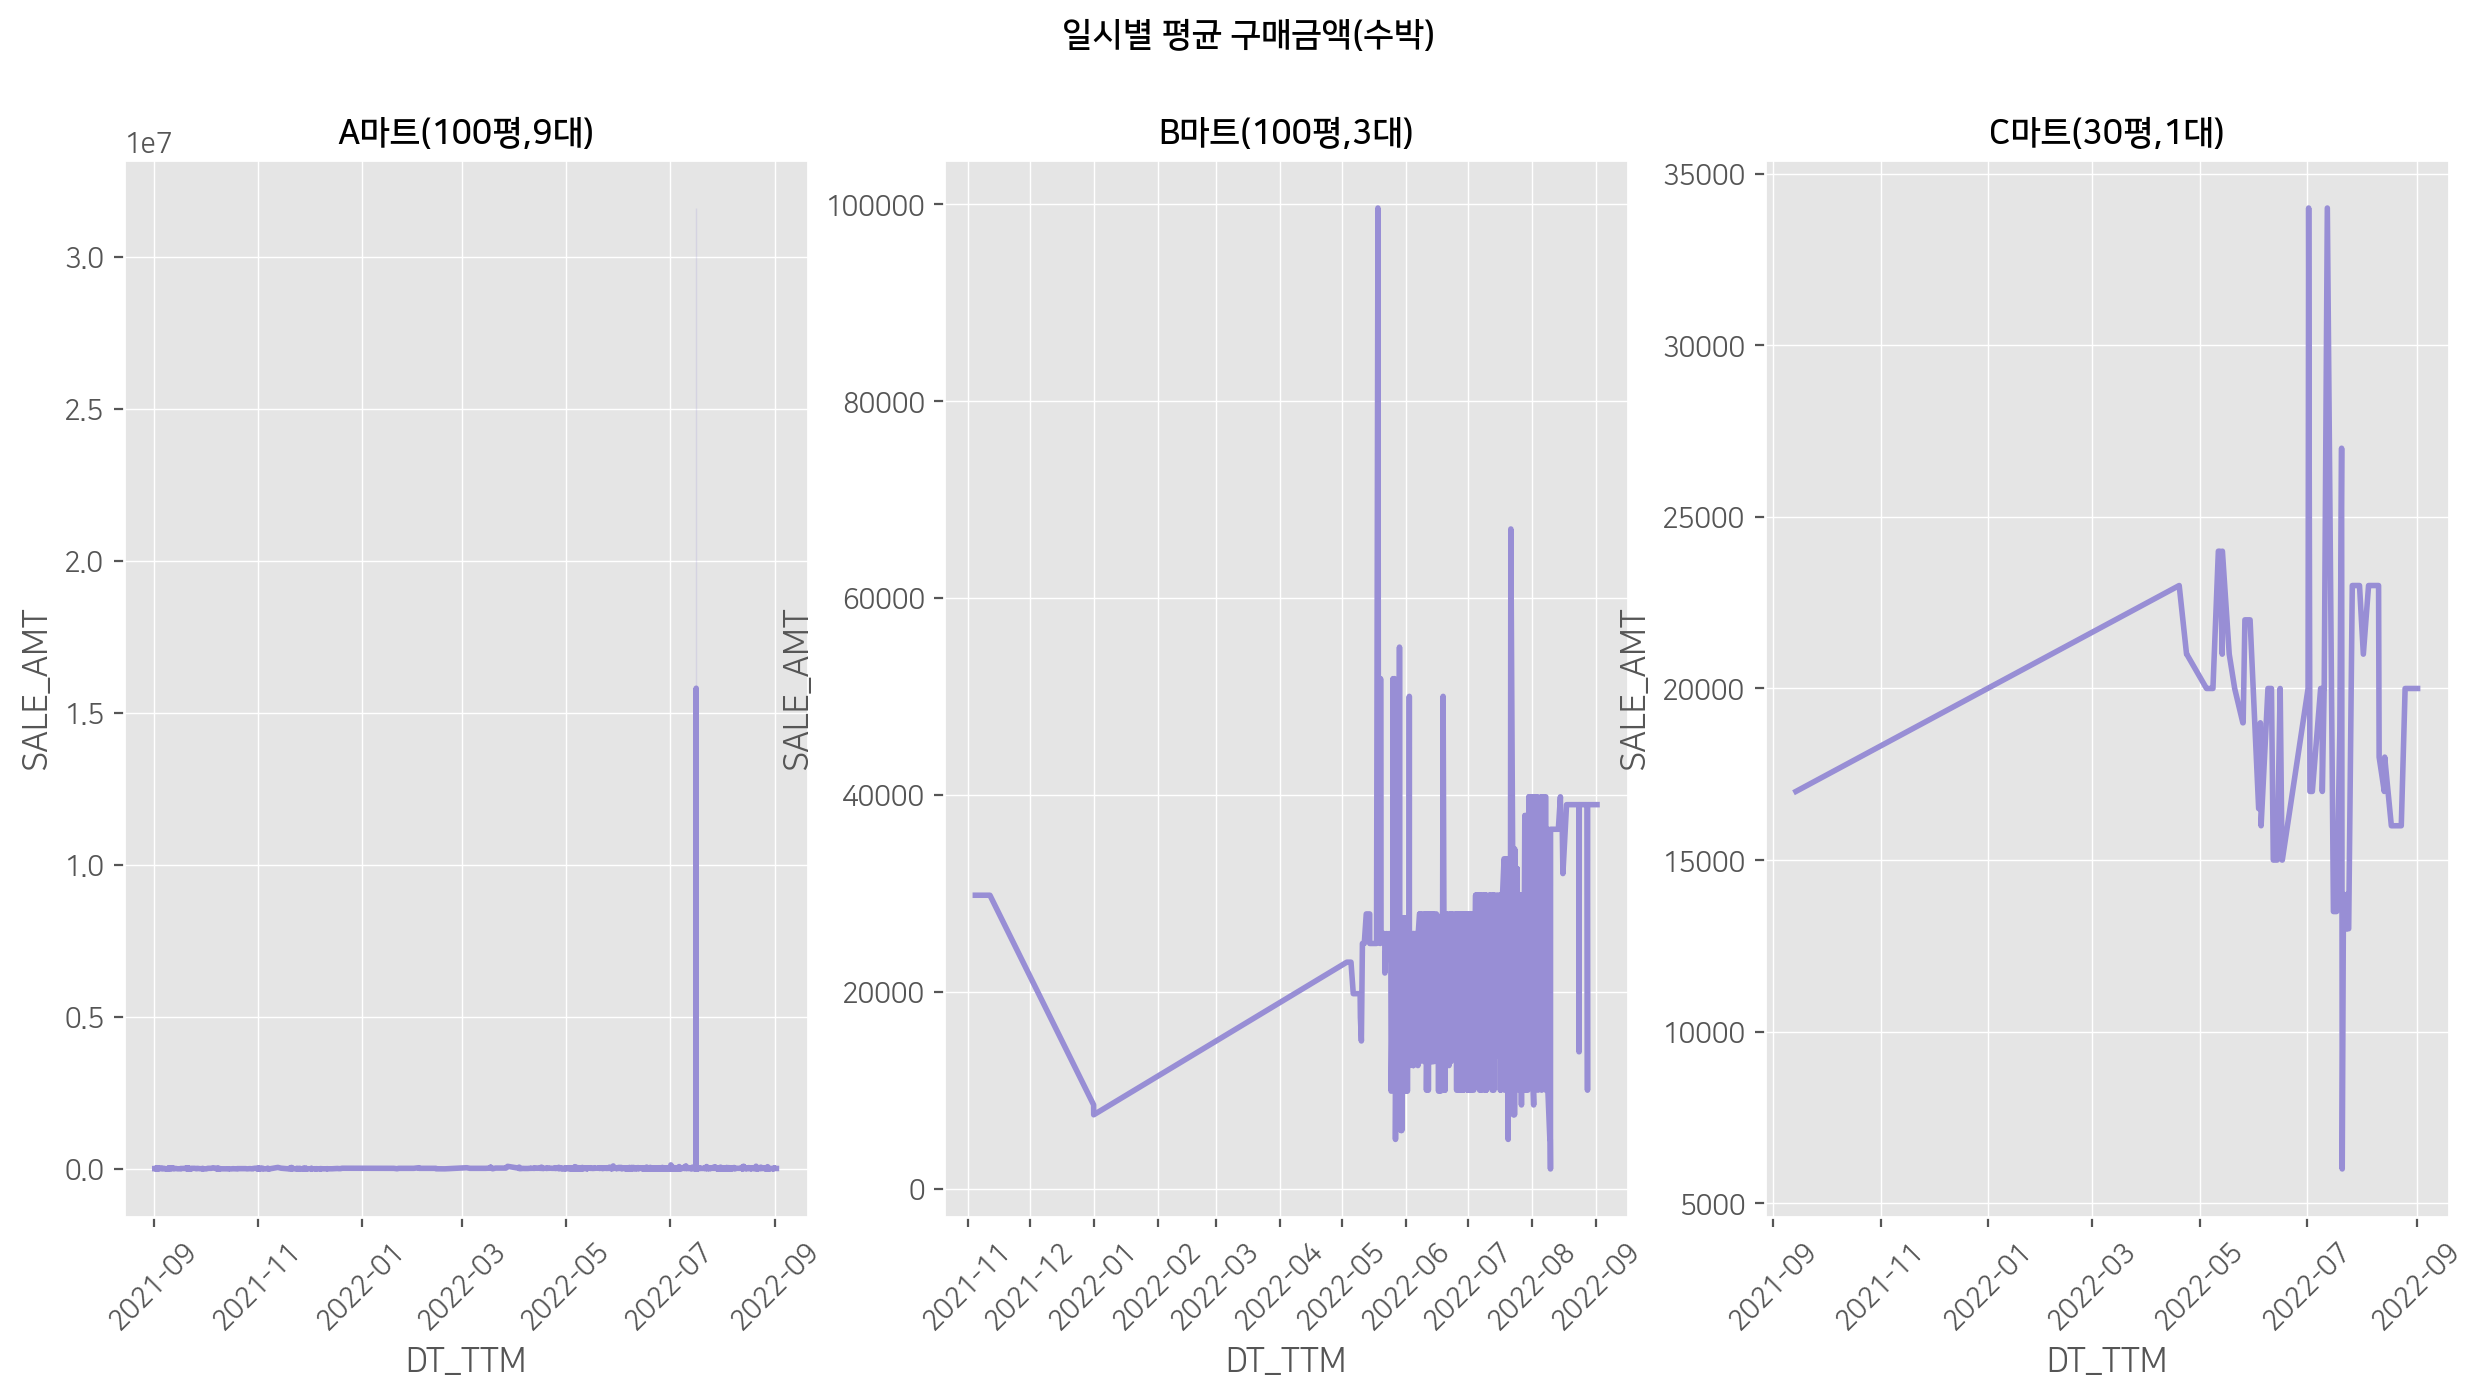

In [40]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일시별 평균 구매금액(수박)', fontweight='bold', size = 12)

plt.subplot(131)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_a, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.subplot(132)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_b, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.subplot(133)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_c, x='DT_TTM', y='SALE_AMT', color='C2') # 일시별 구매금액의 평균이 계산됨

plt.show()

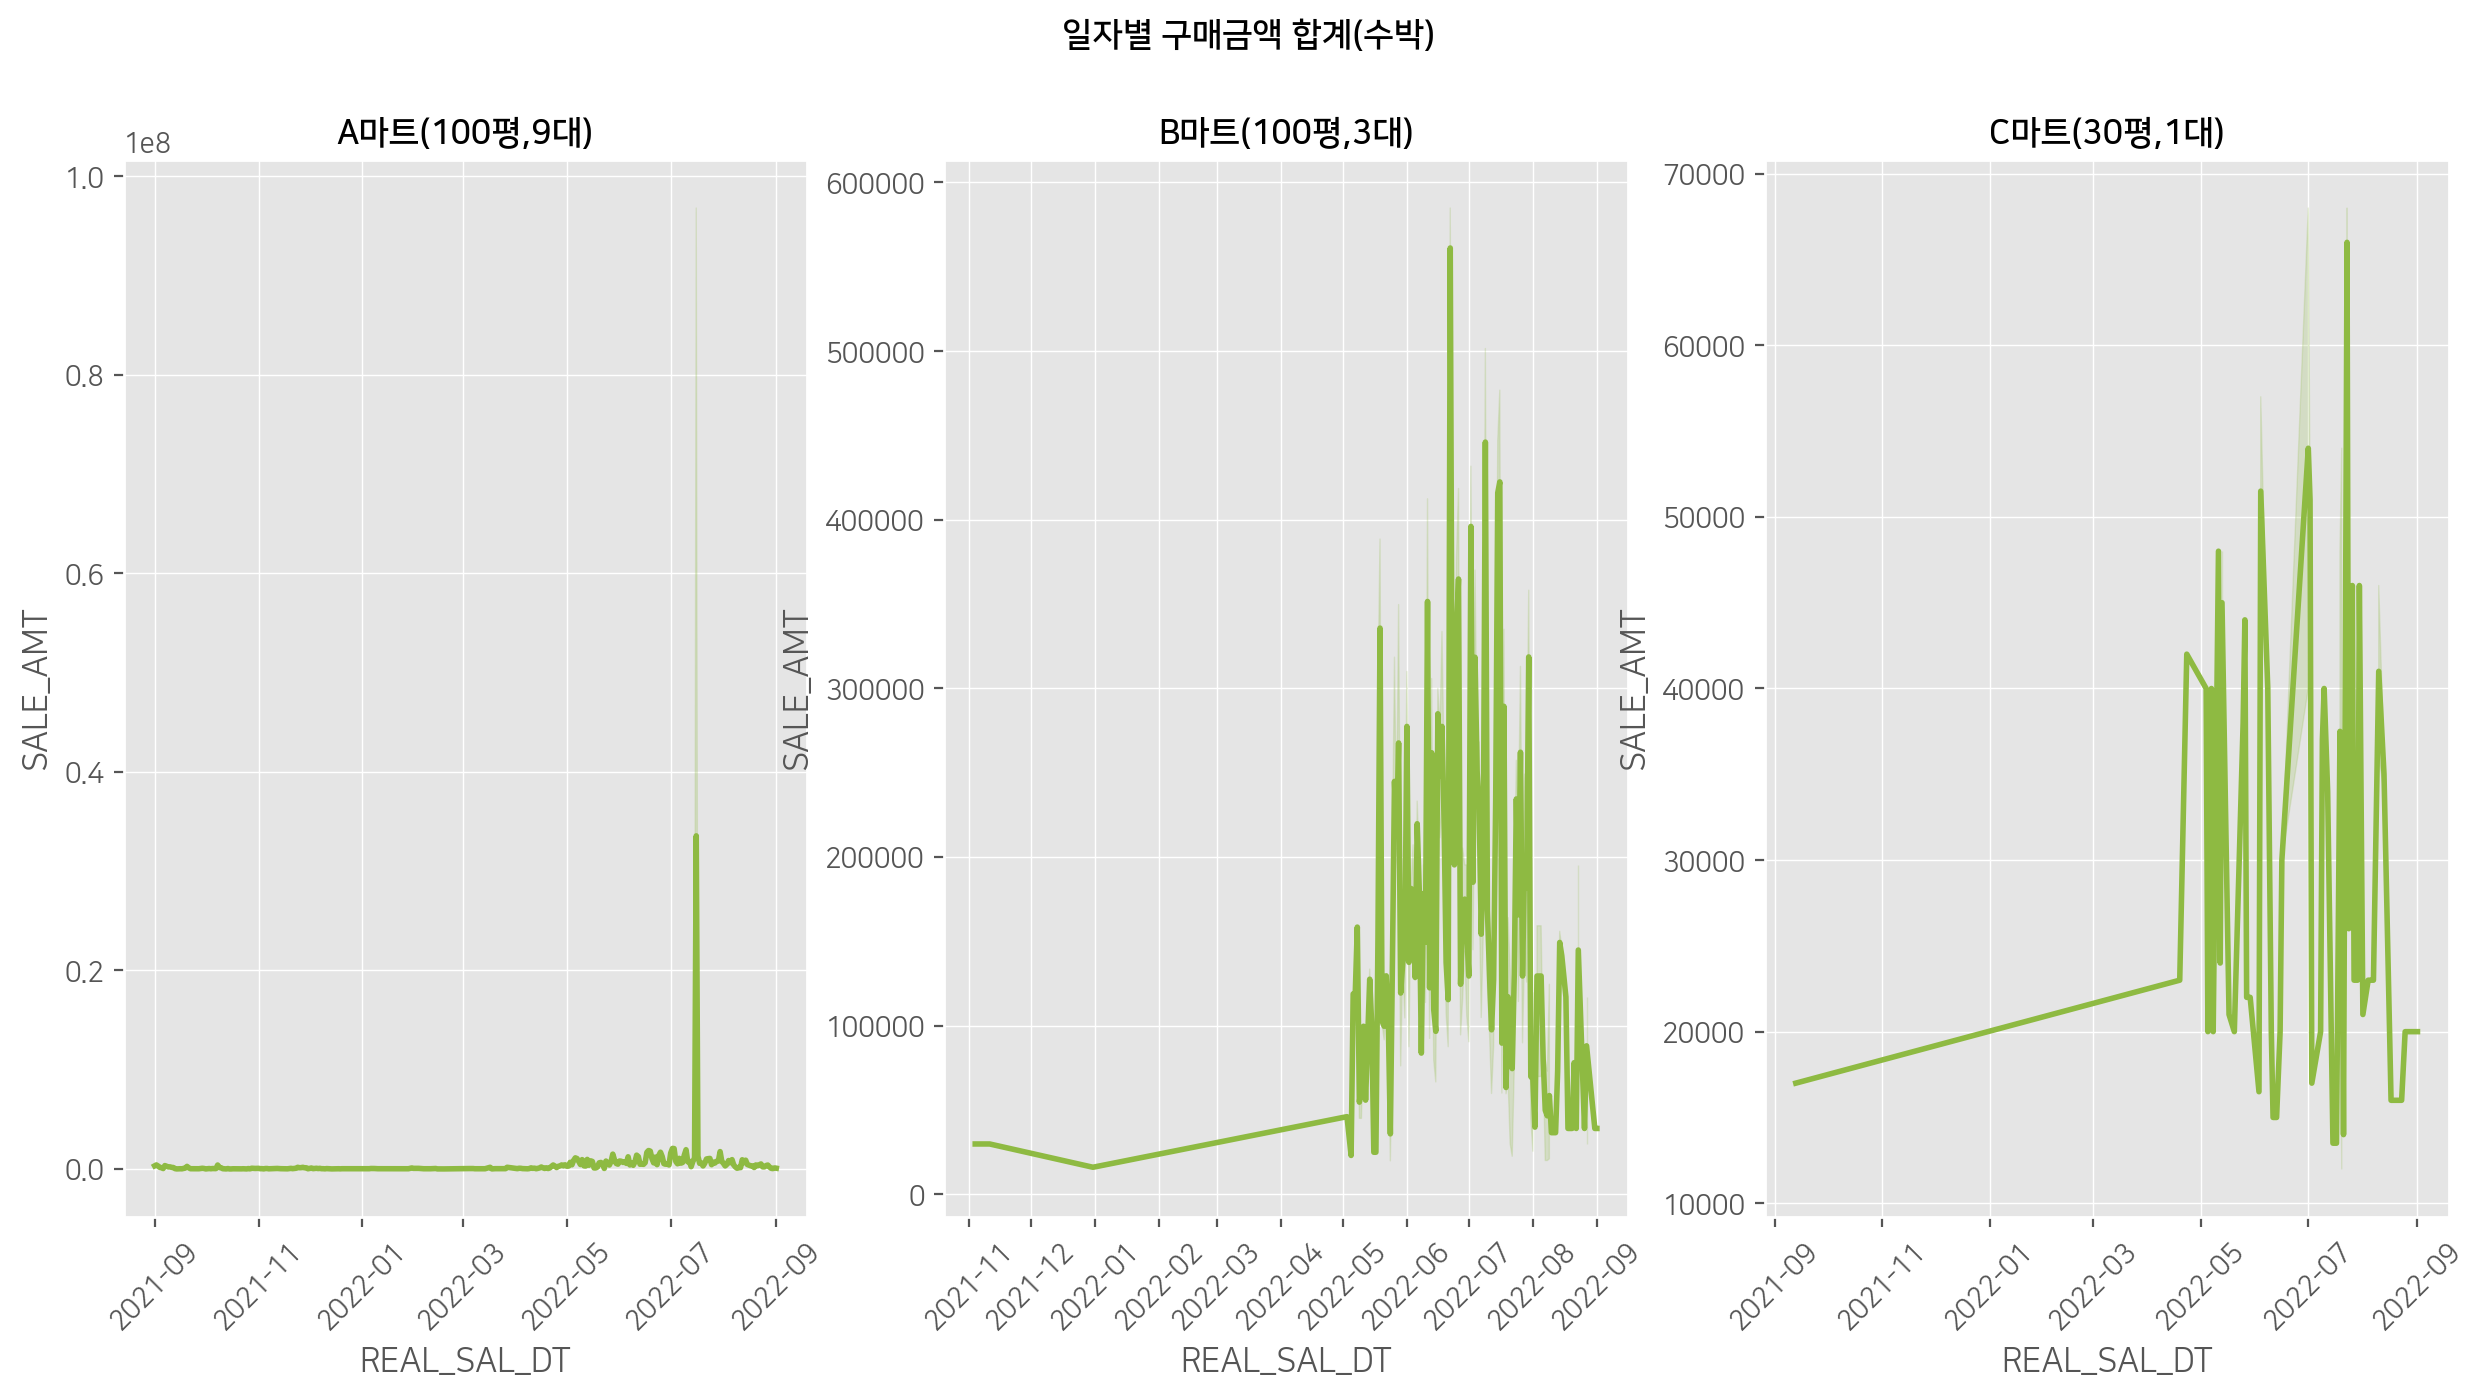

In [41]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일자별 구매금액 합계(수박)', fontweight='bold', size = 12)

plt.subplot(131)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_a, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.subplot(132)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_b, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.subplot(133)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_c, x='REAL_SAL_DT', y='SALE_AMT', estimator=sum, color='C5') # 일자별 구매금액의 합이 계산됨

plt.show()

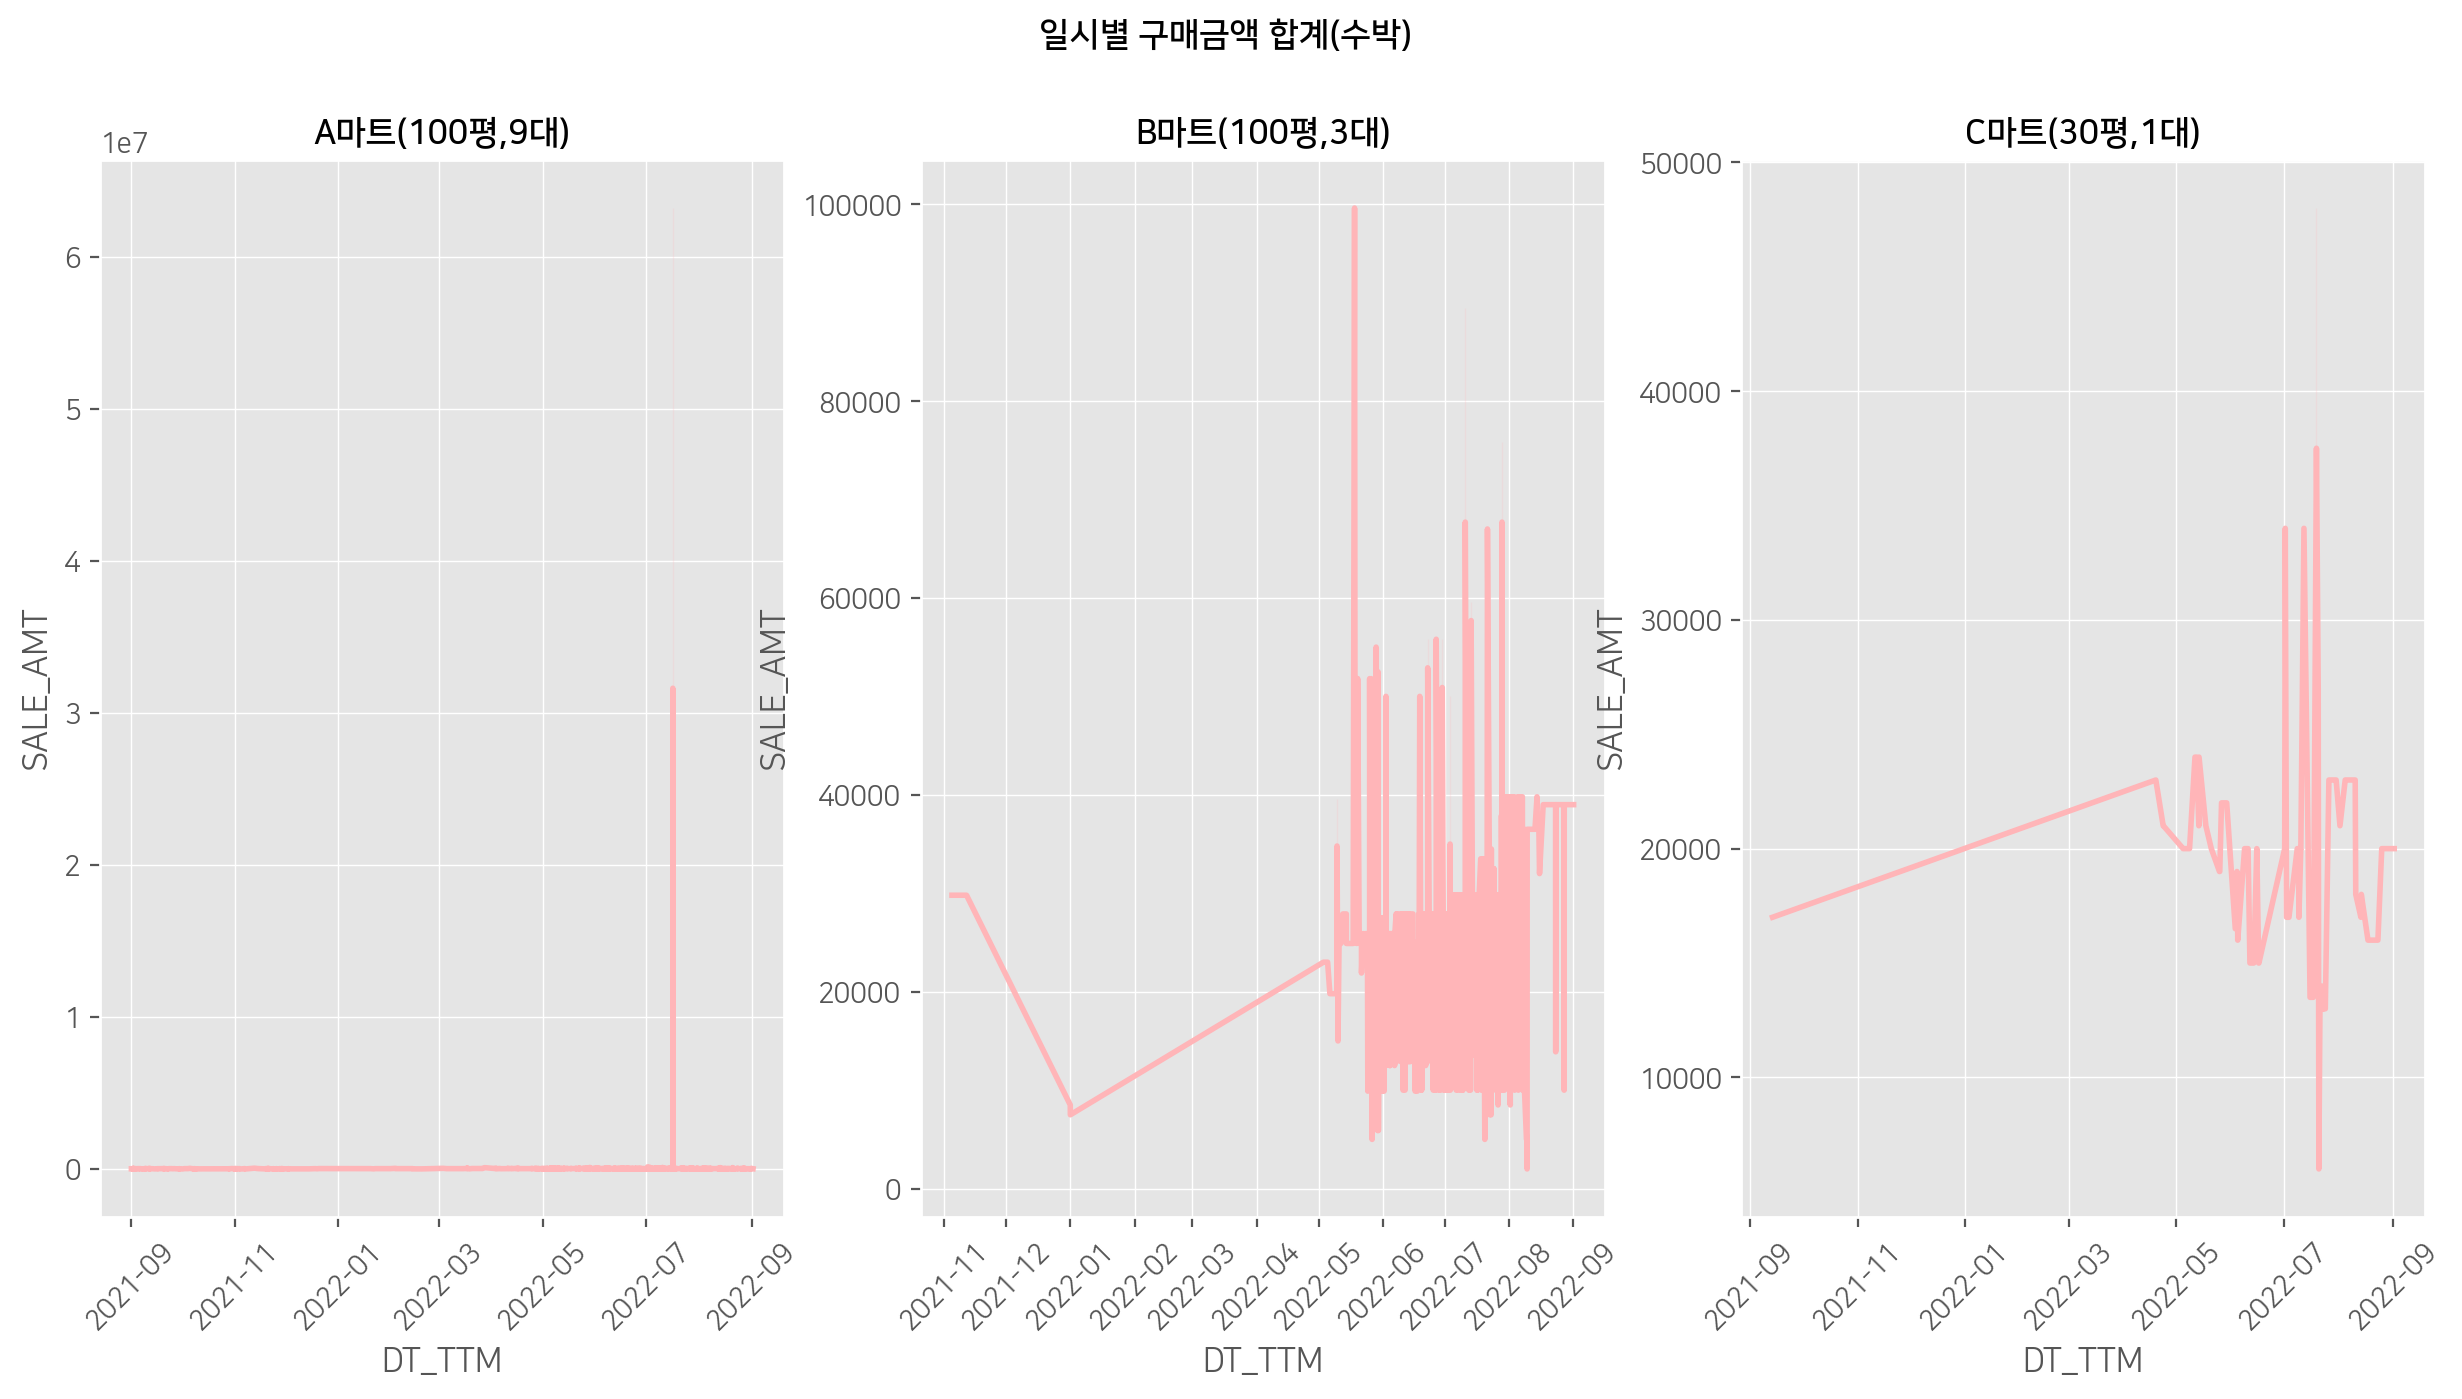

In [42]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('일시별 구매금액 합계(수박)', fontweight='bold', size = 12)

plt.subplot(131)
plt.title('A마트(100평,9대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_a, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.subplot(132)
plt.title('B마트(100평,3대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_b, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.subplot(133)
plt.title('C마트(30평,1대)', fontweight='bold', size = 12)
plt.xticks(rotation='45')
sns.lineplot(data=sb_c, x='DT_TTM', y='SALE_AMT', estimator=sum, color='C6') # 일시별 구매금액의 합이 계산됨

plt.show()

# Additional Analysis

## Time-Series Decomposition

In [43]:
import statsmodels.tsa.api as tsa

from pylab import rcParams
rcParams['figure.figsize'] = (15, 10) # 그래프 사이즈 조절

In [44]:
# 수박 Data Load
sb_a = pd.read_csv(abcd_path + '/analysis/sb_a.csv', parse_dates=['REAL_SAL_DT'],index_col=0) # parse_dates: 특정 columns을 Datetime 형태로 Load
sb_b = pd.read_csv(abcd_path + '/analysis/sb_b.csv', parse_dates=['REAL_SAL_DT'],index_col=0)
sb_c = pd.read_csv(abcd_path + '/analysis/sb_c.csv', parse_dates=['REAL_SAL_DT'],index_col=0)

# 일자별로 판매량 집계
sb_pivot_a = pd.pivot_table(data=sb_a, index='REAL_SAL_DT', values='SALE_QTY', aggfunc='sum')
sb_pivot_b = pd.pivot_table(data=sb_b, index='REAL_SAL_DT', values='SALE_QTY', aggfunc='sum')
sb_pivot_c = pd.pivot_table(data=sb_c, index='REAL_SAL_DT', values='SALE_QTY', aggfunc='sum')

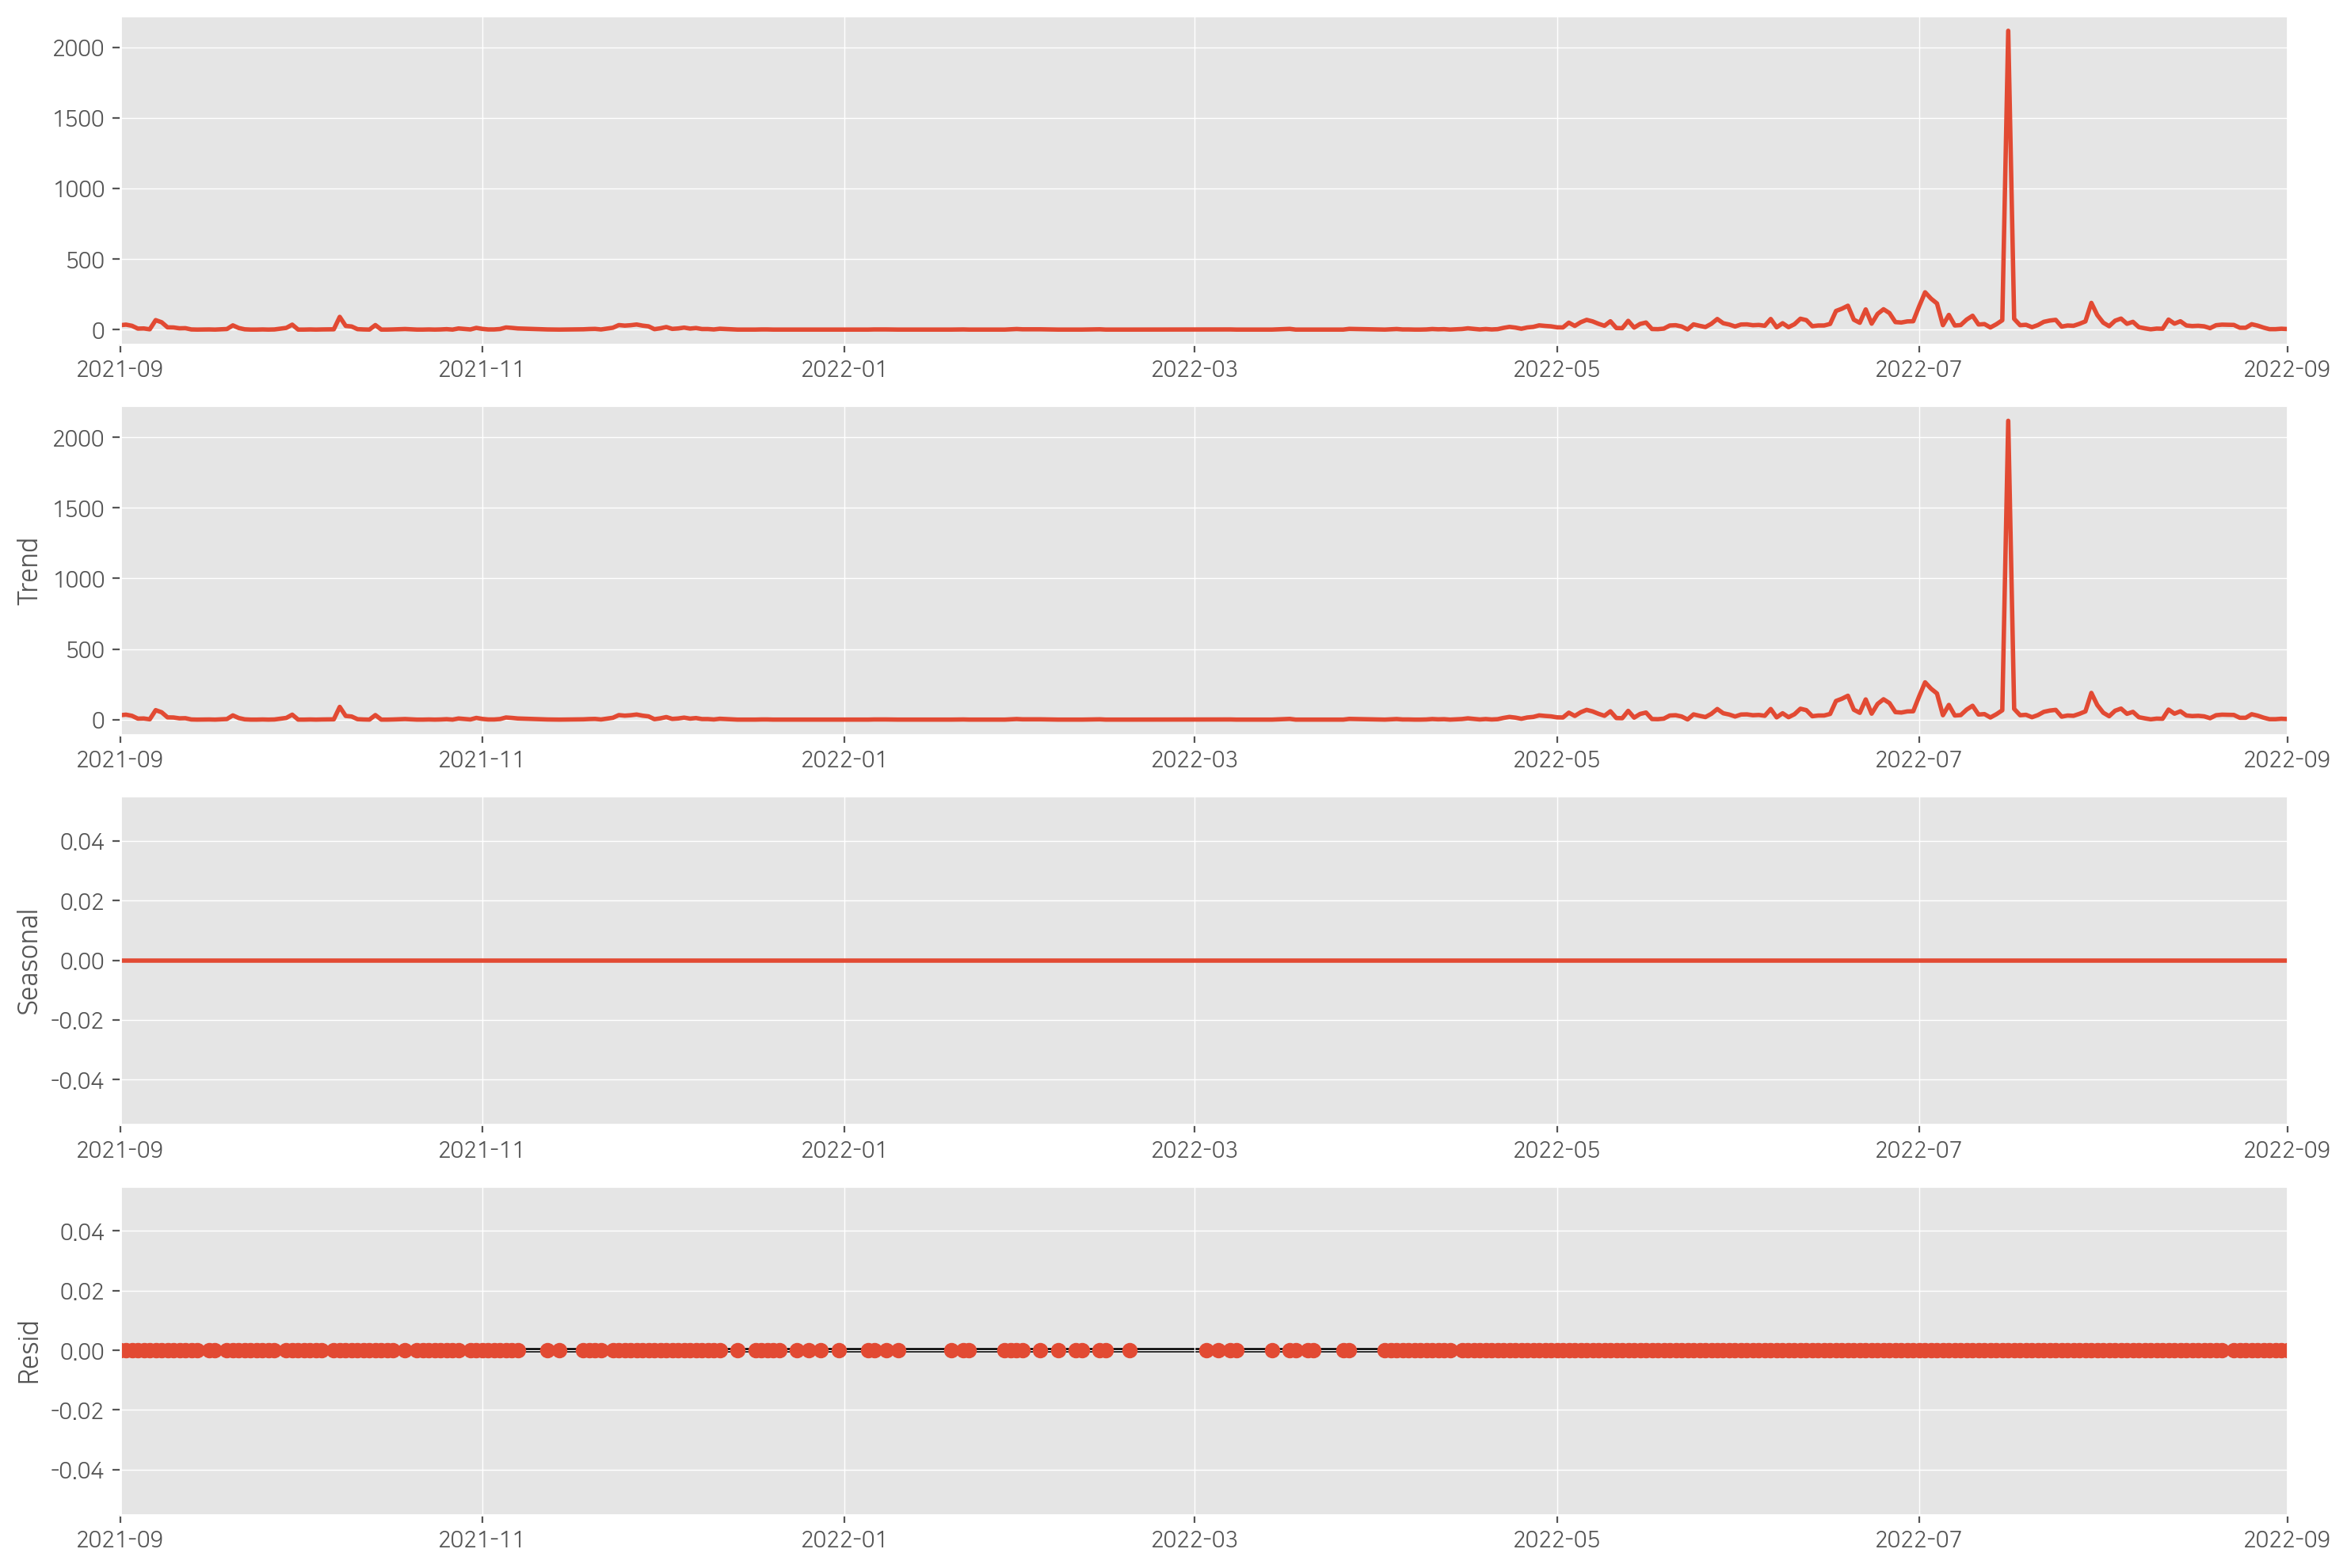

In [45]:
model = tsa.seasonal_decompose(sb_pivot_a, model='additive', period = 1)
fig = model.plot()
plt.show()

## 카이제곱검정 (Chi-squared test)

- 관찰되는 빈도가 기대되는 빈도와 유의하게 다른지를 검증
- 자료가 빈도로 기록될 수 없거나 빈도로 전환될 수 없다면 카이제곱검정은 사용할 수 없음 → 범주형 자료에 사용

  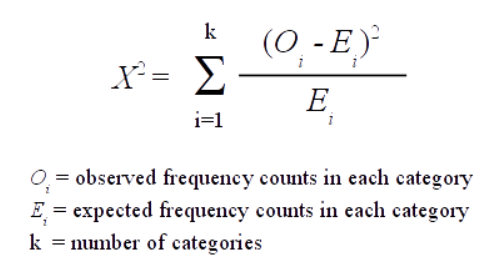

### 독립성 검정 (Test of independence)

- 열: 마트 이름
- 행: 시간대

 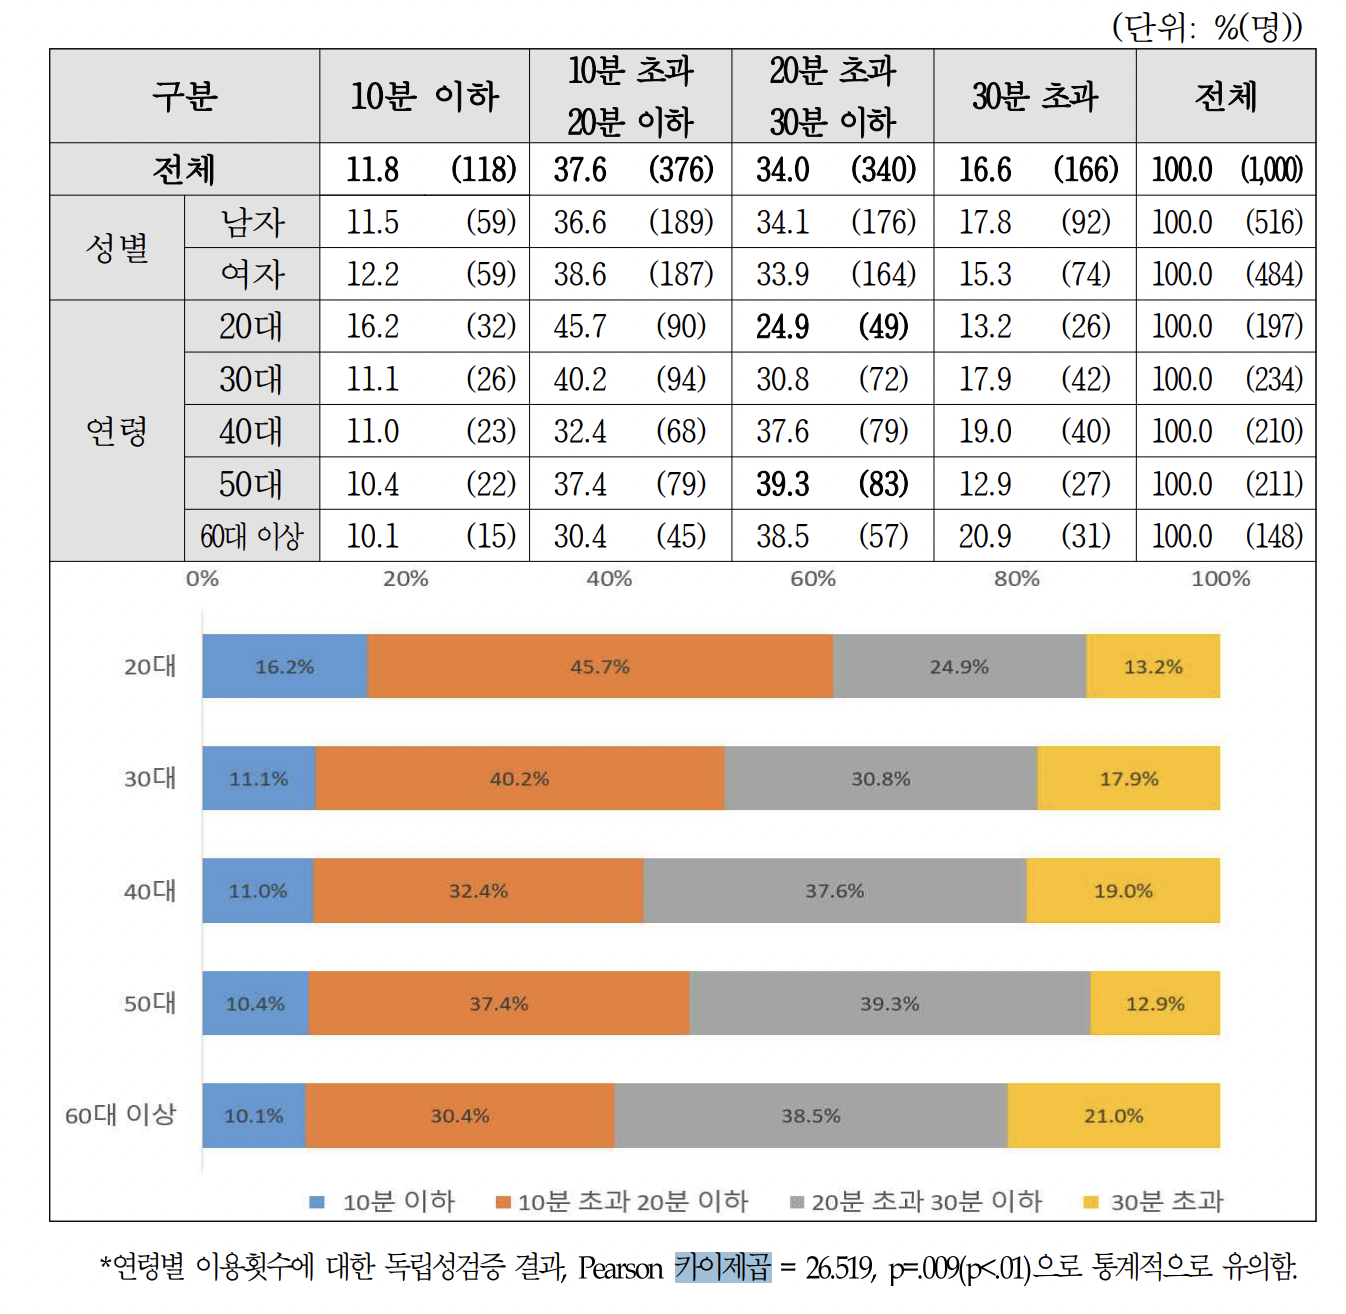

  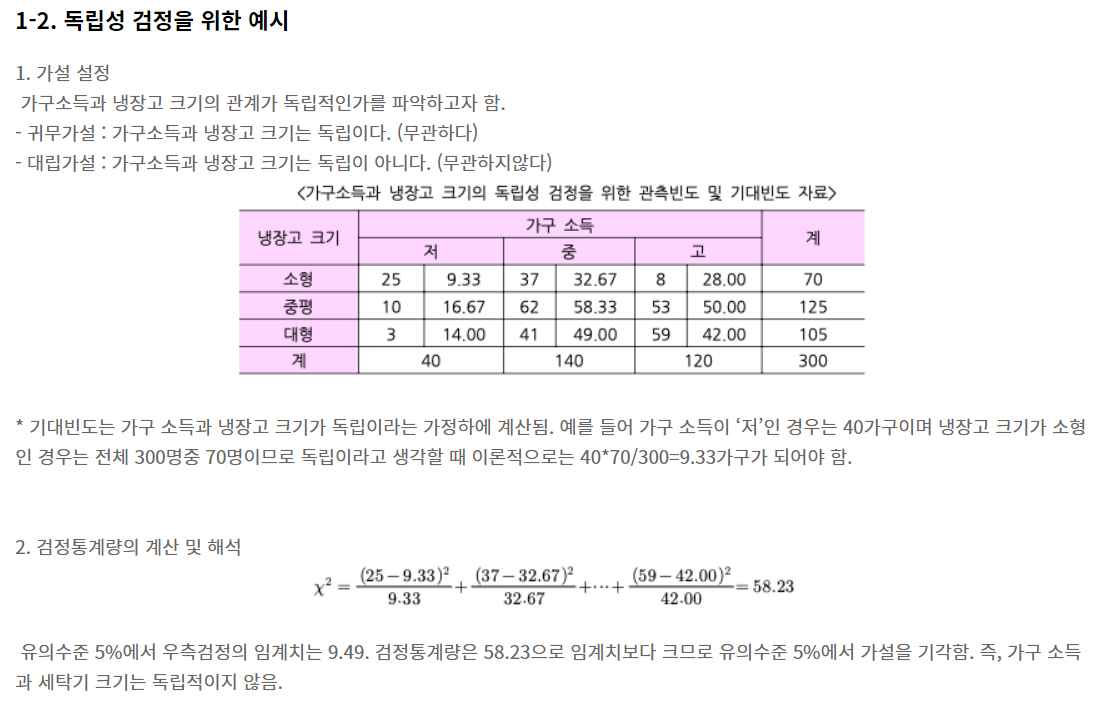

### 동질성 검정 (Test of homogeneity)

- [독립성 검정과 동질성 검정의 차이](https://recipesds.tistory.com/entry/%EB%8F%85%EB%A6%BD%EC%84%B1%EC%97%B0%EA%B4%80%EC%84%B1-%EB%8F%99%EC%A7%88%EC%84%B1-%EA%B2%80%EC%A0%95%EC%9D%98-%EC%B0%A8%EC%9D%B4%EC%99%80-%EA%B7%B8%EB%93%A4%EC%9D%98-%EC%A0%95%EC%B2%B4-%CF%87%C2%B2-%EC%B9%B4%EC%9D%B4%EC%8A%A4%ED%80%98%EC%96%B4-%EA%B2%80%EC%A0%95)
  - 독립성 검정: 하나의 모집단에서 뽑은 표본에서 두 개의 요인 간에 차이가 있는지 확인하는 검정
  - 동질성 검정: 서로 다른 두 개의 모집단에서 뽑은 표본의 분포가 비슷한지 확인하는 검정

#### 콩나물: 시간대별 판매량

In [46]:
# Data Load
cnm_a = pd.read_csv(abcd_path + '/analysis/cnm_a.csv', index_col=0)
cnm_c = pd.read_csv(abcd_path + '/analysis/cnm_c.csv', index_col=0)

# Groupby
cnm_time_a = cnm_a.groupby('DT_TTM_Hour').sum()
cnm_time_a = cnm_time_a['SALE_AMT'].to_frame()
cnm_time_a = cnm_time_a.rename(columns={'SALE_AMT':'A마트'})

cnm_time_c = cnm_c.groupby('DT_TTM_Hour').sum()
cnm_time_c = cnm_time_c['SALE_AMT'].to_frame()
cnm_time_c = cnm_time_c.rename(columns={'SALE_AMT':'C마트'})

# Join
cnm_time = pd.concat([cnm_time_a, cnm_time_c], axis=1)
cnm_time.index.name = '시간대'

# 검정을 위해서 NaN이 있는 시간대 22 제거
cnm_time_drop = cnm_time.drop(index=22)
display(cnm_time_drop)

# Test
import scipy.stats as stats

chi, p, df, ex = stats.chi2_contingency(cnm_time_drop)
print(f'chi2: {chi}, p-value: {p}, df: {df}')

if p < 0.05:
  print('p-value가 유의수준 0.05보다 낮으므로 귀무가설을 기각합니다 → 두 집단은 분포가 동일하지 않음')
elif p > 0.05:
  print('p-value가 유의수준 0.05보다 높으므로 귀무가설을 기각하지 못합니다 → 두 집단은 분포가 동일함')

A마트      C마트
시간대                   
7     11720.0  19000.0
8     36870.0  50000.0
9    103830.0  57000.0
10   170100.0  61000.0
11   225820.0  49000.0
12   228270.0  31000.0
13   273080.0  35000.0
14   288160.0  36000.0
15   365760.0  61000.0
16   377870.0  80000.0
17   290180.0  91500.0
18   224010.0  64000.0
19   198300.0  22000.0
20    65960.0  28000.0
21    35320.0  15000.0

chi2: 223329.51913499006, p-value: 0.0, df: 14
p-value가 유의수준 0.05보다 낮으므로 귀무가설을 기각합니다 → 두 집단은 분포가 동일하지 않음


#### 수박: 월별 판매량

In [47]:
# Data Load
sb_a = pd.read_csv(abcd_path + '/analysis/sb_a.csv', index_col=0)
sb_b = pd.read_csv(abcd_path + '/analysis/sb_b.csv', index_col=0)
sb_c = pd.read_csv(abcd_path + '/analysis/sb_c.csv', index_col=0)

# Groupby
sb_month_a = sb_a.groupby('DT_TTM_Month').sum()
sb_month_a = sb_month_a['SALE_AMT'].to_frame()
sb_month_a = sb_month_a.rename(columns={'SALE_AMT':'A마트'})

sb_month_b = sb_b.groupby('DT_TTM_Month').sum()
sb_month_b = sb_month_b['SALE_AMT'].to_frame()
sb_month_b = sb_month_b.rename(columns={'SALE_AMT':'B마트'})

sb_month_c = sb_c.groupby('DT_TTM_Month').sum()
sb_month_c = sb_month_c['SALE_AMT'].to_frame()
sb_month_c = sb_month_c.rename(columns={'SALE_AMT':'C마트'})

# Join
sb_month = pd.concat([sb_month_a, sb_month_b, sb_month_c], axis=1)
sb_month.index.name = '월'
sb_month = sb_month.dropna() # NaN 값 제거
display(sb_month)

# Test
chi, p, df, ex = stats.chi2_contingency(sb_month)
print(f'chi2: {chi}, p-value: {p}, df: {df}')

if p < 0.05:
  print('p-value가 유의수준 0.05보다 낮으므로 귀무가설을 기각합니다 → 두 집단은 분포가 동일하지 않음')
elif p > 0.05:
  print('p-value가 유의수준 0.05보다 높으므로 귀무가설을 기각하지 못합니다 → 두 집단은 분포가 동일함')

A마트        B마트       C마트
월                                 
5  18503600.0  3235300.0  426000.0
6  26333040.0  6272200.0  223000.0
7  61938240.0  6314500.0  631000.0
8  11503540.0  1660900.0  218000.0
9   3481420.0    39000.0   37000.0

chi2: 2782522.0004169317, p-value: 0.0, df: 8
p-value가 유의수준 0.05보다 낮으므로 귀무가설을 기각합니다 → 두 집단은 분포가 동일하지 않음


## DTW (Dynamic Time Warping)

- https://aliencoder.tistory.com/33
- https://leo-bb.tistory.com/58
- https://blog.kubwa.co.kr/dtw-%EA%B8%B0%EB%B3%B8-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EC%8B%A4%EC%8A%B5-%EC%BD%94%EB%93%9C-b333091d1e79

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cf. 시계열 특정 구간 안에서 코사인 유사도(방향 일치 여부)
        - https://eunhye-zz.tistory.com/27

In [48]:
# Sampling 대상: 계절성이 뚜렸했던 수박
sb_a = pd.read_csv(abcd_path + '/analysis/sb_a.csv', parse_dates=['REAL_SAL_DT'],index_col=0)
sb_b = pd.read_csv(abcd_path + '/analysis/sb_b.csv', parse_dates=['REAL_SAL_DT'],index_col=0)
sb_c = pd.read_csv(abcd_path + '/analysis/sb_c.csv', parse_dates=['REAL_SAL_DT'],index_col=0)

# 일자별로 판매량을 집계
sb_pivot_a = pd.pivot_table(data=sb_a, index='REAL_SAL_DT', values='SALE_QTY', aggfunc='sum')
sb_pivot_b = pd.pivot_table(data=sb_b, index='REAL_SAL_DT', values='SALE_QTY', aggfunc='sum')
sb_pivot_c = pd.pivot_table(data=sb_c, index='REAL_SAL_DT', values='SALE_QTY', aggfunc='sum')

# Array
sb_list_a = sb_pivot_a.SALE_QTY.tolist()
sb_list_b = sb_pivot_b.SALE_QTY.tolist()
sb_list_c = sb_pivot_c.SALE_QTY.tolist()

In [49]:
!pip install dtaidistance

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 14.0 MB/s 


In [50]:
dtwvis.plot_warping(sb_list_a, sb_list_b, path = dtw.warping_path(sb_list_a, sb_list_b))
print(f'A마트와 B마트의 dtw 값은 {dtw.distance(sb_list_a, sb_list_b)} 입니다')

In [51]:
dtwvis.plot_warping(sb_list_b, sb_list_c, path = dtw.warping_path(sb_list_b, sb_list_c))
print(f'B마트와 C마트의 dtw 값은 {dtw.distance(sb_list_b, sb_list_c)} 입니다')

In [52]:
dtwvis.plot_warping(sb_list_a, sb_list_c, path = dtw.warping_path(sb_list_a, sb_list_c))
print(f'A마트와 C마트의 dtw 값은 {dtw.distance(sb_list_a, sb_list_c)} 입니다')

Output hidden; open in https://colab.research.google.com to view.